In [1]:
import time,datetime
start_time = time.time()

# 1) Loading data

In [31]:
import numpy as np
import pandas as pd

import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# import dataprep.eda as eda
# import qgrid
import plotly.express as px
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected = True)


bleu = (70 / 255, 130 / 255, 180 / 255)
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 50)

In [32]:
# 2D projection scatterplot
def plot_clusters(reduced,labels):
    data=pd.DataFrame(np.c_[reduced,labels],columns=['Component 1','Component 2','Cluster'])

    plt.figure(figsize=(10,8))
    sns.scatterplot(data=data,
                    x='Component 1',
                    y='Component 2',
                    hue='Cluster',
                    palette=sns.color_palette('tab10', n_colors=7))
    plt.title(f'')
    plt.figure(figsize=(10,8))

In [33]:
from google.colab import drive
drive.mount('/content/drive')
import os
drive_folder=  "/content/drive/MyDrive/Colab_Notebooks/Project_6"
os.chdir(drive_folder)
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['P6_01_NLP_Basic_methods.ipynb',
 'objectifs.pdf',
 'Copie de P6_03_NLP_optim_description.ipynb',
 'Copie de P6_06_IMAGES_Transfert_learning.ipynb',
 'Copie de P6_02_NLP_optim_product_name.ipynb',
 'Copie de P6_07_Faisabilité.ipynb',
 'Copie de P6_05_IMAGES_SIFT_ORB.ipynb',
 'Copie de P6_01_NLP.ipynb',
 'Flipkart',
 'NLP',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'BERT',
 'Copie de P6_04_NLP_TRANSFERT_BERT_tensorflow_full_model.ipynb',
 'FEAT_TFIDF_PRODUCT_NAME',
 'FEAT_TFIDF_DESCRIPTION',
 'Flip_opt.data',
 'Flip_opt.cat',
 'DOC2VEC',
 'USE',
 'P6_NLP_optim_product_name.ipynb',
 'P6_NLP_optim_description.ipynb',
 'Copie de EDIT_P6_04_IMAGES_SIFT_ORB.ipynb',
 'P6_03_NLP_transfer_learning.ipynb',
 'P6_05_IMAGES_Transfert_learning.ipynb',
 'Copie de Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'P06_06_CLASSIFICATION_CNN_deep_learning.ipynb',
 'P6_Faisabilité.ipynb',
 'openfoodfacts_champagne',
 'test_images',
 'P6_04_IMAGES_SIF

In [34]:
Flipkart = pd.read_csv('./Flipkart/flipkart_com-ecommerce_sample_1050.csv',encoding='iso-8859-1')
Flipkart.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                                                       product_url  \
0       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
1                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4   
4            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [35]:
dataset=Flipkart[['product_category_tree','product_name','description']].copy()

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  1050 non-null   object
 1   product_name           1050 non-null   object
 2   description            1050 non-null   object
dtypes: object(3)
memory usage: 24.7+ KB


In [37]:
dataset.head(5)

product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Ma

In [38]:
# Renommage des catégories (legendes des matrices de confusion trop longues)
shorten={'Watches ':'Watches',
         'Computers ':'Computers',
         'Home Decor & Festive Needs ':'Decor',
         'Kitchen & Dining ':'Kitchen',
         'Home Furnishing ':'Furniture',
         'Beauty and Personal Care ':'Beauty',
         'Baby Care ':'Baby'}

In [39]:
# extraction du premier etage de l'arbre category affichages des occurences
# prendre premier terme dans l'arbre de catégories
dataset['category']=dataset.product_category_tree.apply(lambda s : s[2:s.find('>>')])
cat=pd.DataFrame(dataset.category.value_counts())
cat.reset_index(inplace=True)
# remplacer les catégories (aux noms parfois un peu trop longs) par des noms plus courts
cat['category'] = cat['category'].replace(shorten)
cat

category  count
0  Furniture    150
1       Baby    150
2    Watches    150
3      Decor    150
4    Kitchen    150
5     Beauty    150
6  Computers    150

In [40]:
# Shorten category names
dataset['category']= dataset['category'].replace(shorten)
dataset.category.value_counts()

category
Furniture    150
Baby         150
Watches      150
Decor        150
Kitchen      150
Beauty       150
Computers    150
Name: count, dtype: int64

In [41]:
# dictionary for ordinal encoding of category names
# comparison with clustering results
dico={cat.loc[i,'category']:i for i in cat.index}
dico_reverse={i:cat.loc[i,'category'] for i in cat.index}
display(dico)

# assignment to cat_code column
dataset['cat_code']=dataset.category.map(dico)
dataset.cat_code.value_counts()

{'Furniture': 0,
 'Baby': 1,
 'Watches': 2,
 'Decor': 3,
 'Kitchen': 4,
 'Beauty': 5,
 'Computers': 6}

cat_code
0    150
1    150
2    150
3    150
4    150
5    150
6    150
Name: count, dtype: int64

In [42]:
dataset.head(5)

product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design M

In [43]:
data=dataset[['category','cat_code','product_name','description']].copy()
data.head(2)

category  cat_code  \
0  Furniture         0   
1       Baby         1   

                                                 product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                  Sathiyas Cotton Bath Towel   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

<Axes: >

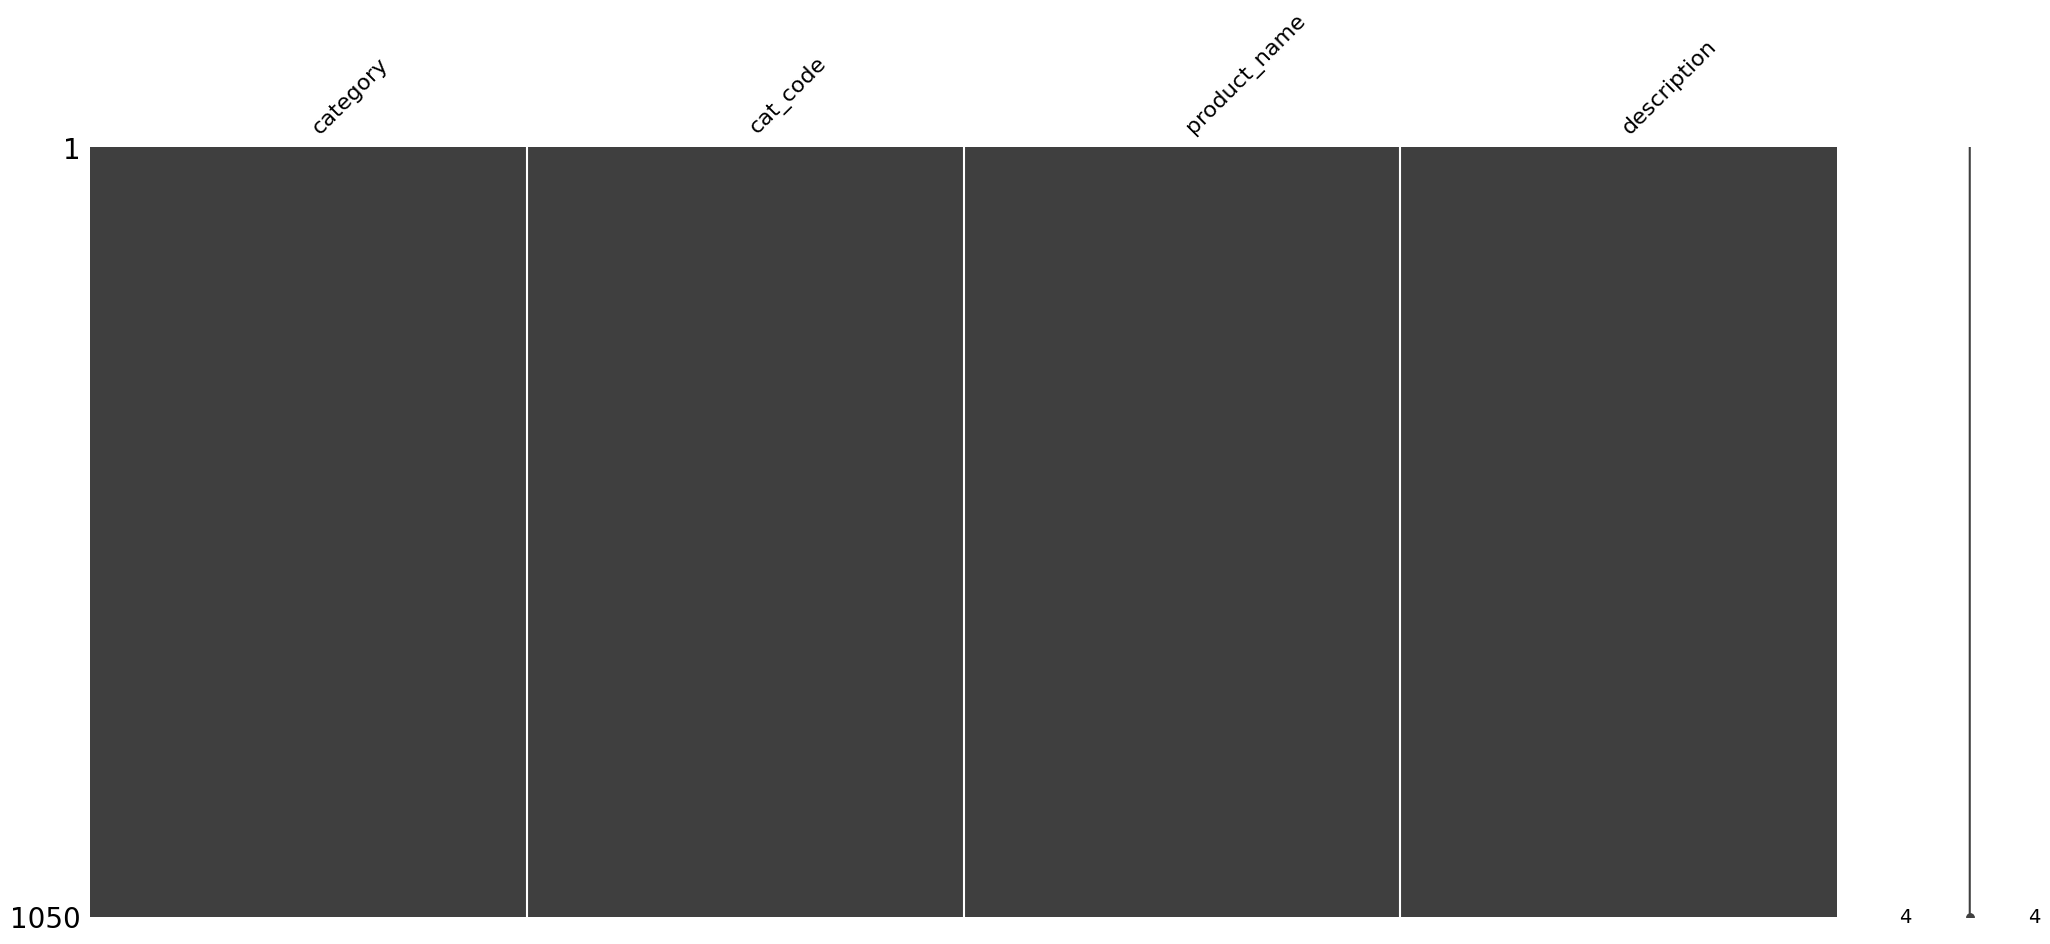

In [44]:
msno.matrix(data)

In [45]:
data=dataset[['category','cat_code','product_name','description']].copy()

data.shape

(1050, 4)

In [46]:
import joblib
joblib.dump(data,'FlipKart_NLP.pkl')

['FlipKart_NLP.pkl']

# 2) Counting words

In [47]:
def text_stats(serie):
    results=pd.DataFrame()
    results['word_count'] = serie.apply(lambda x: len(str(x).split(" ")))
    results['char_count'] = serie.apply(lambda x: sum(len(word) for word in str(x).split(" ")))
    results['sentence_count'] = serie.apply(lambda x: len(str(x).split(".")))
    results['avg_word_length'] = results['char_count'] / results['word_count']
    results['avg_sentence_lenght'] = results['word_count'] / results['sentence_count']

    return results

In [48]:
stats_product_name=text_stats(data.product_name)
stats_product_name

word_count  char_count  sentence_count  avg_word_length  \
0              7          52               1         7.428571   
1              4          23               1         5.750000   
2              6          30               1         5.000000   
3              9          55               1         6.111111   
4              8          46               1         5.750000   
...          ...         ...             ...              ...   
1045           7          40               1         5.714286   
1046           5          34               1         6.800000   
1047           8          58               1         7.250000   
1048           5          35               1         7.000000   
1049           4          25               1         6.250000   

      avg_sentence_lenght  
0                     7.0  
1                     4.0  
2                     6.0  
3                     9.0  
4                     8.0  
...                   ...  
1045                  7.0  
1046                  5.0  
1047                  8.0  
1048                  5.0  
1049                  4.0  

[1050 rows x 5 columns]

In [49]:
stats_product_name.describe()

word_count   char_count  sentence_count  avg_word_length  \
count  1050.000000  1050.000000     1050.000000      1050.000000   
mean      7.617143    38.490476        1.099048         5.271459   
std       3.135651    14.728441        0.359667         1.275349   
min       2.000000     7.000000        1.000000         2.400000   
25%       5.000000    29.000000        1.000000         4.333333   
50%       7.000000    37.000000        1.000000         5.142857   
75%       9.000000    47.000000        1.000000         6.000000   
max      27.000000   127.000000        5.000000        14.000000   

       avg_sentence_lenght  
count          1050.000000  
mean              7.166095  
std               2.958990  
min               1.666667  
25%               5.000000  
50%               7.000000  
75%               9.000000  
max              23.000000

# 3) var 'PRODUCT_NAME'

## Preprocess

In [155]:
pd.set_option('display.max_colwidth', None)
data.product_name.head(10)

0          Elegance Polyester Multicolor Abstract Eyelet Door Curtain
1                                          Sathiyas Cotton Bath Towel
2                                 Eurospa Cotton Terry Face Towel Set
3     SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet
4               Jaipur Print Cotton Floral King sized Double Bedsheet
5                  Maserati Time R8851116001 Analog Watch  - For Boys
6                 Camerii WM64 Elegance Analog Watch  - For Men, Boys
7                   T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys
8                   Alfajr WY16B Youth Digital Watch  - For Men, Boys
9    TAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, Men
Name: product_name, dtype: object

In [156]:
import nltk, re, pprint
from nltk import word_tokenize
nltk.download('punkt_tab')

tokenized=word_tokenize(data.loc[9,'product_name'])
tokenized

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 '-',
 'For',
 'Boys',
 ',',
 'Men']

In [157]:
import string
print(f' Punctuation list : {string.punctuation}')
no_punct=[w for w in tokenized if w not in string.punctuation]
no_punct

 Punctuation list : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men']

In [158]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(f" Punctuation list : {stopwords.words('english')}")
wo_stop= [w for w in no_punct if w not in stopwords.words('english')]
wo_stop

 Punctuation list : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 's

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men']

In [159]:
# example
[''.join([char for char in word if char not in string.punctuation+'0123456789 ' ]) for word in [' -''toke3nized','t?o33to']]

['tokenized', 'toto']

In [160]:
from nltk.stem.porter import PorterStemmer
import nltk
import re
import pprint
from nltk import word_tokenize


import string
from nltk.corpus import stopwords

# stemming (reducing words to their base to avoid plurals, conjugations, etc.)
from nltk import SnowballStemmer
snowball = SnowballStemmer(language='english')

porter = PorterStemmer()


# lower + no punctuation + tokenize + no stop_words
def preprocess0(text):
    text = text.lower()
    no_punct = ''.join(
        [char for char in text if char not in string.punctuation+'0123456789'])
    tokenized = word_tokenize(no_punct)
    wo_stop = [w for w in tokenized if w not in stopwords.words('english')]
    return ' '.join(list(set(wo_stop)))


# lower + no puctuation + tokenize + no stop_words + stemming
def preprocess1(text, detailed=False):

    ltext = text.lower()
    no_punct = ''.join(
        [char for char in ltext if char not in string.punctuation+'0123456789'])
    tokenized = word_tokenize(no_punct)
    wo_stop = [w for w in tokenized if w not in stopwords.words('english')]
    stemmed = [snowball.stem(w) for w in wo_stop]

    if detailed:
      print('Original text:')
      print(text)
      print('\nLowered text:')
      print(ltext)
      print('\nNo punctuation:')
      print(no_punct)
      print('\nTokenized:')
      print(tokenized)
      print('\nNo stop words:')
      print(' '.join(wo_stop))
      print('\nStemmed:')
      print(' '.join(stemmed))

    return ' '.join(list(set(stemmed)))


# lower + tokenize + no stop_words + stemming + no punct
def preprocess2(text, detailed=False):
    text = text.lower()
    tokenized = word_tokenize(text)
    wo_stop = [word for word in tokenized if word not in stopwords.words('english')]
    stemmed = [snowball.stem(word) for word in wo_stop]
    no_punct = [''.join([char for char in word if char not in string.punctuation+'0123456789 ' ]) for word in stemmed]
    return ' '.join(list(set(no_punct)))

Comparing different preprocess functions

In [161]:
index_ = data.sample(2).index

display('Original ', data.product_name.loc[index_])
display('Without stemming ', data.product_name.apply(preprocess0).loc[index_])
display('With stemming remove puctuation BEFORE tokenization ',
        data.product_name.apply(preprocess1).loc[index_])
display('With stemming remove puctuation AFTER tokenization ',
        data.product_name.apply(preprocess2).loc[index_])

'Original '

353                                          Asus DSL-N10E Wireless-N150 ADSL Modem Router
70     Caffeine Handmade Tribal Print Influenced Katori Bowl (Set of 2) Stoneware Bowl Set
Name: product_name, dtype: object

'Without stemming '

353                                 adsl modem wirelessn asus router dslne
70     katori bowl handmade set caffeine print stoneware influenced tribal
Name: product_name, dtype: object

'With stemming remove puctuation BEFORE tokenization '

353                            adsl modem wirelessn asus router dslne
70     katori handmad bowl stonewar set influenc print caffein tribal
Name: product_name, dtype: object

'With stemming remove puctuation AFTER tokenization '

353                             adsl modem wirelessn asus router dslne
70      katori handmad bowl stonewar set influenc print caffein tribal
Name: product_name, dtype: object

Step by step

In [162]:
index = pd.Index([866])

preprocessed_text = preprocess1(data.product_name.loc[index].values[0], True)
print('\nSet preprocessed text:')
print(preprocessed_text)

Original text:
Sivanna Baking Powder Rouge  Highlighter

Lowered text:
sivanna baking powder rouge  highlighter

No punctuation:
sivanna baking powder rouge  highlighter

Tokenized:
['sivanna', 'baking', 'powder', 'rouge', 'highlighter']

No stop words:
sivanna baking powder rouge highlighter

Stemmed:
sivanna bake powder roug highlight

Set preprocessed text:
powder roug bake highlight sivanna


In [163]:
# Applying preprocess1 to sentences
data['product_name_prep']=data.product_name.apply(preprocess1)

## countvectorizer (BoW)

Preprocessing has already be done so we will not apply preprocessor in the CountVectorizer method. Moreover, some features are not available in CountVectorizer preprocessing method (no stemming + nltk linguistic tokenization)

In [164]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Bag of Words (BoW) feature engineering tool
  # creates a table with columns for each different word in the entire dataset
  # each row of the dataset will have a vector value for each word (which can be 0 in case of a word that is in another row)
cv_prod = CountVectorizer(
                          encoding='iso-8859-1',
                          decode_error='strict',
                          strip_accents='unicode',
                          lowercase=False, # useless since already done in preprocess1
                          preprocessor=None,
#                           tokenizer=None, # default value
                          stop_words=None,
#                           token_pattern=r'(?u)\b\w\w+\b', # default value
                          ngram_range=(1, 1),
                          analyzer='word', # better than analyzing character by character
                          max_df=1.0, # do not filter words that appear in 100% of the strings (= keep all words)
                          min_df=1, # do not filter words that appear in less than 1 string (= keep all words)
                          max_features=None,
#                           vocabulary=None,
                          binary=False,

                         )

count_vector_prod=cv_prod.fit_transform(data.product_name_prep)
count_vector_prod=count_vector_prod.toarray()
count_vector_prod.shape

(1050, 1941)

In [165]:
preprocessed_text_bow_matches = { word : cv_prod.vocabulary_[word]for word in preprocessed_text.split(' ') }
# Sort dictionary by values
preprocessed_text_bow_matches = dict(sorted(preprocessed_text_bow_matches.items(), key=lambda item: item[1]))
print(preprocessed_text_bow_matches)

{'bake': 121, 'highlight': 761, 'powder': 1332, 'roug': 1455, 'sivanna': 1567}


In [166]:
print("stop_words parameter:", cv_prod.get_params().get('stop_words'))


stop_words parameter: None


In [167]:
print(f'Different words : {count_vector_prod.shape[1]}')

Different words : 1941


In [168]:
# Import KMeans clusterer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# n_clusters = different categories number
kmeans = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(count_vector_prod)
    # Assign clusters
labels=kmeans.labels_
for i in range(0,7):
    print('Cluster {} values count : {}'.format(i, np.count_nonzero(labels == i)))

adjusted_rand_score(data.cat_code,labels)

Cluster 0 values count : 83
Cluster 1 values count : 149
Cluster 2 values count : 435
Cluster 3 values count : 84
Cluster 4 values count : 74
Cluster 5 values count : 122
Cluster 6 values count : 103


0.3106953248835906

In [169]:
data.cat_code.replace(dico_reverse)

0       Furniture
1            Baby
2            Baby
3       Furniture
4       Furniture
          ...    
1045         Baby
1046         Baby
1047         Baby
1048         Baby
1049         Baby
Name: cat_code, Length: 1050, dtype: object

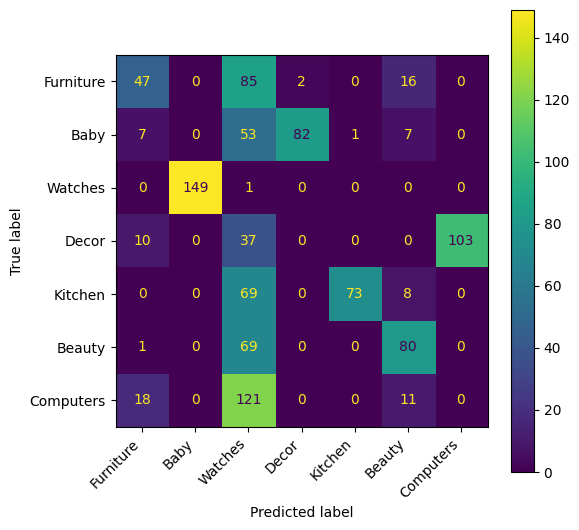

In [170]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(data.cat_code,labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cat['category']
                             )
fig,axe=plt.subplots(figsize=(6,6))
disp.plot(xticks_rotation=33,ax=axe)
axe.set_xticklabels(cat['category'], rotation = 45, ha="right")
# axe.set_xticklabels(cat.index, rotation = 45, ha="right")
plt.show()

Of course, the clusters numbers order is random so the predicted label order could be wrong. So we have to fix this.

Note : ARI is insensible to labels order so the score remains true.

In [171]:
# solves optimal assignment problem (labels assignment method)
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cm,maximize=True)

row_ind, col_ind

(array([0, 1, 2, 3, 4, 5, 6]), array([0, 3, 1, 6, 4, 5, 2]))

In [172]:
# change the columns indexes for the confusion matrix
cm=cm.take(col_ind,axis=1)

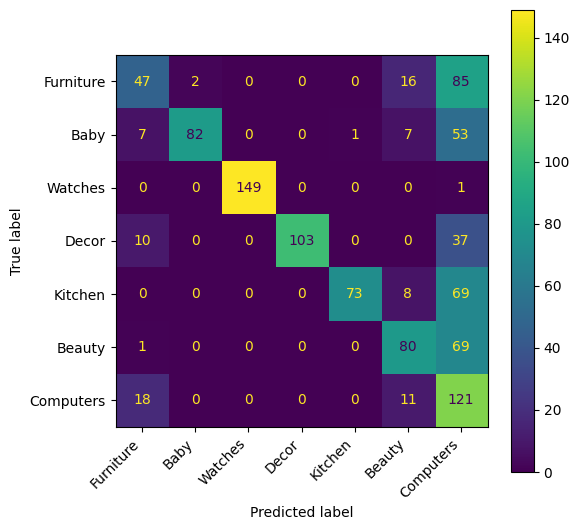

In [173]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cat['category']
                             )
fig,axe=plt.subplots(figsize=(6,6))
disp.plot(xticks_rotation=33,ax=axe)
axe.set_xticklabels(cat['category'], rotation = 45, ha="right")
plt.show()

Now, the labels are well assigned.

In [174]:
cv_prod.get_stop_words()

In [175]:
data.product_name_prep

0              eyelet curtain abstract door polyest eleg multicolor
1                                         sathiya towel cotton bath
2                               towel terri set eurospa face cotton
3       royal king doubl fashion bedsheet print size santosh cotton
4               king size doubl jaipur bedsheet print floral cotton
                                   ...                             
1045                       empow extra larg adhes oren self sticker
1046                                  larg wallmantra sticker vinyl
1047       pigment extra larg uberlyf import film polyvinyl sticker
1048                                medium wallmantra sticker vinyl
1049                                     larg vinyl uberlyf sticker
Name: product_name_prep, Length: 1050, dtype: object

In [176]:
cv_prod.vocabulary_

{'eyelet': 558,
 'curtain': 396,
 'abstract': 7,
 'door': 464,
 'polyest': 1316,
 'eleg': 515,
 'multicolor': 1124,
 'sathiya': 1498,
 'towel': 1751,
 'cotton': 368,
 'bath': 134,
 'terri': 1714,
 'set': 1519,
 'eurospa': 540,
 'face': 562,
 'royal': 1458,
 'king': 905,
 'doubl': 466,
 'fashion': 573,
 'bedsheet': 146,
 'print': 1348,
 'size': 1569,
 'santosh': 1493,
 'jaipur': 853,
 'floral': 608,
 'maserati': 1042,
 'watch': 1862,
 'time': 1732,
 'analog': 54,
 'boy': 208,
 'men': 1075,
 'camerii': 249,
 'wm': 1894,
 'star': 1629,
 'ufttswbkbr': 1785,
 'alfajr': 41,
 'youth': 1931,
 'wyb': 1915,
 'digit': 449,
 'formula': 621,
 'cauba': 273,
 'heuer': 757,
 'tag': 1693,
 'calibro': 246,
 'sw': 1678,
 'analogdigit': 55,
 'cartier': 263,
 'lcs': 945,
 'caron': 259,
 'loi': 983,
 'titan': 1737,
 'sl': 1578,
 'women': 1897,
 'jewelri': 863,
 'srushti': 1620,
 'girl': 681,
 'art': 89,
 'megnetledsportblackr': 1071,
 'escort': 531,
 'eblk': 507,
 'blackl': 177,
 'jack': 850,
 'klein': 908,

In [177]:
len(cv_prod.vocabulary_)

1941

In [178]:
# Dictionaries to hold results
# Function to append results to result_dict
def append_dict(dict1_obj, dict2_obj):
    for key in dict1_obj.keys():
        dict1_obj[key].append(dict2_obj[key])

# Initialize results dictionary
results={'title' : [], 'metrics':[]}

In [179]:
# Resumption of all results evaluation steps

from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from scipy.optimize import linear_sum_assignment
from collections import Counter

# Plot confusion matrix with better cmap look.
def plot_conf_mat(matrix,y_names,x_names,title=''):
    fig,axe=plt.subplots(figsize=(8,6))

    sns.heatmap(matrix, annot=True, cmap='Accent',ax=axe, square=True,fmt='g',vmin=0,vmax=150)
    axe.set_yticklabels(y_names,rotation = 0,fontsize=11)
    axe.set_xticklabels(x_names, rotation = 45, ha="right",fontsize=11)
    axe.set_title(title,fontsize=16)
    plt.show()



"""
Main function.
Evaluates clustering performance by comparing predicted cluster labels with ground truth labels.

This function performs several key evaluation steps:
1. Counts the frequency of each cluster
2. Computes a confusion matrix between predicted clusters and true categories
3. Optimizes cluster-to-category alignment using the Hungarian algorithm
4. Visualizes the aligned confusion matrix
5. Calculates the Adjusted Rand Index (ARI) to measure clustering quality
6. Generates a detailed classification report with precision, recall, and F1-score

Parameters:
    pred_labels (array-like): Predicted cluster labels from clustering algorithm
    true_labels (array-like): Ground truth category labels
    cat_names (list): List of category names for visualization and reporting

Returns:
    tuple: ((precision, recall, f1, support), ari) - Macro-averaged metrics and ARI score
"""
def clustering_evaluate(pred_labels, true_labels, cat_names):

    # Count clusters effectives
    effectives=dict(sorted(Counter(pred_labels).items()))

    # compute confusion matrix
    conf_mat=confusion_matrix(true_labels,pred_labels)

    # Plot confusion matrix
#     plot_conf_mat(conf_mat,cat['index'],range(7),title='Confusion matrix')

    # Maximize values on first diagonal
    row_ind, col_ind = linear_sum_assignment(conf_mat,maximize=True)
    permut = pd.DataFrame(col_ind,index=cat['category'],columns=['cluster'])
    permut.index.rename('Category',inplace=True)
    permut['effectives']=[effectives[cls] for cls in permut.cluster]
    display(permut)
    cm=conf_mat.take(col_ind,axis=1)

    # Plot aligned confusion matrix
    plot_conf_mat(cm,cat_names,cat_names,title='Aligned confusion matrix')

    # Align cluster label on category code   [corresp[cls] for cls in labels]
    corresp = np.argmax(conf_mat, axis=0)

    # print  adjusted rand score
    ari = adjusted_rand_score(true_labels,pred_labels)
    print(' ARI : {}'.format(ari))

    # Print classification report
    print(classification_report(true_labels,
                                [corresp[cls] for cls in pred_labels],
                                target_names=cat_names,
                                zero_division=0)
         )
    return  precision_recall_fscore_support(true_labels,
                                [corresp[cls] for cls in pred_labels],
                                             average='macro', zero_division=0), ari

cluster  effectives
Category                      
Furniture        0          83
Baby             3          84
Watches          1         149
Decor            6         103
Kitchen          4          74
Beauty           5         122
Computers        2         435

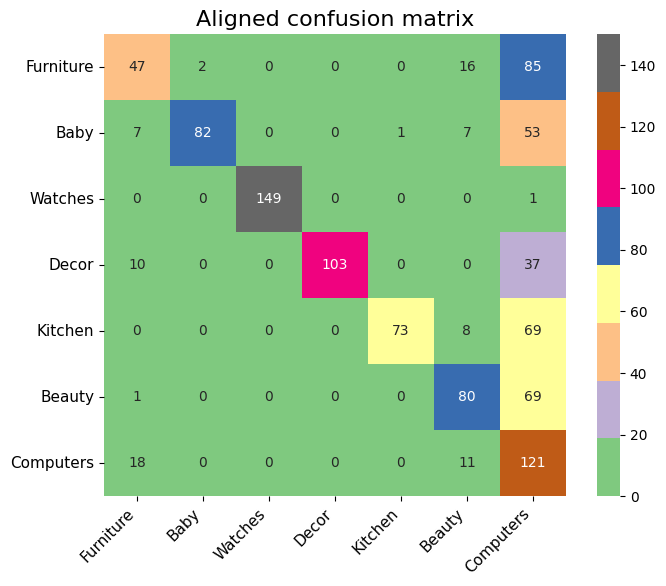

 ARI : 0.3106953248835906
              precision    recall  f1-score   support

   Furniture       0.57      0.31      0.40       150
        Baby       0.98      0.55      0.70       150
     Watches       1.00      0.99      1.00       150
       Decor       1.00      0.69      0.81       150
     Kitchen       0.99      0.49      0.65       150
      Beauty       0.66      0.53      0.59       150
   Computers       0.28      0.81      0.41       150

    accuracy                           0.62      1050
   macro avg       0.78      0.62      0.65      1050
weighted avg       0.78      0.62      0.65      1050

Clustering onBoW


In [180]:
title='BoW'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on'+title)

## Clustering on text statistics as baseline

cluster  effectives
Category                      
Furniture        0         128
Baby             3           7
Watches          4         279
Decor            6         189
Kitchen          1         278
Beauty           5          59
Computers        2         110

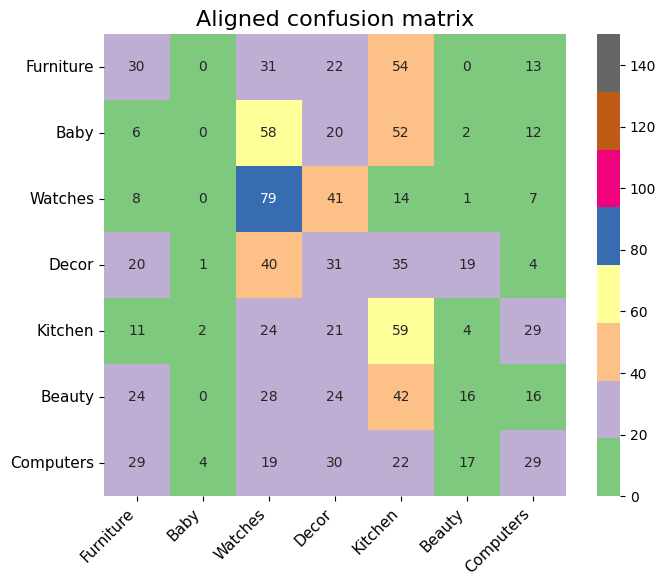

 ARI : 0.03645444556585251
              precision    recall  f1-score   support

   Furniture       0.23      0.20      0.22       150
        Baby       0.00      0.00      0.00       150
     Watches       0.26      0.80      0.39       150
       Decor       0.32      0.13      0.18       150
     Kitchen       0.23      0.59      0.33       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.57      0.03      0.05       150

    accuracy                           0.25      1050
   macro avg       0.23      0.25      0.17      1050
weighted avg       0.23      0.25      0.17      1050

Clustering on product_name Text statistics


In [181]:
# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans0 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(text_stats(data.product_name))
    # Assign clusters
labels=kmeans0.labels_

title='Text statistics'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on product_name '+title)

The poor ARI and confusion matrix results shows that using only the words stats give worse resultats than using countvectorizer (BoW) method.

## Text encoding Strategies

The next steps will be about changing words weights using different methods.

### countvectorizer + tfidf

TF-IDF (Term Frequency-Inverse Document Frequency) weights words based on their specificity to documents. It emphasizes distinctive terms while reducing the importance of commonly occurring words across the corpus.\
This technique helps identify characteristic vocabulary for each document category, improving clustering and classification by focusing on truly discriminative features rather than generic terms.





In [182]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(count_vector_prod)
data_tfidf = tf_transformer.transform(count_vector_prod)

In [183]:
type(data_tfidf)

scipy.sparse._csr.csr_matrix

Sparse matrix, densify it for interpretability and saving dataframe.

In [184]:
data_tfidf=data_tfidf.toarray()

In [185]:
data_tfidf.shape

(1050, 1941)

In [186]:
tok=pd.DataFrame(data_tfidf,columns=[ 'T'+str(i) for i in range(data_tfidf.shape[1])])

joblib.dump(tok, 'FEAT_TFIDF_PRODUCT_NAME')

tok

T0   T1   T2   T3   T4   T5   T6        T7   T8   T9  T10  T11  T12  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.319099  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...   
1045  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1046  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1047  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1049  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   

      T13  T14  T15  T16  T17  T18  T19  T20       T21  T22  T23  T24  ...  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...   
1045  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.379881  0.0  0.0  0.0  ...   
1046  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
1047  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
1048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
1049  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   

      T1916  T1917  T1918  T1919  T1920  T1921  T1922  T1923  T1924  T1925  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1045    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1046    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1047    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1048    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      T1926  T1927  T1928  T1929  T1930  T1931  T1932  T1933  T1934  T1935  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1045    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1046    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1047    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1048    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      T1936  T1937  T1938  T1939  T1940  
0       0.0    0.0    0.0    0.0    0.0  
1       0.0    0.0    0.0    0.0    0.0  
2       0.0    0.0    0.0    0.0    0.0  
3       0.0    0.0    0.0    0.0    0.0  
4       0.0    0.0    0.0    0.0    0.0  
...    

In [187]:
# Supposons que df_transposed est le résultat de votre commande
df_transposed = tok.loc[index,['T'+str(i) for i in preprocessed_text_bow_matches.values()]].T

# Initialisation du dictionnaire avec index et valeurs
my_dict = {idx: round(float(val[0]),4) for idx, val in zip(df_transposed.index, df_transposed.values)}

# Afficher le dictionnaire
print(my_dict)

{'T121': 0.4521, 'T761': 0.4269, 'T1332': 0.4521, 'T1455': 0.4521, 'T1567': 0.4521}


cluster  effectives
Category                      
Furniture        6          77
Baby             1          82
Watches          3         143
Decor            2         110
Kitchen          4          73
Beauty           5         532
Computers        0          33

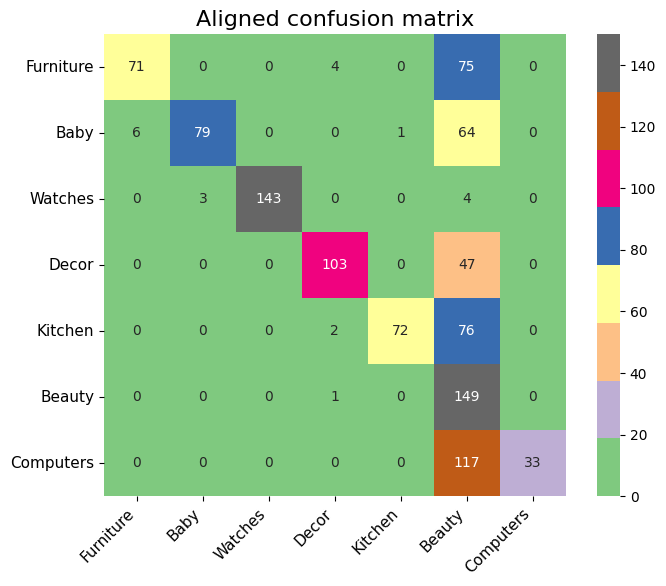

 ARI : 0.2725094110833238
              precision    recall  f1-score   support

   Furniture       0.92      0.47      0.63       150
        Baby       0.96      0.53      0.68       150
     Watches       1.00      0.95      0.98       150
       Decor       0.94      0.69      0.79       150
     Kitchen       0.99      0.48      0.65       150
      Beauty       0.28      0.99      0.44       150
   Computers       1.00      0.22      0.36       150

    accuracy                           0.62      1050
   macro avg       0.87      0.62      0.65      1050
weighted avg       0.87      0.62      0.65      1050

Clustering on BoW + TFiDF


In [189]:
# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans1 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok)
    # Assign clusters
labels=kmeans1.labels_

title='BoW + TFiDF'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

In [190]:
# Check if the results are the same with a sparse matrix

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans1 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(data_tfidf)
    # Assign clusters
labels=kmeans1.labels_
for i in range(0,7):
    print('Cluster {} values count : {}'.format(i, np.count_nonzero(labels == i)))
print(' ARI : {}'.format(adjusted_rand_score(data.cat_code,labels)))


Cluster 0 values count : 33
Cluster 1 values count : 82
Cluster 2 values count : 110
Cluster 3 values count : 143
Cluster 4 values count : 73
Cluster 5 values count : 532
Cluster 6 values count : 77
 ARI : 0.2725094110833238


Same result with sparse matrix.



### countvectorizer + LDA

Unlike TF-IDF which represents documents by the relative importance of words, LDA (Latent Dirichlet Allocation) takes a thematic approach. This probabilistic generative model decomposes each document into a mixture of latent topics and each topic into a distribution of words. It captures the hidden semantic structure of documents by automatically identifying recurring themes and their associations. In our product description context, LDA can reveal more abstract conceptual groupings beyond simple keywords, potentially aligned with product categories.\
LDA is a pure statistic algorithm and does not use LLM.

cluster  effectives
Category                      
Furniture        0         109
Baby             4         133
Watches          1         229
Decor            3         152
Kitchen          2         166
Beauty           5         177
Computers        6          84

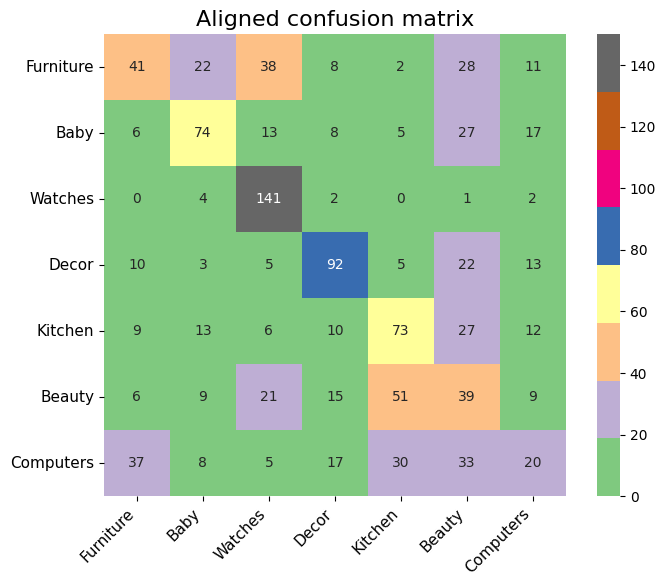

 ARI : 0.22335537137809217
              precision    recall  f1-score   support

   Furniture       0.38      0.27      0.32       150
        Baby       0.56      0.49      0.52       150
     Watches       0.62      0.94      0.74       150
       Decor       0.61      0.61      0.61       150
     Kitchen       0.44      0.49      0.46       150
      Beauty       0.22      0.26      0.24       150
   Computers       0.24      0.13      0.17       150

    accuracy                           0.46      1050
   macro avg       0.44      0.46      0.44      1050
weighted avg       0.44      0.46      0.44      1050

Clustering on BoW + LatentDirichletAllocation
Clustering on BoW + LatentDirichletAllocation


In [191]:
from sklearn.decomposition import LatentDirichletAllocation
tok_lda = LatentDirichletAllocation(n_components=8,random_state=42,n_jobs=-1).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_lda)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + LatentDirichletAllocation'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)
print('Clustering on BoW + LatentDirichletAllocation' )


In [209]:
tok_lda[index][0]

array([0.02083335, 0.02083336, 0.02083334, 0.02083335, 0.02084743,
       0.02083335, 0.02083335, 0.85415246])

Best result obtained with LDA ncomponents=8. (Near from the number of categories)\
LDA is more suitable for long texts corpora so it explains the worse result.

## Projections

### PCA

* **Linear space transformation**: PCA projects data into a new coordinate system defined by orthogonal directions of maximum variance
* **Dimensionality optimization**: Reduces feature redundancy by identifying and preserving only the most informative dimensions
* **Noise reduction effect**: Lower-ranked components often capture noise, so eliminating them increases signal-to-noise ratio
* **Global pattern prioritization**: Emphasizes broad patterns that explain the largest sources of variation across documents
* **Feature correlation resolution**: Addresses multicollinearity by creating uncorrelated components from correlated original features
* **Variance-based information retention**: Provides clear metrics on how much information (variance) is preserved in the reduced space

Overall, PCA gives the same (weak) ARI scores for both encoding strategies. It also worsened ARI score for BoW only.


#### countvectorizer + PCA

cluster  effectives
Category                      
Furniture        6           9
Baby             4          27
Watches          1         124
Decor            2         101
Kitchen          5         217
Beauty           3          90
Computers        0         482

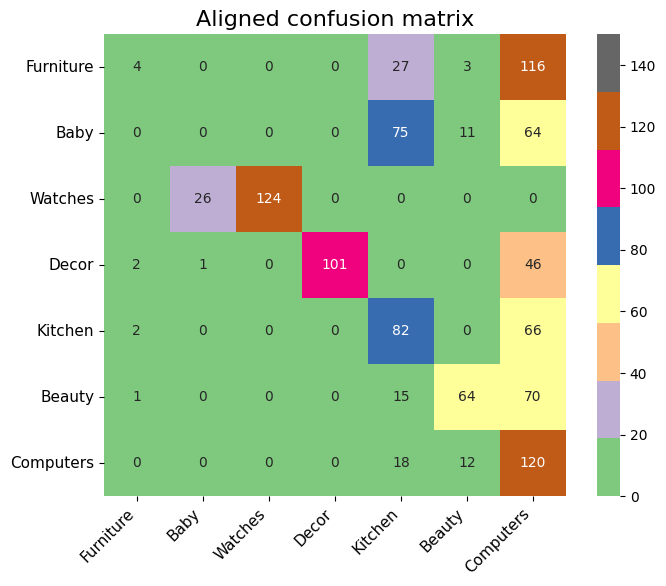

 ARI : 0.22139824350032977
              precision    recall  f1-score   support

   Furniture       0.44      0.03      0.05       150
        Baby       0.00      0.00      0.00       150
     Watches       0.99      1.00      1.00       150
       Decor       1.00      0.67      0.80       150
     Kitchen       0.38      0.55      0.45       150
      Beauty       0.71      0.43      0.53       150
   Computers       0.25      0.80      0.38       150

    accuracy                           0.50      1050
   macro avg       0.54      0.50      0.46      1050
weighted avg       0.54      0.50      0.46      1050

Clustering on BoW + PCA (2 components, 8.66% explained variance)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create full PCA model to calculate explained variance
pca_full = PCA(random_state=42)
pca_full.fit(count_vector_prod)

# Calculate cumulative variance explained by the first 2 components
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
variance_2_components = cumulative_variance[1] * 100

# Apply PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
bow_pca = pca.fit_transform(count_vector_prod)

# K-Means clustering on reduced data
kmeans2 = KMeans(n_clusters=len(dico), random_state=42, n_init=30).fit(bow_pca)
labels = kmeans2.labels_

# Title including explained variance
title = f'BoW + PCA (2 components, {variance_2_components:.2f}% explained variance)'

# Evaluate and store metrics results
append_dict(results, {
    'title': title,
    'metrics': clustering_evaluate(labels, data.cat_code, cat['category'])
})

# Display clustering results
print(f'Clustering on {title}')


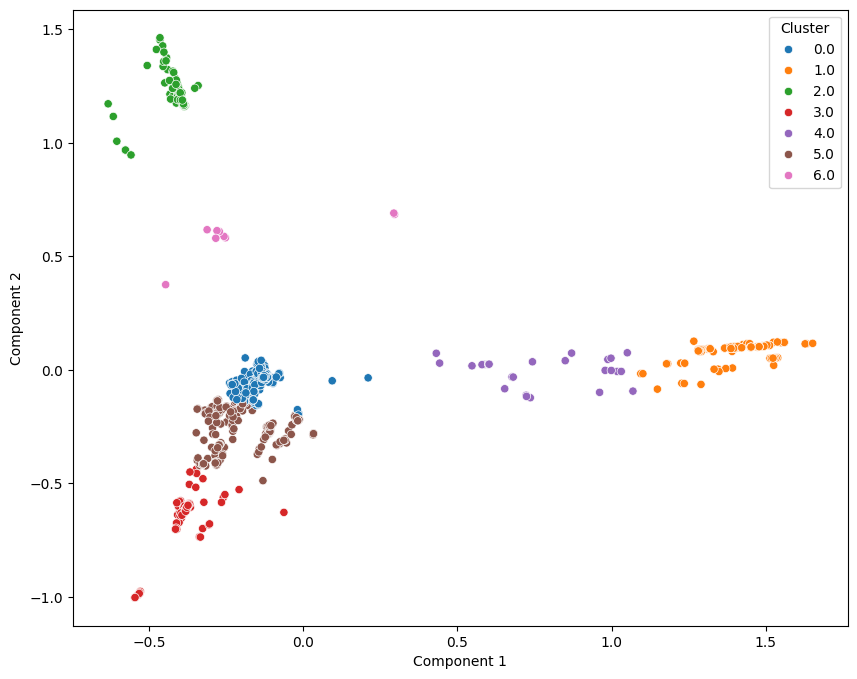

<Figure size 1000x800 with 0 Axes>

In [ ]:
plot_clusters(bow_pca,labels)

#### countvectorizer + tfidf + PCA

cluster  effectives
Category                      
Furniture        6          36
Baby             4          48
Watches          2          67
Decor            3         268
Kitchen          1          53
Beauty           5          21
Computers        0         557

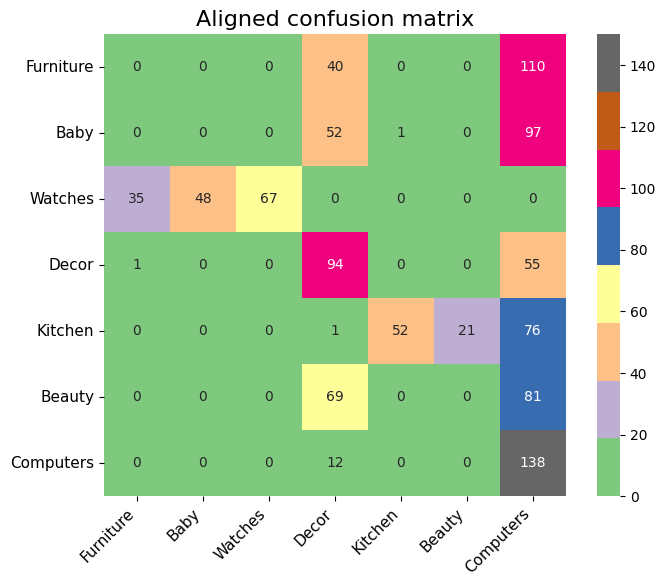

 ARI : 0.12962113301944223
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.00      0.00      0.00       150
     Watches       0.99      1.00      1.00       150
       Decor       0.35      0.63      0.45       150
     Kitchen       0.99      0.49      0.65       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.25      0.92      0.39       150

    accuracy                           0.43      1050
   macro avg       0.37      0.43      0.36      1050
weighted avg       0.37      0.43      0.36      1050

Clustering on BoW + TFiDF + PCA (2 components, 4.50% explained variance)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create full PCA model to calculate explained variance
pca_full = PCA(random_state=42)
pca_full.fit(tok)

# Calculate cumulative variance explained by the first 2 components
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
variance_2_components = cumulative_variance[1] * 100

# Apply PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
tok_pca = pca.fit_transform(tok)

# K-Means clustering on reduced data
kmeans2 = KMeans(n_clusters=len(dico), random_state=42, n_init=30).fit(tok_pca)
labels = kmeans2.labels_

# Title including explained variance
title = f'BoW + TFiDF + PCA (2 components, {variance_2_components:.2f}% explained variance)'

# Evaluate and store metrics results
append_dict(results, {
    'title': title,
    'metrics': clustering_evaluate(labels, data.cat_code, cat['category'])
})

# Display clustering results
print(f'Clustering on {title}')


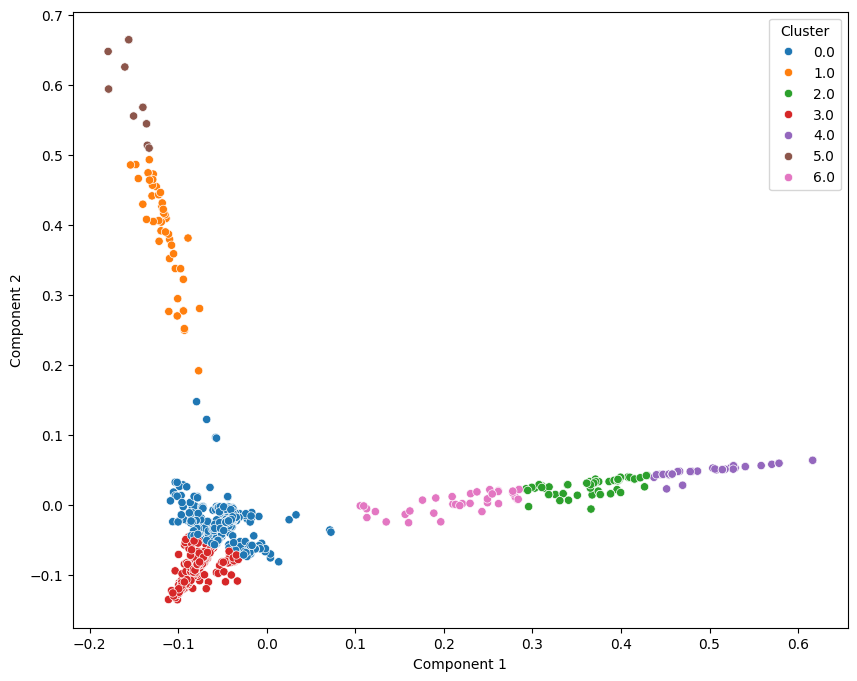

<Figure size 1000x800 with 0 Axes>

In [ ]:
plot_clusters(tok_pca,labels)

#### countvectorizer + LDA + PCA

cluster  effectives
Category                      
Furniture        3          98
Baby             2         424
Watches          6         155
Decor            1         113
Kitchen          5         126
Beauty           0          70
Computers        4          64

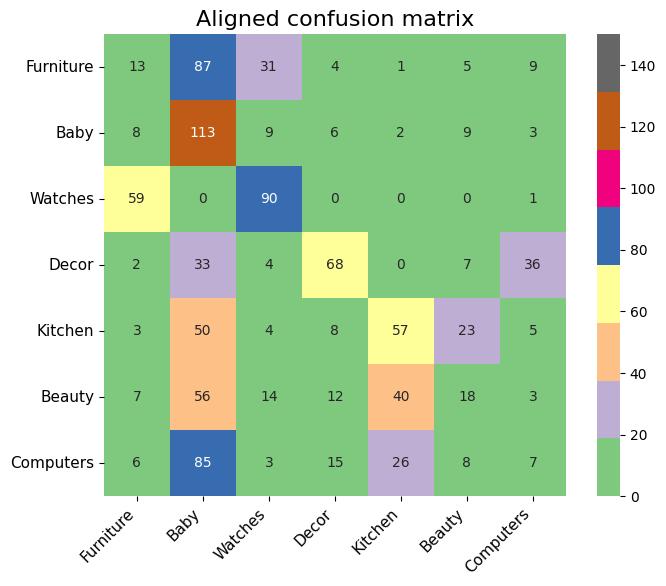

 ARI : 0.14370071701135675
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.27      0.75      0.39       150
     Watches       0.59      0.99      0.74       150
       Decor       0.59      0.69      0.64       150
     Kitchen       0.41      0.53      0.46       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.42      1050
   macro avg       0.26      0.42      0.32      1050
weighted avg       0.26      0.42      0.32      1050

Clustering on BoW + LDA + PCA (2 components, 41.37% explained variance)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create full PCA model to calculate explained variance
pca_full = PCA(random_state=42)
pca_full.fit(tok_lda)

# Calculate cumulative variance explained by the first 2 components
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
variance_2_components = cumulative_variance[1] * 100

# Apply PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
tok_pca = pca.fit_transform(tok_lda)

# K-Means clustering on reduced data
kmeans2 = KMeans(n_clusters=len(dico), random_state=42, n_init=30).fit(tok_pca)
labels = kmeans2.labels_

# Title including explained variance
title = f'BoW + LDA + PCA (2 components, {variance_2_components:.2f}% explained variance)'

# Evaluate and store metrics results
append_dict(results, {
    'title': title,
    'metrics': clustering_evaluate(labels, data.cat_code, cat['category'])
})

# Display clustering results
print(f'Clustering on {title}')


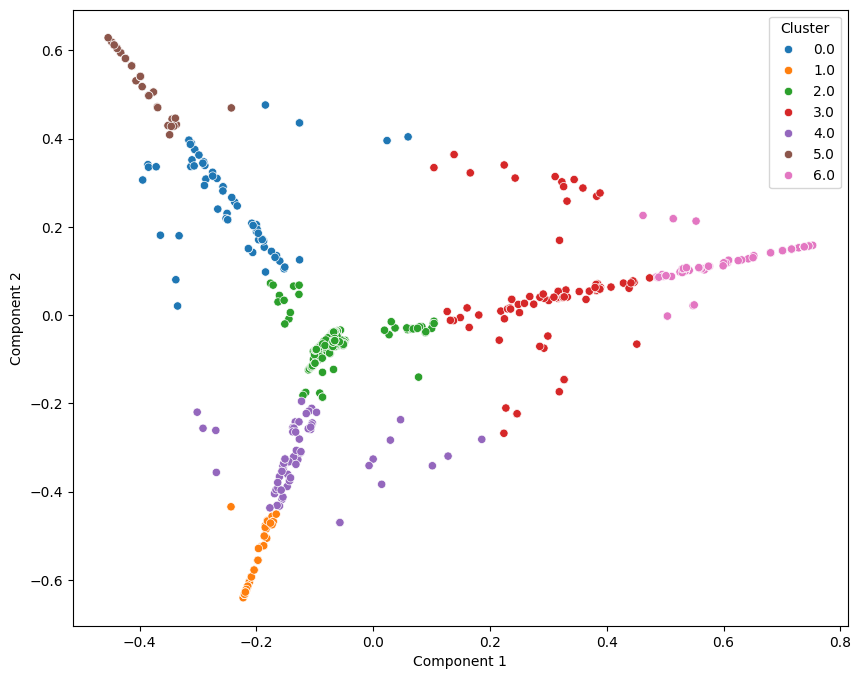

<Figure size 1000x800 with 0 Axes>

In [ ]:
plot_clusters(tok_pca,labels)

### TSNE

* **Optimized spatial reorganization**: t-SNE transforms the vector space by preserving local similarities while amplifying differences between distinct groups
* **Curse of dimensionality mitigation**: Addresses the "curse of dimensionality" problem that affects high-dimensional TF-IDF vectors, where distance metrics become less meaningful
* **Adaptation to textual complexity**: Unlike linear methods, t-SNE adapts to complex and non-linear structures present in textual data
* **Dimensional noise elimination**: Reduction to 2D eliminates non-relevant dimensions that hindered K-means performance in the original sparse vector space
* **Enhancement of natural boundaries**: The transformation accentuates natural separations between categories, considerably facilitating the clustering algorithm's task

It is interesting to see that using TSNE projection helps having a better ARI score for BoW only and TFiDF strategies.

#### countvectorizer + TSNE

cluster  effectives
Category                      
Furniture        4         107
Baby             3         112
Watches          1         149
Decor            2         166
Kitchen          5         119
Beauty           0         152
Computers        6         245

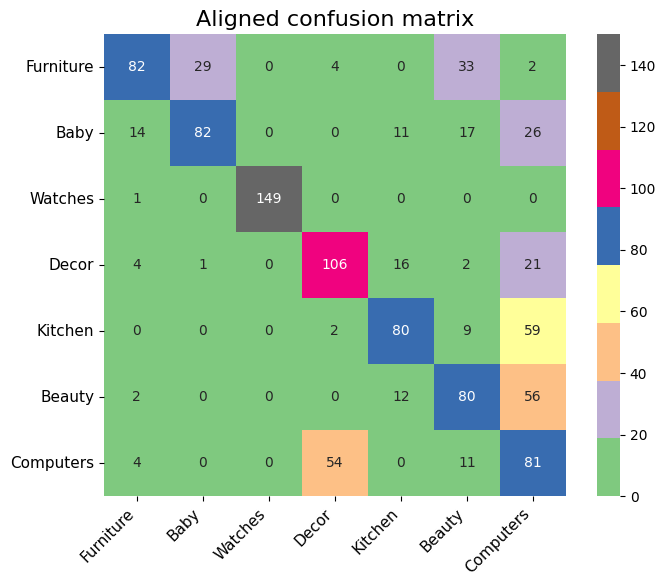

 ARI : 0.3947853053209465
              precision    recall  f1-score   support

   Furniture       0.77      0.55      0.64       150
        Baby       0.73      0.55      0.63       150
     Watches       1.00      0.99      1.00       150
       Decor       0.64      0.71      0.67       150
     Kitchen       0.67      0.53      0.59       150
      Beauty       0.53      0.53      0.53       150
   Computers       0.33      0.54      0.41       150

    accuracy                           0.63      1050
   macro avg       0.67      0.63      0.64      1050
weighted avg       0.67      0.63      0.64      1050

Clustering on BoW + T-SNE 2 components


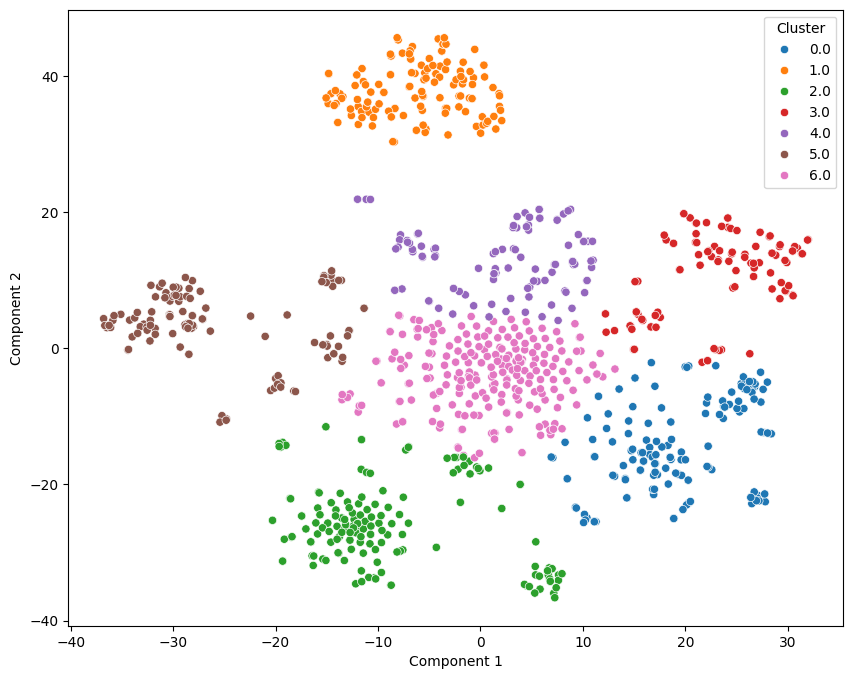

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
# tok variable comes from the countvectorizer + tfidf section
bow_tsne = TSNE(n_components=2,
                perplexity=50,
                early_exaggeration=12.0,
                learning_rate=200.0,
                max_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='random',   # pca
                verbose=0,
                random_state=42,
                method='barnes_hut',   # exact
                angle=0.2,
                n_jobs=-1
               ).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_tsne)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + T-SNE 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_tsne,labels)

#### countvectorizer + tfidf + TSNE

cluster  effectives
Category                      
Furniture        0         170
Baby             2         151
Watches          1         158
Decor            4         148
Kitchen          6         113
Beauty           5         185
Computers        3         125

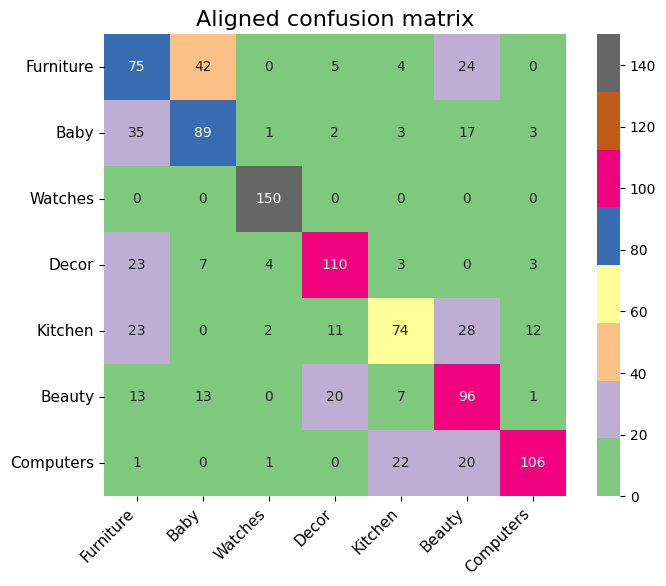

 ARI : 0.4283648275189049
              precision    recall  f1-score   support

   Furniture       0.44      0.50      0.47       150
        Baby       0.59      0.59      0.59       150
     Watches       0.95      1.00      0.97       150
       Decor       0.74      0.73      0.74       150
     Kitchen       0.65      0.49      0.56       150
      Beauty       0.52      0.64      0.57       150
   Computers       0.85      0.71      0.77       150

    accuracy                           0.67      1050
   macro avg       0.68      0.67      0.67      1050
weighted avg       0.68      0.67      0.67      1050

Clustering on BoW + TFiDF + T-SNE 2 components


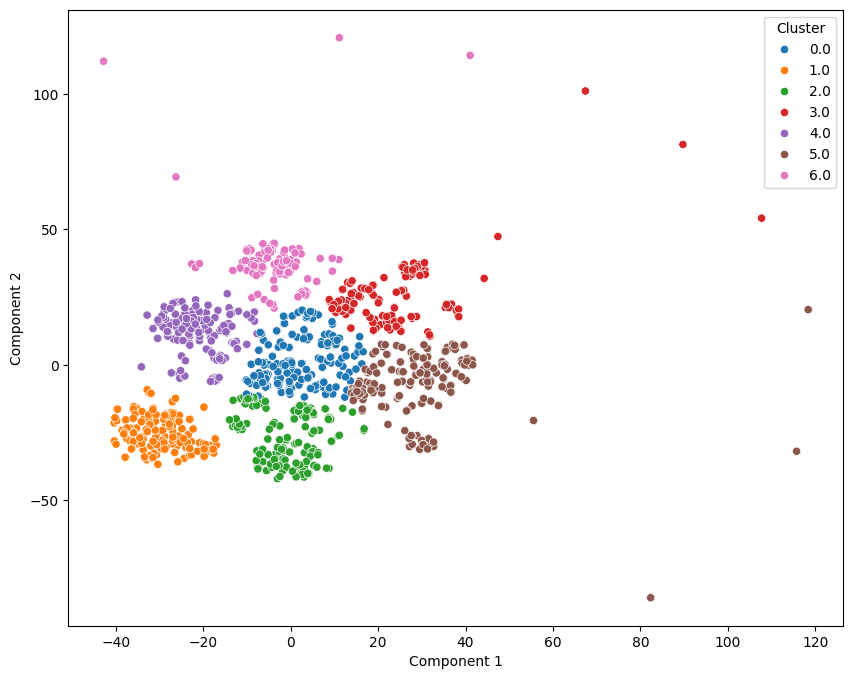

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
# tok variable comes from the countvectorizer + tfidf section
tok_tsne = TSNE(n_components=2,
                perplexity=50,
                early_exaggeration=12.0,
                learning_rate=200.0,
                max_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='random',   # pca
                verbose=0,
                random_state=42,
                method='barnes_hut',   # exact
                angle=0.2,
                n_jobs=-1
               ).fit_transform(tok)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_tsne)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + TFiDF + T-SNE 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_tsne,labels)

#### countvectorizer + LDA +TSNE

cluster  effectives
Category                      
Furniture        5         110
Baby             2         224
Watches          1         218
Decor            6         145
Kitchen          4         169
Beauty           0         101
Computers        3          83

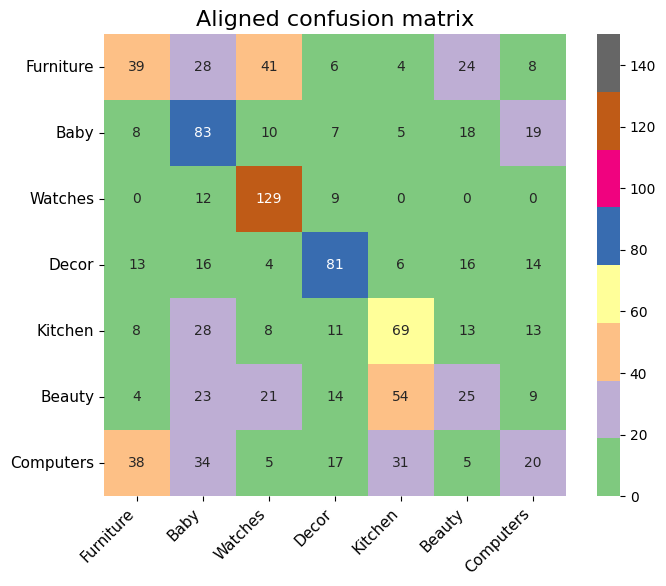

 ARI : 0.18518220530713048
              precision    recall  f1-score   support

   Furniture       0.35      0.26      0.30       150
        Baby       0.37      0.55      0.44       150
     Watches       0.59      0.86      0.70       150
       Decor       0.56      0.54      0.55       150
     Kitchen       0.41      0.46      0.43       150
      Beauty       0.25      0.17      0.20       150
   Computers       0.24      0.13      0.17       150

    accuracy                           0.42      1050
   macro avg       0.40      0.42      0.40      1050
weighted avg       0.40      0.42      0.40      1050

Clustering on BoW + LDA + T-SNE 2 components


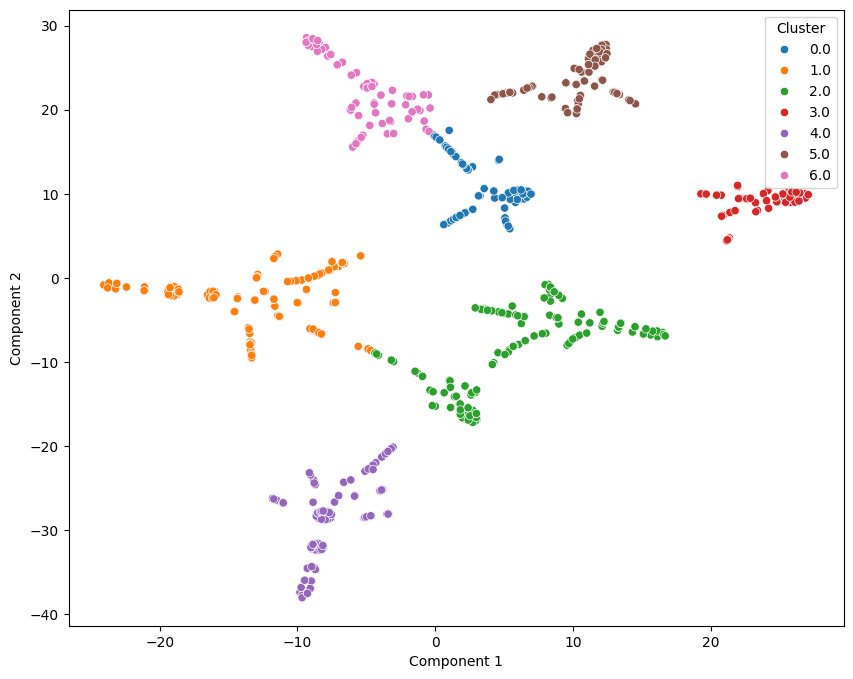

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
# tok variable comes from the countvectorizer + tfidf section
tok_tsne = TSNE(n_components=2,
                perplexity=50,
                early_exaggeration=12.0,
                learning_rate=200.0,
                max_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='random',   # pca
                verbose=0,
                random_state=42,
                method='barnes_hut',   # exact
                angle=0.2,
                n_jobs=-1
               ).fit_transform(tok_lda)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_tsne)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + LDA + T-SNE 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_tsne,labels)

### MDS

* **Distance preservation focus**: Maintains pairwise distances between documents in lower-dimensional space
* **Global relationship retention**: Preserves overall structure of document relationships
* **Similarity visualization**: Transforms abstract similarities into interpretable spatial relationships
* **Stress minimization**: Optimizes projection by minimizing distortion in distance representation
* **Metric integrity**: Provides faithful representation of original document dissimilarities
* **Euclidean interpretation**: Projected distances correspond meaningfully to original feature differences

Interesting to see that the MDS projection gives better results coupled with LDA approach (compared to TFIDF). The best ARI score is for the BoW only strategy.

#### countvectorizer + MDS

cluster  effectives
Category                      
Furniture        4         133
Baby             1         123
Watches          5         160
Decor            6         150
Kitchen          0         150
Beauty           3         147
Computers        2         187

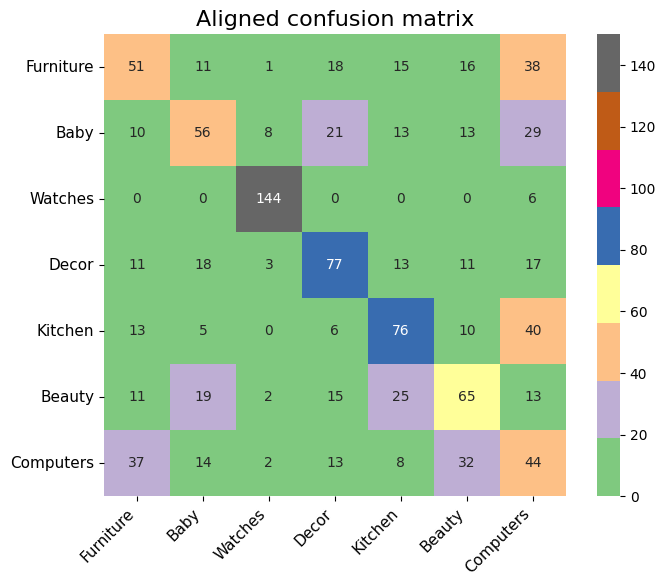

 ARI : 0.23828443866644475
              precision    recall  f1-score   support

   Furniture       0.38      0.34      0.36       150
        Baby       0.46      0.37      0.41       150
     Watches       0.90      0.96      0.93       150
       Decor       0.51      0.51      0.51       150
     Kitchen       0.51      0.51      0.51       150
      Beauty       0.44      0.43      0.44       150
   Computers       0.24      0.29      0.26       150

    accuracy                           0.49      1050
   macro avg       0.49      0.49      0.49      1050
weighted avg       0.49      0.49      0.49      1050

Clustering on BoW + MDS 2 components


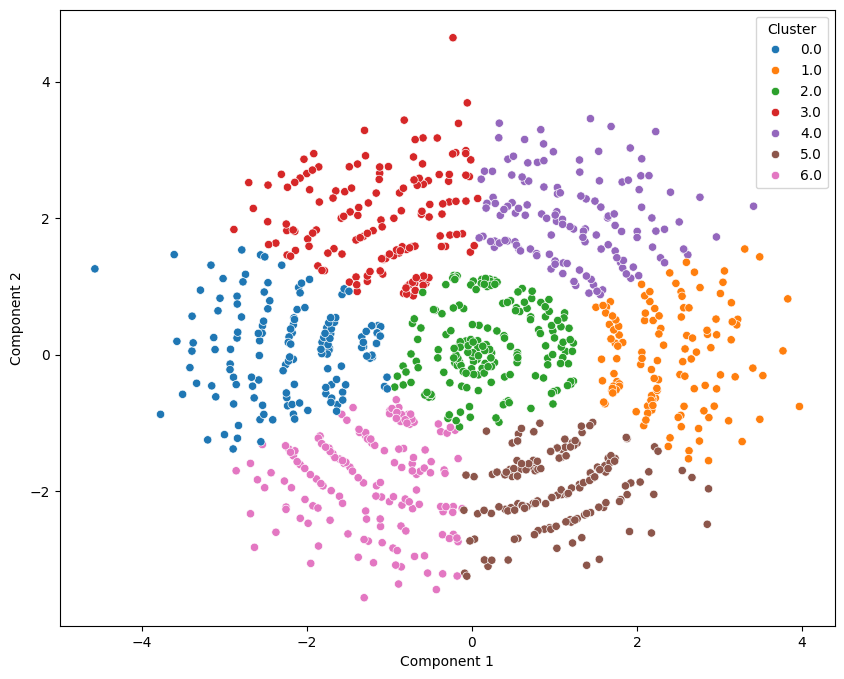

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import MDS
bow_mds = MDS(n_components=2,
              metric=True,
              n_init=4,
              max_iter=300,
              verbose=0,
              eps=0.001,
              n_jobs=-1,
              random_state=42,

             ).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans3 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_mds)
    # Assign clusters
labels=kmeans3.labels_

title='BoW + MDS 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_mds,labels)

#### countvectorizer + tfidf + MDS

cluster  effectives
Category                      
Furniture        2         159
Baby             0          96
Watches          3         168
Decor            1         160
Kitchen          4         151
Beauty           5         155
Computers        6         161

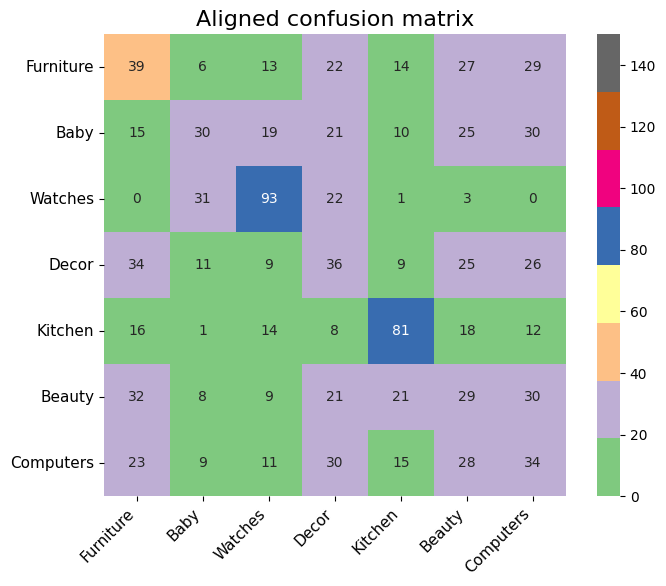

 ARI : 0.09610740271693684
              precision    recall  f1-score   support

   Furniture       0.25      0.26      0.25       150
        Baby       0.00      0.00      0.00       150
     Watches       0.47      0.83      0.60       150
       Decor       0.23      0.24      0.23       150
     Kitchen       0.54      0.54      0.54       150
      Beauty       0.19      0.19      0.19       150
   Computers       0.21      0.23      0.22       150

    accuracy                           0.33      1050
   macro avg       0.27      0.33      0.29      1050
weighted avg       0.27      0.33      0.29      1050

Clustering on BoW + TFiDF + MDS 2 components


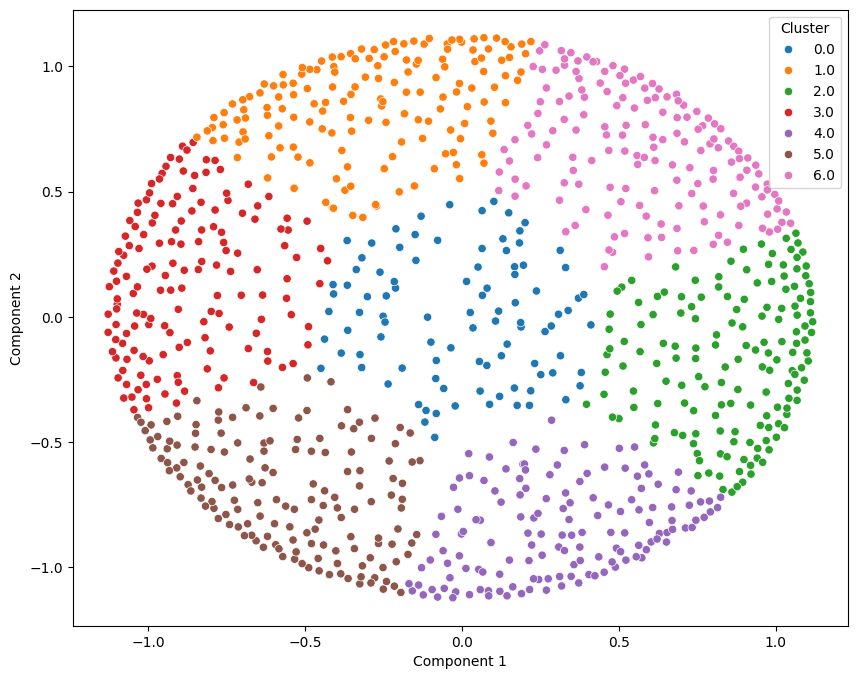

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import MDS
tok_mds = MDS(n_components=2,
              metric=True,
              n_init=4,
              max_iter=300,
              verbose=0,
              eps=0.001,
              n_jobs=-1,
              random_state=42,

             ).fit_transform(tok)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans3 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_mds)
    # Assign clusters
labels=kmeans3.labels_

title='BoW + TFiDF + MDS 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_mds,labels)

#### countvectorizer + LDA + MDS

cluster  effectives
Category                      
Furniture        6         130
Baby             0         178
Watches          2         221
Decor            4         150
Kitchen          5         164
Beauty           3          95
Computers        1         112

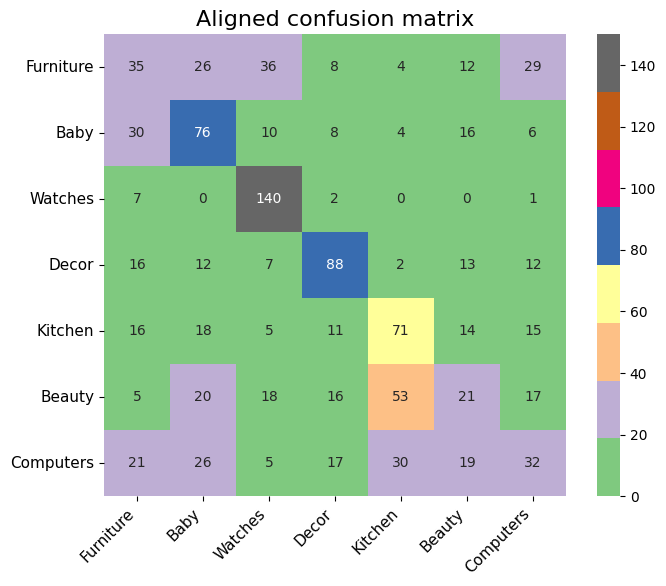

 ARI : 0.21142301801669833
              precision    recall  f1-score   support

   Furniture       0.27      0.23      0.25       150
        Baby       0.43      0.51      0.46       150
     Watches       0.63      0.93      0.75       150
       Decor       0.59      0.59      0.59       150
     Kitchen       0.43      0.47      0.45       150
      Beauty       0.22      0.14      0.17       150
   Computers       0.29      0.21      0.24       150

    accuracy                           0.44      1050
   macro avg       0.41      0.44      0.42      1050
weighted avg       0.41      0.44      0.42      1050

Clustering on BoW + LDA + MDS 2 components


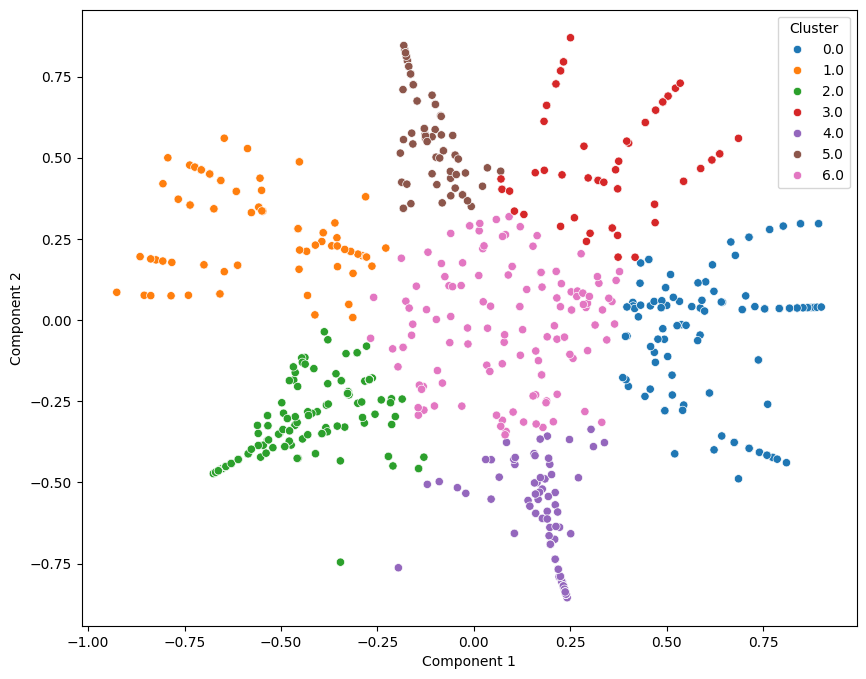

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import MDS
tok_mds = MDS(n_components=2,
              metric=True,
              n_init=4,
              max_iter=300,
              verbose=0,
              eps=0.001,
              n_jobs=-1,
              random_state=42,

             ).fit_transform(tok_lda)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans3 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_mds)
    # Assign clusters
labels=kmeans3.labels_

title='BoW + LDA + MDS 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_mds,labels)

### SpectralEmbedding

* **Graph-based approach**: Leverages connectivity patterns between documents for dimensionality reduction
* **Non-linear manifold learning**: Captures intrinsic geometric structure of the document space
* **Eigenvector foundation**: Uses the most significant eigenvectors of the graph Laplacian matrix
* **Community detection strength**: Excels at revealing natural groupings and thematic communities
* **Connectivity preservation**: Maintains connected components from the high-dimensional space
* **Local-to-global mapping**: Builds global representation from local neighborhood information

On spectral projection, TFIDF gives better results than LDA. BoW only ARI score is also falling.

#### countvectorizer + spectral

cluster  effectives
Category                      
Furniture        3          13
Baby             4         643
Watches          1         119
Decor            0         180
Kitchen          2          74
Beauty           5          17
Computers        6           4

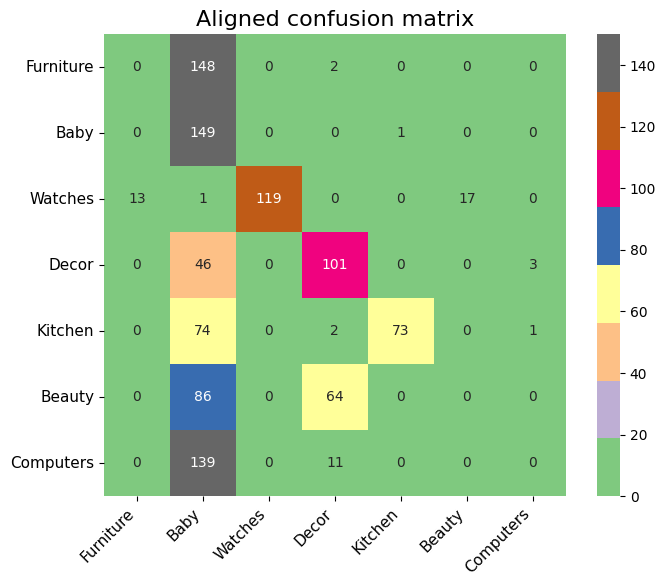

 ARI : 0.18685982438726498
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.23      0.99      0.38       150
     Watches       1.00      0.99      1.00       150
       Decor       0.57      0.69      0.62       150
     Kitchen       0.99      0.49      0.65       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.45      1050
   macro avg       0.40      0.45      0.38      1050
weighted avg       0.40      0.45      0.38      1050

Clustering on BoW + Spectral 2 components


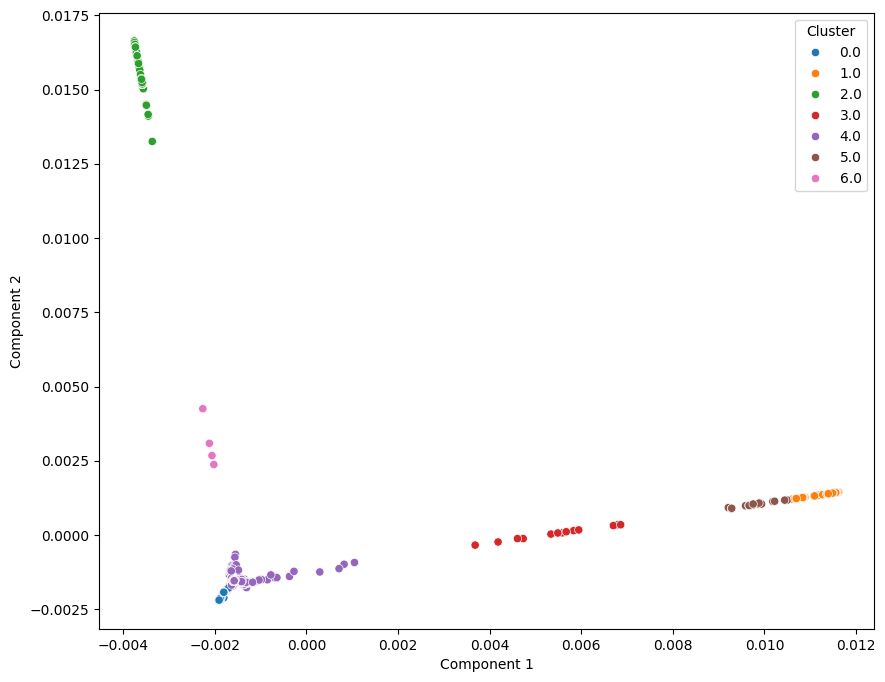

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import SpectralEmbedding
bow_spec = SpectralEmbedding(n_components=2,
                             affinity='nearest_neighbors', # rbf
                             gamma=None,
                             random_state=42,
                             eigen_solver=None, # arpack lobpcg amg
                             n_neighbors=50,
                             n_jobs=-1
                            ).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans4 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_spec)
    # Assign clusters
labels=kmeans4.labels_

title='BoW + Spectral 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_spec,labels)

#### countvectorizer + tfidf + spectral

cluster  effectives
Category                      
Furniture        6         331
Baby             3          73
Watches          5         123
Decor            4          79
Kitchen          0         111
Beauty           1          29
Computers        2         304

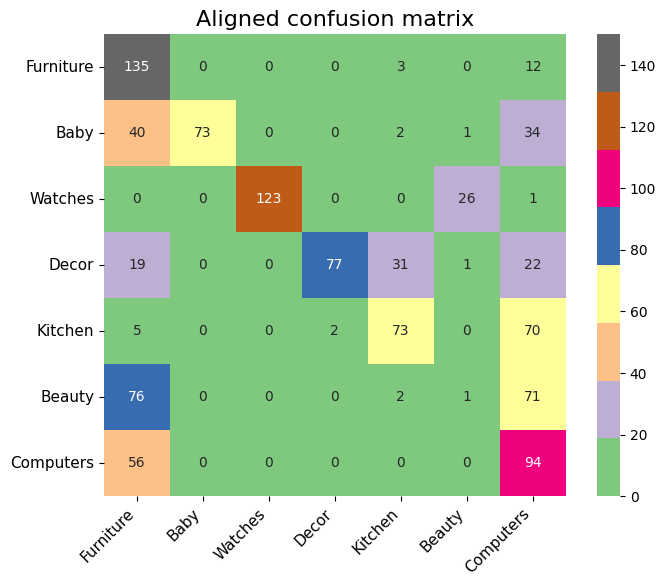

 ARI : 0.29078701458624595
              precision    recall  f1-score   support

   Furniture       0.41      0.90      0.56       150
        Baby       1.00      0.49      0.65       150
     Watches       0.98      0.99      0.99       150
       Decor       0.97      0.51      0.67       150
     Kitchen       0.66      0.49      0.56       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.31      0.63      0.41       150

    accuracy                           0.57      1050
   macro avg       0.62      0.57      0.55      1050
weighted avg       0.62      0.57      0.55      1050

Clustering on BoW + TFiDF + Spectral 2 components


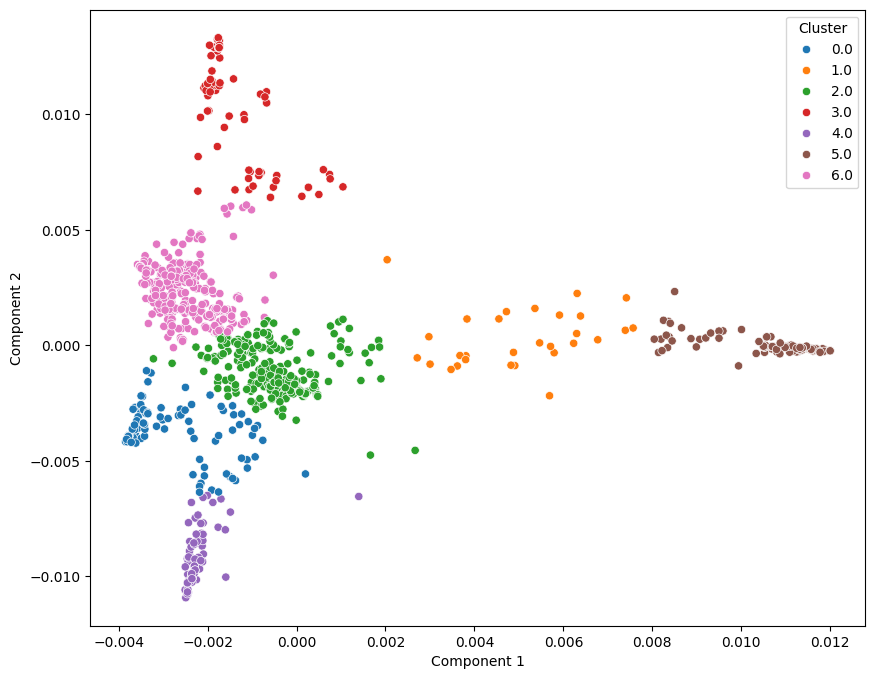

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import SpectralEmbedding
tok_spec = SpectralEmbedding(n_components=2,
                             affinity='nearest_neighbors', # rbf
                             gamma=None,
                             random_state=42,
                             eigen_solver=None, # arpack lobpcg amg
                             n_neighbors=50,
                             n_jobs=-1
                            ).fit_transform(tok)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans4 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_spec)
    # Assign clusters
labels=kmeans4.labels_

title='BoW + TFiDF + Spectral 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_spec,labels)

#### countvectorizer + LDA + spectral

cluster  effectives
Category                      
Furniture        3         200
Baby             1         423
Watches          6         109
Decor            2          87
Kitchen          0          92
Beauty           4          74
Computers        5          65

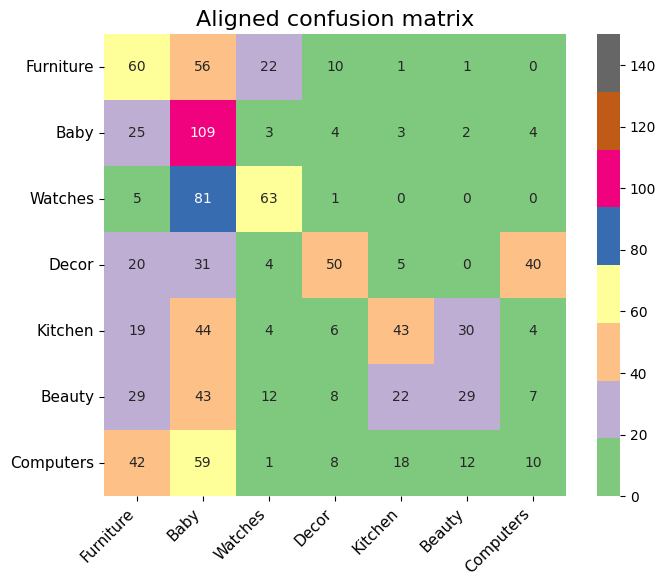

 ARI : 0.08170373605315741
              precision    recall  f1-score   support

   Furniture       0.30      0.40      0.34       150
        Baby       0.26      0.73      0.38       150
     Watches       0.58      0.42      0.49       150
       Decor       0.59      0.60      0.60       150
     Kitchen       0.44      0.49      0.46       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.38      1050
   macro avg       0.31      0.38      0.32      1050
weighted avg       0.31      0.38      0.32      1050

Clustering on BoW + LDA + Spectral 2 components


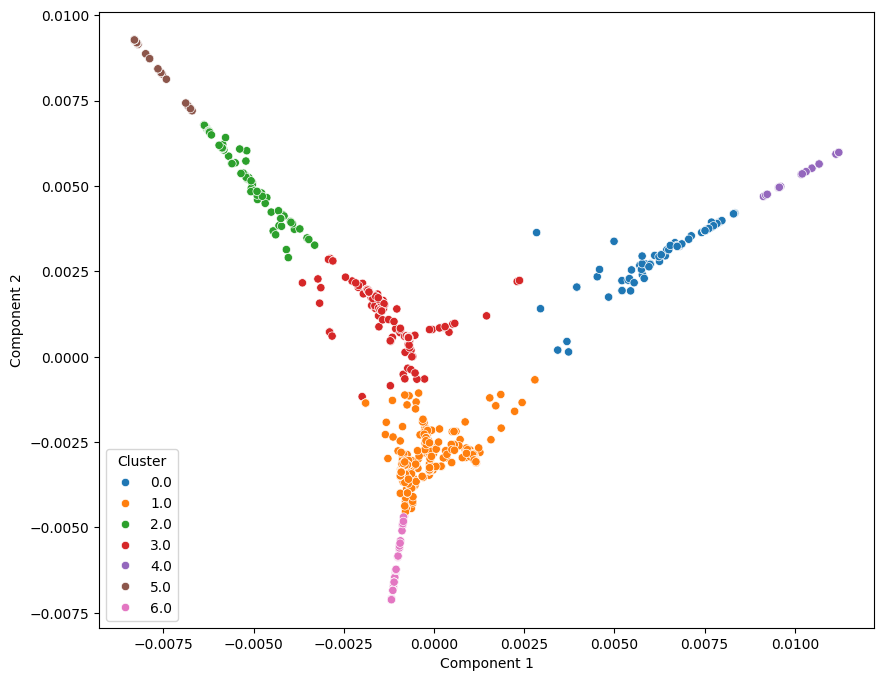

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import SpectralEmbedding
tok_spec = SpectralEmbedding(n_components=2,
                             affinity='nearest_neighbors', # rbf
                             gamma=None,
                             random_state=42,
                             eigen_solver=None, # arpack lobpcg amg
                             n_neighbors=50,
                             n_jobs=-1
                            ).fit_transform(tok_lda)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans4 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_spec)
    # Assign clusters
labels=kmeans4.labels_

title='BoW + LDA + Spectral 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_spec,labels)

### UMAP

* **Balanced structure preservation**: Maintains both local similarity relationships and global data patterns
* **Topological foundation**: Constructs representation based on manifold topology and fuzzy simplicial sets
* **Computational efficiency**: Delivers t-SNE-like quality with significantly better performance
* **Meaningful distance preservation**: Maintains more of the important distance relationships than t-SNE
* **Theoretical rigor**: Built on stronger mathematical foundations with clearer optimization objectives
* **Cluster separation clarity**: Produces well-defined clusters while preserving their relative positions

On UMAP projection, TFIDF gives better results than LDA. BoW only ARI score fell a bit.

#### countvectorizer + UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster  effectives
Category                      
Furniture        5          50
Baby             1          99
Watches          2         149
Decor            0         107
Kitchen          4          74
Beauty           3         110
Computers        6         461

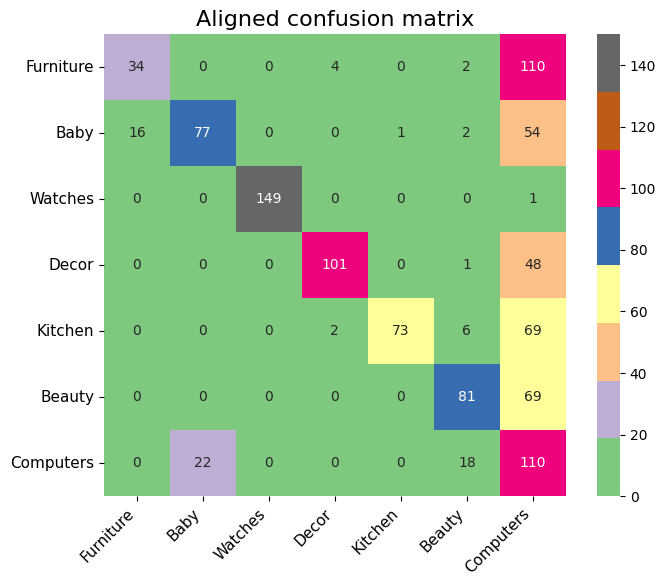

 ARI : 0.2906052432375619
              precision    recall  f1-score   support

   Furniture       0.28      0.96      0.44       150
        Baby       0.78      0.51      0.62       150
     Watches       1.00      0.99      1.00       150
       Decor       0.94      0.67      0.79       150
     Kitchen       0.99      0.49      0.65       150
      Beauty       0.74      0.54      0.62       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.60      1050
   macro avg       0.68      0.60      0.59      1050
weighted avg       0.68      0.60      0.59      1050

Clustering sur BoW + UMAP 2 components


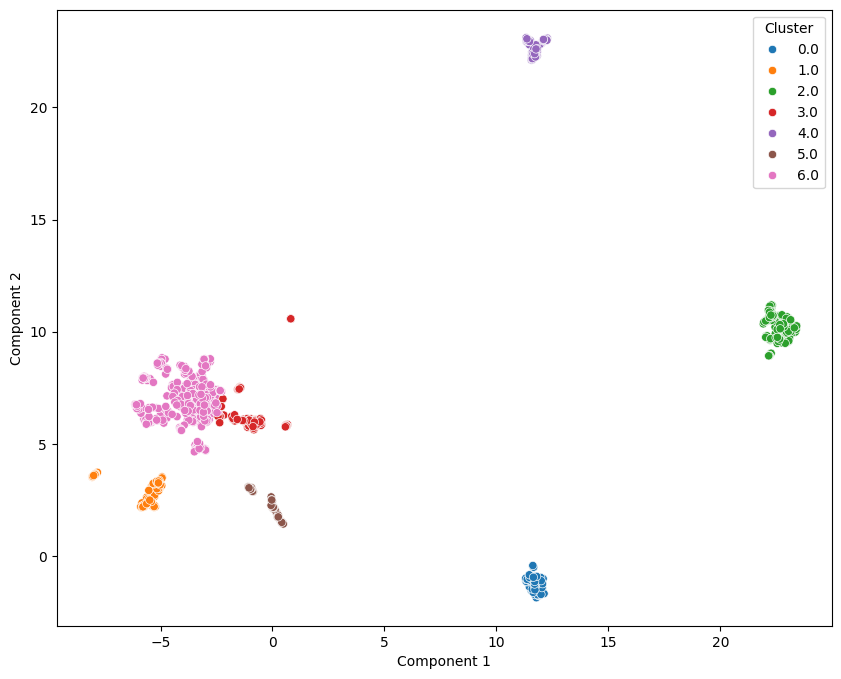

<Figure size 1000x800 with 0 Axes>

In [ ]:
import umap

Umap = umap.UMAP(
                n_neighbors=50,
                min_dist=0.1,
                n_components=2,
                metric='euclidean',
                random_state=42
    )
bow_umap = Umap.fit_transform(count_vector_prod)

kmeans5 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_umap)
    # Assign clusters
labels=kmeans5.labels_

title='BoW + UMAP 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_umap,labels)

#### countvectorizer + tfidf + UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster  effectives
Category                      
Furniture        3         211
Baby             5         202
Watches          2         141
Decor            0         159
Kitchen          1          95
Beauty           4         135
Computers        6         107

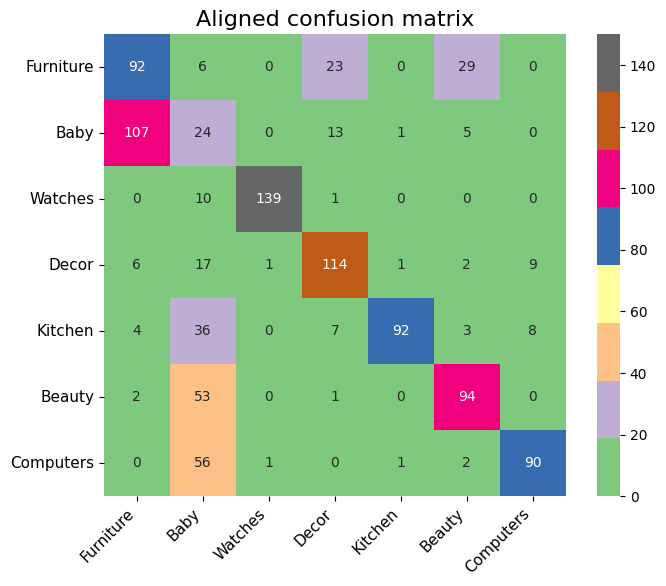

 ARI : 0.4535620437536929
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.51      0.71      0.59       150
     Watches       0.99      0.93      0.96       150
       Decor       0.72      0.76      0.74       150
     Kitchen       0.97      0.61      0.75       150
      Beauty       0.70      0.63      0.66       150
   Computers       0.47      0.97      0.64       150

    accuracy                           0.66      1050
   macro avg       0.62      0.66      0.62      1050
weighted avg       0.62      0.66      0.62      1050

Clustering sur BoW + TFiDF + UMAP 2 components


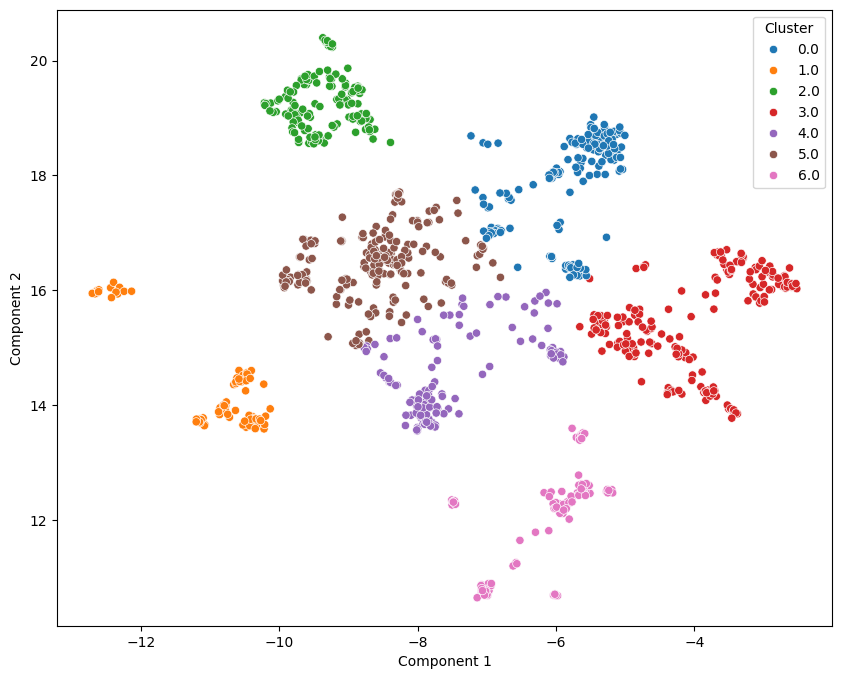

<Figure size 1000x800 with 0 Axes>

In [ ]:
import umap

Umap = umap.UMAP(
                n_neighbors=50,
                min_dist=0.1,
                n_components=2,
                metric='euclidean',
                random_state=42
    )
tok_umap = Umap.fit_transform(tok)

kmeans5 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_umap)
    # Assign clusters
labels=kmeans5.labels_

title='BoW + TFiDF + UMAP 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_umap,labels)

#### countvectorizer + LDA + UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster  effectives
Category                      
Furniture        6          30
Baby             4         407
Watches          5         159
Decor            2          98
Kitchen          0          93
Beauty           3          65
Computers        1         198

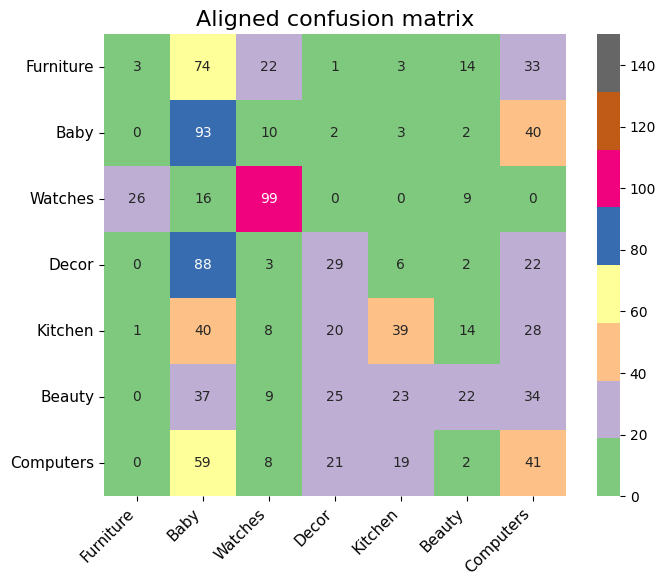

 ARI : 0.09190171436659296
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.23      0.62      0.33       150
     Watches       0.66      0.83      0.74       150
       Decor       0.30      0.19      0.23       150
     Kitchen       0.42      0.26      0.32       150
      Beauty       0.34      0.15      0.20       150
   Computers       0.21      0.27      0.24       150

    accuracy                           0.33      1050
   macro avg       0.31      0.33      0.30      1050
weighted avg       0.31      0.33      0.30      1050

Clustering sur BoW + LDA + UMAP 2 components


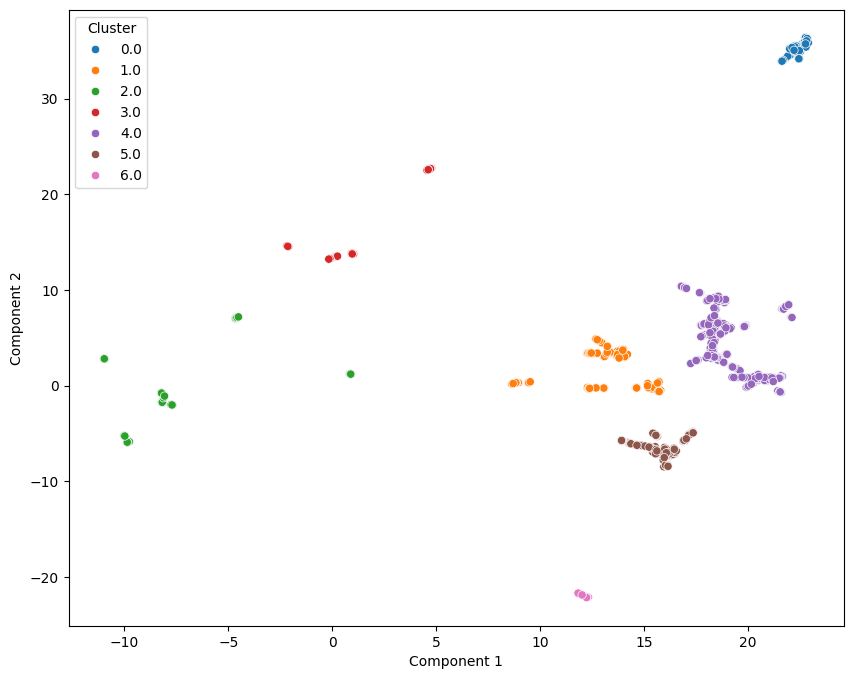

<Figure size 1000x800 with 0 Axes>

In [ ]:
import umap

Umap = umap.UMAP(
                n_neighbors=50,
                min_dist=0.1,
                n_components=2,
                metric='euclidean',
                random_state=42
    )
tok_umap = Umap.fit_transform(tok_lda)

kmeans5 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_umap)
    # Assign clusters
labels=kmeans5.labels_

title='BoW + LDA + UMAP 2 components'
# Evaluate and store metrics results)
append_dict(results, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_umap,labels)

# 4) var 'DESCRIPTION'

In [210]:
stats_description=text_stats(data.description)
stats_description

word_count  char_count  sentence_count  avg_word_length  \
0            230        1191              11         5.178261   
1             74         371               1         5.013514   
2            215        1045               9         4.860465   
3            145         714               1         4.924138   
4            214         984               6         4.598131   
...          ...         ...             ...              ...   
1045         431        2006              36         4.654292   
1046         303        1358              20         4.481848   
1047          37         226               6         6.108108   
1048          31         180               6         5.806452   
1049          29         159               6         5.482759   

      avg_sentence_lenght  
0               20.909091  
1               74.000000  
2               23.888889  
3              145.000000  
4               35.666667  
...                   ...  
1045            11.972222  
1046            15.150000  
1047             6.166667  
1048             5.166667  
1049             4.833333  

[1050 rows x 5 columns]

In [211]:
stats_description.describe()

word_count   char_count  sentence_count  avg_word_length  \
count  1050.000000  1050.000000     1050.000000      1050.000000   
mean     80.321905   394.720952        6.604762         5.055891   
std      77.407537   381.566353        4.655836         0.623171   
min      18.000000    78.000000        1.000000         2.228571   
25%      31.000000   161.000000        5.000000         4.724138   
50%      47.000000   231.500000        6.000000         5.108108   
75%     103.000000   486.750000        8.000000         5.500000   
max     589.000000  2902.000000       44.000000         6.866667   

       avg_sentence_lenght  
count          1050.000000  
mean             17.269636  
std              18.719521  
min               2.875000  
25%               4.833333  
50%              10.200000  
75%              21.875000  
max             145.000000

## Preprocess

In [212]:
pd.set_option('display.max_colwidth', None)
data.description.head(10)

0    Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel
2                                                                                                                                                                     Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by Â±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face

In [213]:
import nltk, re, pprint
from nltk import word_tokenize

tokenized=word_tokenize(data.loc[9,'description'])
tokenized

['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 '-',
 'For',
 'Boys',
 ',',
 'Men',
 '-',
 'Buy',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 '-',
 'For',
 'Boys',
 ',',
 'Men',
 'CAU1116.BA0858',
 'Online',
 'at',
 'Rs.107750',
 'in',
 'India',
 'Only',
 'at',
 'Flipkart.com',
 '.',
 'Swiss-made',
 ',',
 'Quartz',
 'movement',
 ',',
 'Scratch',
 'resistant',
 ',',
 'Sapphire',
 'crystal',
 'glass',
 ',',
 'Water',
 'resistant',
 'to',
 '200',
 'metres',
 ',',
 'Feature',
 'Chronograph',
 '-',
 'Great',
 'Discounts',
 ',',
 'Only',
 'Genuine',
 'Products',
 ',',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 ',',
 'Free',
 'Shipping',
 '.',
 'Cash',
 'On',
 'Delivery',
 '!']

In [214]:
import string
print(' Punctuation list : {}'.format(string.punctuation))
no_punct=[w for w in tokenized if w not in string.punctuation+'0123456789 ']
no_punct

 Punctuation list : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'Buy',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'CAU1116.BA0858',
 'Online',
 'at',
 'Rs.107750',
 'in',
 'India',
 'Only',
 'at',
 'Flipkart.com',
 'Swiss-made',
 'Quartz',
 'movement',
 'Scratch',
 'resistant',
 'Sapphire',
 'crystal',
 'glass',
 'Water',
 'resistant',
 'to',
 '200',
 'metres',
 'Feature',
 'Chronograph',
 'Great',
 'Discounts',
 'Only',
 'Genuine',
 'Products',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 'Free',
 'Shipping',
 'Cash',
 'On',
 'Delivery']

In [215]:
from nltk.corpus import stopwords
print(' Stop Words list : {}'.format(stopwords.words('english')))
wo_stop= [w for w in no_punct if w not in stopwords.words('english')]
wo_stop

 Stop Words list : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'sh

['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'Buy',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'CAU1116.BA0858',
 'Online',
 'Rs.107750',
 'India',
 'Only',
 'Flipkart.com',
 'Swiss-made',
 'Quartz',
 'movement',
 'Scratch',
 'resistant',
 'Sapphire',
 'crystal',
 'glass',
 'Water',
 'resistant',
 '200',
 'metres',
 'Feature',
 'Chronograph',
 'Great',
 'Discounts',
 'Only',
 'Genuine',
 'Products',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 'Free',
 'Shipping',
 'Cash',
 'On',
 'Delivery']

In [216]:
from nltk.stem.porter import PorterStemmer
import nltk
import re
import pprint
from nltk import word_tokenize


import string
from nltk.corpus import stopwords

# stemming (reducing words to their base to avoid plurals, conjugations, etc.)
from nltk import SnowballStemmer
snowball = SnowballStemmer(language='english')

porter = PorterStemmer()


# lower + no punctuation + tokenize + no stop_words
def preprocess0(text):
    text = text.lower()
    no_punct = ''.join(
        [char for char in text if char not in string.punctuation+'0123456789'])
    tokenized = word_tokenize(no_punct)
    wo_stop = [w for w in tokenized if w not in stopwords.words('english')]
    return ' '.join(list(set(wo_stop)))


# lower + no puctuation + tokenize + no stop_words + stemming
def preprocess1(text, detailed=False):

    ltext = text.lower()
    no_punct = ''.join(
        [char for char in ltext if char not in string.punctuation+'0123456789'])
    tokenized = word_tokenize(no_punct)
    wo_stop = [w for w in tokenized if w not in stopwords.words('english')]
    stemmed = [snowball.stem(w) for w in wo_stop]

    if detailed:
      print('Original text:')
      print(text)
      print('\nLowered text:')
      print(ltext)
      print('\nNo punctuation:')
      print(no_punct)
      print('\nTokenized:')
      print(tokenized)
      print('\nNo stop words:')
      print(' '.join(wo_stop))
      print('\nStemmed:')
      print(' '.join(stemmed))

    return ' '.join(list(set(stemmed)))


# lower + tokenize + no stop_words + stemming + no punct
def preprocess2(text, detailed=False):
    text = text.lower()
    tokenized = word_tokenize(text)
    wo_stop = [word for word in tokenized if word not in stopwords.words('english')]
    stemmed = [snowball.stem(word) for word in wo_stop]
    no_punct = [''.join([char for char in word if char not in string.punctuation+'0123456789 ' ]) for word in stemmed]
    return ' '.join(list(set(no_punct)))

Comparing different preprocess functions

In [217]:
index_ = data.sample(2).index

display('Original ', data.description.loc[index_])
display('Without stemming ', data.description.apply(preprocess0).loc[index_])
display('With stemming remove puctuation BEFORE tokenization ',
        data.description.apply(preprocess1).loc[index_])
display('With stemming remove puctuation AFTER tokenization ',
        data.description.apply(preprocess2).loc[index_])

'Original '

749                                                                                                                                                                                                                                                                        Buy Rajasthan Crafts Abstract Single Quilts & Comforters Maroon at Rs. 940 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!
283    Specifications of Yves Bertelin YBSCR557 Analog Watch  - For Women General Mechanism Quartz Type Analog Style Code YBSCR557 Ideal For Women Occasion Party-Wedding Power Source Battery Powered Warranty 6 month plating, 1 yrs Warranty for movement & battery In the Box Watch, Warranty Card, Box Body Features Dial Shape Round Box Material Wooden Strap Color Multi Dial Color White Strap Material Ceramic Strap
Name: description, dtype: object

'Without stemming '

749                                                                                                                                                              abstract products rs free single maroon cash genuine delivery buy rajasthan comforters shipping quilts flipkartcom crafts
283    color type code wooden features partywedding power general mechanism specifications occasion multi strap style source quartz plating ideal powered body month box shape material yrs white watch yves dial analog battery warranty ybscr bertelin movement round ceramic women card
Name: description, dtype: object

'With stemming remove puctuation BEFORE tokenization '

749                                                                                                                                       quilt product abstract ship comfort deliveri rs craft maroon free cash buy rajasthan singl flipkartcom genuin
283    color type code wooden specif general mechan multi strap style quartz materi ideal month box shape partywed ceram featur sourc yrs occas batteri women white watch yves plate dial analog ybscr warranti bertelin movement bodi round power card
Name: description, dtype: object

'With stemming remove puctuation AFTER tokenization '

749                                                                                                                                        quilt product abstract ship comfort deliveri rs craft maroon free cash buy rajasthan singl flipkartcom genuin
283     color type code wooden specif general mechan multi strap style quartz materi ideal month box shape partywed ceram featur sourc yrs occas batteri women white watch yves plate dial analog ybscr warranti bertelin movement bodi round power card
Name: description, dtype: object

Step by step

In [242]:
index = pd.Index([866])

preprocessed_text = preprocess1(data.description.loc[index].values[0], True)
print('\nSet preprocessed text:')
print(preprocessed_text)

Original text:
Specifications of Sivanna Baking Powder Rouge  Highlighter (Dark pink brown shimmer 10) General Traits Organic Type Mineral Quantity 12 Shade Dark pink brown shimmer 10 Ideal For Girls, Women Container Type Compact Case Highlighter Traits Multi-shaded Yes Texture Powder based In the Box Highlighter

Lowered text:
specifications of sivanna baking powder rouge  highlighter (dark pink brown shimmer 10) general traits organic type mineral quantity 12 shade dark pink brown shimmer 10 ideal for girls, women container type compact case highlighter traits multi-shaded yes texture powder based in the box highlighter

No punctuation:
specifications of sivanna baking powder rouge  highlighter dark pink brown shimmer  general traits organic type mineral quantity  shade dark pink brown shimmer  ideal for girls women container type compact case highlighter traits multishaded yes texture powder based in the box highlighter

Tokenized:
['specifications', 'of', 'sivanna', 'baking', 'powd

In [243]:
# Applying preprocess1 to sentences
data['description_prep']=data.description.apply(preprocess1)

## countvectorizer (BoW)

Preprocessing has already be done so we will not apply preprocessor in the CountVectorizer method. Moreover, some features are not available in CountVectorizer preprocessing method (no stemming + nltk linguistic tokenization)

In [244]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Bag of Words (BoW) feature engineering tool
  # creates a table with columns for each different word in the entire dataset
  # each row of the dataset will have a vector value for each word (which can be 0 in case of a word that is in another row)
cv_prod = CountVectorizer(
                          encoding='iso-8859-1',
                          decode_error='strict',
                          strip_accents='unicode',
                          lowercase=False, # useless since already done in preprocess1
                          preprocessor=None,
#                           tokenizer=None, # default value
                          stop_words=None,
#                           token_pattern=r'(?u)\b\w\w+\b', # default value
                          ngram_range=(1, 1),
                          analyzer='word', # better than analyzing character by character
                          max_df=1.0, # do not filter words that appear in 100% of the strings (= keep all words)
                          min_df=1, # do not filter words that appear in less than 1 string (= keep all words)
                          max_features=None,
#                           vocabulary=None,
                          binary=False,

                         )

count_vector_prod=cv_prod.fit_transform(data.description_prep)
count_vector_prod=count_vector_prod.toarray()
count_vector_prod.shape

(1050, 4595)

In [245]:
preprocessed_text_bow_matches = { word : cv_prod.vocabulary_[word]for word in preprocessed_text.split(' ') }
# Sort dictionary by values
preprocessed_text_bow_matches = dict(sorted(preprocessed_text_bow_matches.items(), key=lambda item: item[1]))
print(preprocessed_text_bow_matches)

{'bake': 300, 'base': 320, 'box': 468, 'brown': 512, 'case': 617, 'compact': 809, 'contain': 855, 'dark': 1002, 'general': 1665, 'girl': 1693, 'highlight': 1883, 'ideal': 1960, 'miner': 2548, 'multishad': 2652, 'organ': 2842, 'pink': 3015, 'powder': 3112, 'quantiti': 3237, 'roug': 3446, 'shade': 3604, 'shimmer': 3630, 'sivanna': 3693, 'specif': 3806, 'textur': 4082, 'trait': 4181, 'type': 4242, 'women': 4509, 'yes': 4564}


In [246]:
print("stop_words parameter:", cv_prod.get_params().get('stop_words'))


stop_words parameter: None


In [247]:
print(f'Different words : {count_vector_prod.shape[1]}')

Different words : 4595


In [248]:
# Import KMeans clusterer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# n_clusters = different categories number
kmeans = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(count_vector_prod)
    # Assign clusters
labels=kmeans.labels_
for i in range(0,7):
    print('Cluster {} values count : {}'.format(i, np.count_nonzero(labels == i)))

adjusted_rand_score(data.cat_code,labels)

Cluster 0 values count : 335
Cluster 1 values count : 95
Cluster 2 values count : 21
Cluster 3 values count : 134
Cluster 4 values count : 11
Cluster 5 values count : 282
Cluster 6 values count : 172


0.21884203291921556

In [249]:
description_labels = labels.copy()
description_distinct_words = count_vector_prod.shape[1]

In [250]:
data.cat_code.replace(dico_reverse)

0       Furniture
1            Baby
2            Baby
3       Furniture
4       Furniture
          ...    
1045         Baby
1046         Baby
1047         Baby
1048         Baby
1049         Baby
Name: cat_code, Length: 1050, dtype: object

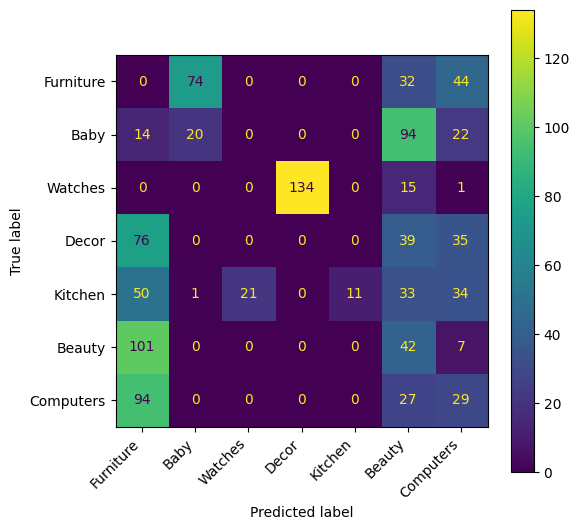

In [251]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(data.cat_code,labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cat['category']
                             )
fig,axe=plt.subplots(figsize=(6,6))
disp.plot(xticks_rotation=33,ax=axe)
axe.set_xticklabels(cat['category'], rotation = 45, ha="right")
# axe.set_xticklabels(cat.index, rotation = 45, ha="right")
plt.show()

Of course, the clusters numbers order is random so the predicted label order could be wrong. So we have to fix this.

Note : ARI is insensible to labels order so the score remains true.

In [252]:
# solves optimal assignment problem (labels assignment method)
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cm,maximize=True)

row_ind, col_ind

(array([0, 1, 2, 3, 4, 5, 6]), array([1, 5, 3, 6, 2, 0, 4]))

In [253]:
# change the columns indexes for the confusion matrix
cm=cm.take(col_ind,axis=1)

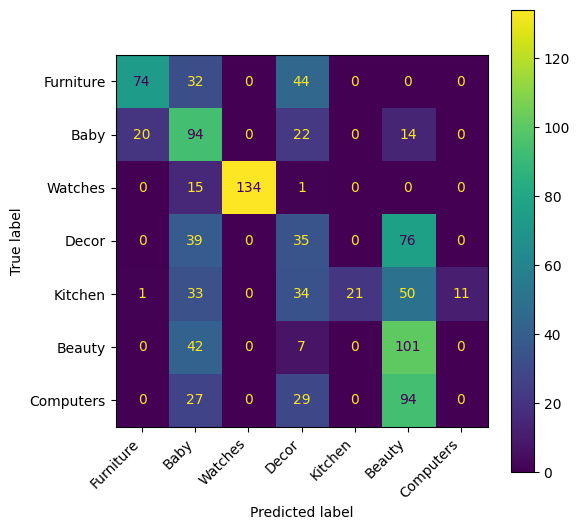

In [254]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cat['category']
                             )
fig,axe=plt.subplots(figsize=(6,6))
disp.plot(xticks_rotation=33,ax=axe)
axe.set_xticklabels(cat['category'], rotation = 45, ha="right")
plt.show()

Now, the labels are well assigned.

In [255]:
cv_prod.get_stop_words()

In [256]:
data.description_prep

0       whole print made duster filter dimens sale thing even fabricit featur world brand given soft abstract door number surreal rs ringit bodi valanc multicolor type price right look home attent sure first style sun room modernist set box smooth sunlightspecif model make light key environ welcom good steal want shrinkag eyelet slide moment beauti sooth qualiti apparanceg name ray bring packag bright content eleg joyous special ant enhanc romant apart interiorsthi cm wish curtain stitch appeal morn close color contemporari general height anti id polyest lovingthi high materi creat draw length heart metal get amount wrinkl design pack floral curtaineleg
1                                                                                                                                                                                                                                                                                                                                                                                                                                        color type towel specif general bath name size self red boy id dimens blue asvtwl sale packag men inch materi ideal sathiya content yes box girl washabl featur brand model machin length yellow gsm cotton number design mediam women width
2                                                                                                                                                        towel print fine shuvampcftsetassort absorb size boy dimens sale take inch featur brand iron give gsm cotton â± soft number terri rs cold deserv width type flat price note exclus first wash x set box girl use model key assort textur shrinkag water famous dri last cmsspecif qualiti name bring suscept renown packag content product pictur enrich year lot eurospa women care small export color durabl skin general feel bath height g id shuvam may men bleach materi ideal cms face length vari design piec weight
3                                                                                                                                                                                                                                                                                                                                                         color type flat fit fashion general print name size gift id wash depth dimens sale packag king doubl inch materi bedsheet bleach content cover yes box washabl santosh featur brand royal model key machin length perfact cotton cm sheet giftingspecif number design fabric goldbedi wed pillow multicolor care width gold
4                                                                                                                                                                                                     bed type color nice qualiti flat fit defect price thread general print made name size count cottonjaipur look g fast id manufactur lifespecif depth dimens sale packag comfort king doubl inch room bedsheet materi bleach content cover colour yes box washabl featur brand use exchang white model product machinewash give key return waranti good long machin length cotton cm sheet number rs origion fabric weight jaipur warranti pack pillow floral onl care width hand
                                                                                                                                                                                                                                                                                                                                            ...                                                                                                                                                                                                                                                                                                                                      
1045                        

In [257]:
cv_prod.vocabulary_

{'whole': 4476,
 'print': 3151,
 'made': 2403,
 'duster': 1214,
 'filter': 1489,
 'dimens': 1108,
 'sale': 3495,
 'thing': 4103,
 'even': 1353,
 'fabricit': 1413,
 'featur': 1458,
 'world': 4523,
 'brand': 479,
 'given': 1697,
 'soft': 3765,
 'abstract': 18,
 'door': 1158,
 'number': 2770,
 'surreal': 3980,
 'rs': 3461,
 'ringit': 3401,
 'bodi': 435,
 'valanc': 4303,
 'multicolor': 2643,
 'type': 4242,
 'price': 3142,
 'right': 3398,
 'look': 2349,
 'home': 1906,
 'attent': 246,
 'sure': 3972,
 'first': 1504,
 'style': 3918,
 'sun': 3944,
 'room': 3433,
 'modernist': 2583,
 'set': 3588,
 'box': 468,
 'smooth': 3744,
 'sunlightspecif': 3950,
 'model': 2580,
 'make': 2422,
 'light': 2301,
 'key': 2162,
 'environ': 1326,
 'welcom': 4451,
 'good': 1733,
 'steal': 3857,
 'want': 4410,
 'shrinkag': 3660,
 'eyelet': 1404,
 'slide': 3723,
 'moment': 2590,
 'beauti': 342,
 'sooth': 3781,
 'qualiti': 3233,
 'apparanceg': 184,
 'name': 2678,
 'ray': 3284,
 'bring': 498,
 'packag': 2888,
 'bright'

In [258]:
len(cv_prod.vocabulary_)

4595

In [259]:
# Dictionaries to hold results
# Function to append results to result_dict
def append_dict(dict1_obj, dict2_obj):
    for key in dict1_obj.keys():
        dict1_obj[key].append(dict2_obj[key])

# Initialize results dictionary
results_1={'title' : [], 'metrics':[]}

Colorsets for seaborn

'Blue' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [260]:
# Resumption of all results evaluation steps

from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from scipy.optimize import linear_sum_assignment
from collections import Counter

# Plot confusion matrix with better cmap look.
def plot_conf_mat(matrix,y_names,x_names,title=''):
    fig,axe=plt.subplots(figsize=(8,6))

    sns.heatmap(matrix, annot=True, cmap='Accent',ax=axe, square=True,fmt='g',vmin=0,vmax=150)
    axe.set_yticklabels(y_names,rotation = 0,fontsize=11)
    axe.set_xticklabels(x_names, rotation = 45, ha="right",fontsize=11)
    axe.set_title(title,fontsize=16)
    plt.show()



"""
Main function.
Evaluates clustering performance by comparing predicted cluster labels with ground truth labels.

This function performs several key evaluation steps:
1. Counts the frequency of each cluster
2. Computes a confusion matrix between predicted clusters and true categories
3. Optimizes cluster-to-category alignment using the Hungarian algorithm
4. Visualizes the aligned confusion matrix
5. Calculates the Adjusted Rand Index (ARI) to measure clustering quality
6. Generates a detailed classification report with precision, recall, and F1-score

Parameters:
    pred_labels (array-like): Predicted cluster labels from clustering algorithm
    true_labels (array-like): Ground truth category labels
    cat_names (list): List of category names for visualization and reporting

Returns:
    tuple: ((precision, recall, f1, support), ari) - Macro-averaged metrics and ARI score
"""
def clustering_evaluate(pred_labels, true_labels, cat_names):

    # Count clusters effectives
    effectives=dict(sorted(Counter(pred_labels).items()))

    # compute confusion matrix
    conf_mat=confusion_matrix(true_labels,pred_labels)

    # Plot confusion matrix
#     plot_conf_mat(conf_mat,cat['index'],range(7),title='Confusion matrix')

    # Maximize values on first diagonal
    row_ind, col_ind = linear_sum_assignment(conf_mat,maximize=True)
    permut = pd.DataFrame(col_ind,index=cat['category'],columns=['cluster'])
    permut.index.rename('Category',inplace=True)
    permut['effectives']=[effectives[cls] for cls in permut.cluster]
    display(permut)
    cm=conf_mat.take(col_ind,axis=1)

    # Plot aligned confusion matrix
    plot_conf_mat(cm,cat_names,cat_names,title='Aligned confusion matrix')

    # Align cluster label on category code   [corresp[cls] for cls in labels]
    corresp = np.argmax(conf_mat, axis=0)

    # print  adjusted rand score
    ari = adjusted_rand_score(true_labels,pred_labels)
    print(' ARI : {}'.format(ari))

    # Print classification report
    print(classification_report(true_labels,
                                [corresp[cls] for cls in pred_labels],
                                target_names=cat_names,
                                zero_division=0)
         )
    return  precision_recall_fscore_support(true_labels,
                                [corresp[cls] for cls in pred_labels],
                                             average='macro', zero_division=0), ari

cluster  effectives
Category                      
Furniture        1          95
Baby             5         282
Watches          3         134
Decor            6         172
Kitchen          2          21
Beauty           0         335
Computers        4          11

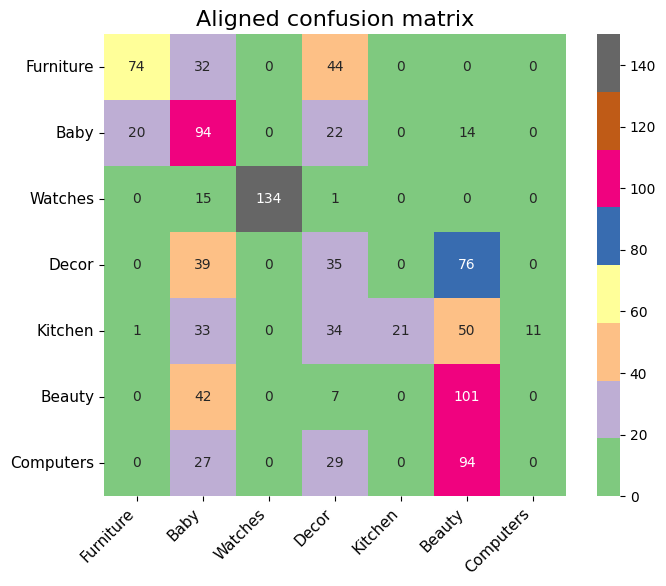

 ARI : 0.21884203291921556
              precision    recall  f1-score   support

   Furniture       0.44      0.79      0.57       150
        Baby       0.33      0.63      0.44       150
     Watches       1.00      0.89      0.94       150
       Decor       0.00      0.00      0.00       150
     Kitchen       1.00      0.21      0.35       150
      Beauty       0.30      0.67      0.42       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.46      1050
   macro avg       0.44      0.46      0.39      1050
weighted avg       0.44      0.46      0.39      1050

Clustering on description BoW


In [261]:
title='BoW'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on description '+title)

## Clustering on text statistics as baseline

cluster  effectives
Category                      
Furniture        5          68
Baby             6           2
Watches          0         228
Decor            3          51
Kitchen          2         126
Beauty           4         557
Computers        1          18

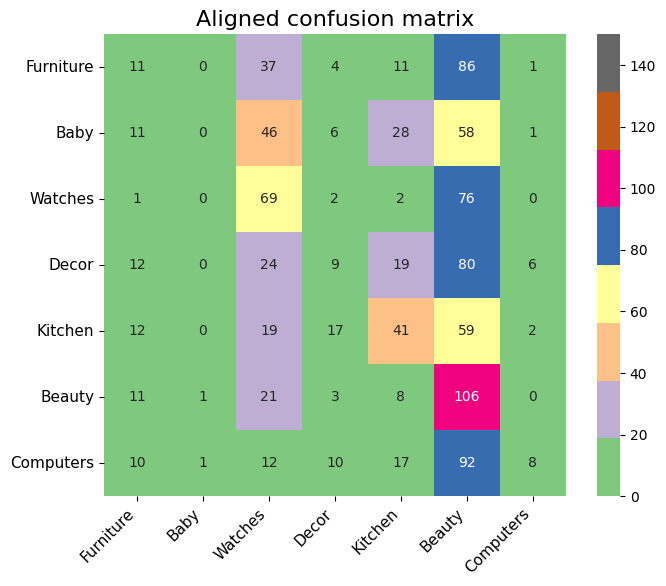

 ARI : 0.022712742133757596
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.00      0.00      0.00       150
     Watches       0.30      0.46      0.37       150
       Decor       0.18      0.08      0.11       150
     Kitchen       0.33      0.39      0.35       150
      Beauty       0.19      0.71      0.30       150
   Computers       0.44      0.05      0.10       150

    accuracy                           0.24      1050
   macro avg       0.21      0.24      0.18      1050
weighted avg       0.21      0.24      0.18      1050

Clustering on description Text statistics


In [262]:
# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans0 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(text_stats(data.description))
    # Assign clusters
labels=kmeans0.labels_

title='Text statistics'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on description '+title)

The poor ARI and confusion matrix results shows that using only the words stats give worse resultats than using countvectorizer (BoW) method.

## Text encoding Strategies

The next steps will be about changing words weights using different methods.

### countvectorizer + tfidf

TF-IDF (Term Frequency-Inverse Document Frequency) weights words based on their specificity to documents. It emphasizes distinctive terms while reducing the importance of commonly occurring words across the corpus.\
This technique helps identify characteristic vocabulary for each document category, improving clustering and classification by focusing on truly discriminative features rather than generic terms.





In [263]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(count_vector_prod)
data_tfidf = tf_transformer.transform(count_vector_prod)

In [264]:
type(data_tfidf)

scipy.sparse._csr.csr_matrix

Sparse matrix, densify it for interpretability and saving dataframe.

In [265]:
data_tfidf=data_tfidf.toarray()

In [266]:
data_tfidf.shape

(1050, 4595)

In [267]:
tok=pd.DataFrame(data_tfidf,columns=[ 'T'+str(i) for i in range(data_tfidf.shape[1])])

joblib.dump(tok, 'FEAT_TFIDF_DESCRIPTION')

tok

T0   T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  T11  T12  \
0     0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1045  0.129611  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1046  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1047  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1048  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1049  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      T13  T14  T15  T16       T17       T18  T19  T20  T21  T22  T23  T24  \
0     0.0  0.0  0.0  0.0  0.000000  0.079463  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.136132  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...       ...       ...  ...  ...  ...  ...  ...  ...   
1045  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
1046  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
1047  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
1048  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
1049  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   

      ...  T4570  T4571  T4572  T4573  T4574  T4575  T4576  T4577  T4578  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1045  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1046  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1047  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1048  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1049  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      T4579  T4580  T4581  T4582  T4583  T4584  T4585  T4586  T4587  T4588  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1045    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1046    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1047    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1048    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      T4589  T4590  T4591  T4592  T4593  T4594  
0       0.0    0.0    0.0    0.0    0.0    0.0  
1       0.0    0.0    0.0    0.0    0.0    0.0  
2       0.0    0.0    0.0    0.0    0.0    0.0  
3       0.0    0.0    0.0    0.0    0.0    0.0  
4       0.0    0.0    0.0    0.0    0.0    

In [268]:
# Supposons que df_transposed est le résultat de votre commande
df_transposed = tok.loc[index,['T'+str(i) for i in preprocessed_text_bow_matches.values()]].T

# Initialisation du dictionnaire avec index et valeurs
my_dict = {idx: round(float(val[0]),4) for idx, val in zip(df_transposed.index, df_transposed.values)}

# Afficher le dictionnaire
print(my_dict)

{'T300': 0.2623, 'T320': 0.1774, 'T468': 0.0878, 'T512': 0.1589, 'T617': 0.1468, 'T809': 0.2122, 'T855': 0.1872, 'T1002': 0.1726, 'T1665': 0.0832, 'T1693': 0.1221, 'T1883': 0.2292, 'T1960': 0.1076, 'T2548': 0.2623, 'T2652': 0.2623, 'T2842': 0.1895, 'T3015': 0.1569, 'T3112': 0.2477, 'T3237': 0.1741, 'T3446': 0.2623, 'T3604': 0.1622, 'T3630': 0.2623, 'T3693': 0.2623, 'T3806': 0.1076, 'T4082': 0.2171, 'T4181': 0.1611, 'T4242': 0.0897, 'T4509': 0.1296, 'T4564': 0.1319}


cluster  effectives
Category                      
Furniture        5          94
Baby             4         181
Watches          3         133
Decor            6         183
Kitchen          1          44
Beauty           0         152
Computers        2         263

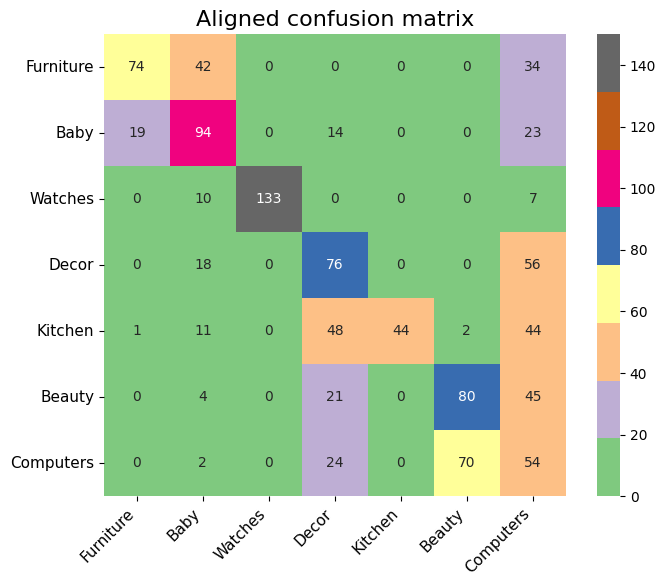

 ARI : 0.2867203680217476
              precision    recall  f1-score   support

   Furniture       0.79      0.49      0.61       150
        Baby       0.52      0.63      0.57       150
     Watches       1.00      0.89      0.94       150
       Decor       0.30      0.88      0.44       150
     Kitchen       1.00      0.29      0.45       150
      Beauty       0.53      0.53      0.53       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.53      1050
   macro avg       0.59      0.53      0.51      1050
weighted avg       0.59      0.53      0.51      1050

Clustering on BoW + TFiDF


In [269]:
# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans1 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok)
    # Assign clusters
labels=kmeans1.labels_

title='BoW + TFiDF'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

In [270]:
# Check if the results are the same with a sparse matrix

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans1 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(data_tfidf)
    # Assign clusters
labels=kmeans1.labels_
for i in range(0,7):
    print('Cluster {} values count : {}'.format(i, np.count_nonzero(labels == i)))
print(' ARI : {}'.format(adjusted_rand_score(data.cat_code,labels)))


Cluster 0 values count : 152
Cluster 1 values count : 44
Cluster 2 values count : 263
Cluster 3 values count : 133
Cluster 4 values count : 181
Cluster 5 values count : 94
Cluster 6 values count : 183
 ARI : 0.2867203680217476


Same result with sparse matrix.



### countvectorizer + LDA

Unlike TF-IDF which represents documents by the relative importance of words, LDA (Latent Dirichlet Allocation) takes a thematic approach. This probabilistic generative model decomposes each document into a mixture of latent topics and each topic into a distribution of words. It captures the hidden semantic structure of documents by automatically identifying recurring themes and their associations. In our product description context, LDA can reveal more abstract conceptual groupings beyond simple keywords, potentially aligned with product categories.\
LDA is a pure statistic algorithm and does not use LLM.

cluster  effectives
Category                      
Furniture        0          62
Baby             4          92
Watches          5         139
Decor            1         187
Kitchen          6         287
Beauty           3          90
Computers        2         193

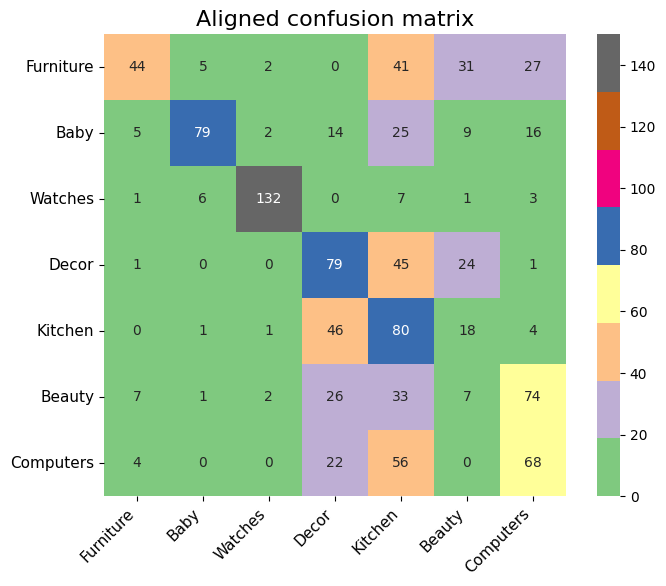

 ARI : 0.23803897638927776
              precision    recall  f1-score   support

   Furniture       0.49      0.50      0.50       150
        Baby       0.86      0.53      0.65       150
     Watches       0.95      0.88      0.91       150
       Decor       0.42      0.53      0.47       150
     Kitchen       0.28      0.53      0.37       150
      Beauty       0.38      0.49      0.43       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.49      1050
   macro avg       0.48      0.49      0.48      1050
weighted avg       0.48      0.49      0.48      1050

Clustering on BoW + LatentDirichletAllocation
Clustering on BoW + LatentDirichletAllocation


In [271]:
from sklearn.decomposition import LatentDirichletAllocation
tok_lda = LatentDirichletAllocation(n_components=30,random_state=42,n_jobs=-1).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_lda)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + LatentDirichletAllocation'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)
print('Clustering on BoW + LatentDirichletAllocation' )


In [272]:
tok_lda[index][0]

array([0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.32206701,
       0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
       0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
       0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
       0.00114943, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
       0.00114943, 0.00114943, 0.00114943, 0.64574908, 0.00114943])

Best result obtained with LDA ncomponents=8. (Near from the number of categories)\
LDA is more suitable for long texts corpora so it explains the worse result.

## Projections

Essential Differences Between Dimensionality Reduction Techniques

Understanding the key differences between various dimensionality reduction techniques helps in selecting the most appropriate method for specific data and objectives:

1. **Global vs. Local Structure Preservation**

PCA and MDS: Preserve global relationships (distances/variances) between all pairs of data points
t-SNE and UMAP: Focus more on preserving local neighborhood structures
SpectralEmbedding: Balances local connectivity with global structure

2. **Linear vs. Non-linear Approaches**

PCA and classical MDS: Linear methods that work best with linearly correlated data
t-SNE, UMAP, SpectralEmbedding: Non-linear methods capable of capturing complex relationships and manifolds

3. **Stability and Determinism**

PCA: Completely deterministic, producing identical results on each run
t-SNE and UMAP: Stochastic behavior with slightly different results on each execution
MDS: Deterministic in its classical form, but some variants may have stochastic components

4. **Speed and Scalability**

PCA: Very fast even on large datasets, highly scalable
t-SNE: Slower with scaling issues on larger datasets (>10K samples)
UMAP: Faster than t-SNE while maintaining comparable quality
MDS: Computationally intensive for large datasets due to pairwise distance calculations
SpectralEmbedding: Moderate scalability, faster than t-SNE but slower than PCA

5. **Purpose and Primary Applications**

PCA: Dimension reduction, noise reduction, feature engineering, simple visualization
t-SNE: Primarily for visualization of clusters and complex relationships
UMAP: Visualization and general-purpose dimensionality reduction with better preservation of global structure than t-SNE
MDS: Distance-preserving visualization, especially useful when distances have meaningful interpretation
SpectralEmbedding: Identification of connectivity-based structures and communities

6. **Information Retention**

PCA: Provides clear metrics on variance explained per component
t-SNE: Prioritizes local structure at the expense of global relationships
UMAP: Better balance between local and global structure than t-SNE
MDS: Focuses on preserving original distances in the reduced space
SpectralEmbedding: Preserves spectral properties of the similarity graph

7. **Parameter Sensitivity**

PCA: Minimal parameters (primarily number of components)
t-SNE: Highly sensitive to perplexity parameter
UMAP: Multiple parameters (n_neighbors, min_dist) but generally more robust than t-SNE
SpectralEmbedding: Sensitive to the choice of affinity metric and number of neighbors

The choice of method depends on your specific objective, the nature of your data, and the trade-off you're willing to make between global and local fidelity of the projection.

### PCA

* **Linear space transformation**: PCA projects data into a new coordinate system defined by orthogonal directions of maximum variance
* **Dimensionality optimization**: Reduces feature redundancy by identifying and preserving only the most informative dimensions
* **Noise reduction effect**: Lower-ranked components often capture noise, so eliminating them increases signal-to-noise ratio
* **Global pattern prioritization**: Emphasizes broad patterns that explain the largest sources of variation across documents
* **Feature correlation resolution**: Addresses multicollinearity by creating uncorrelated components from correlated original features
* **Variance-based information retention**: Provides clear metrics on how much information (variance) is preserved in the reduced space

Overall, PCA gives quite the same (weak) ARI scores for both encoding strategies.

#### countvectorizer + PCA

cluster  effectives
Category                      
Furniture        1         143
Baby             2         133
Watches          5         134
Decor            6          62
Kitchen          3          46
Beauty           4         102
Computers        0         430

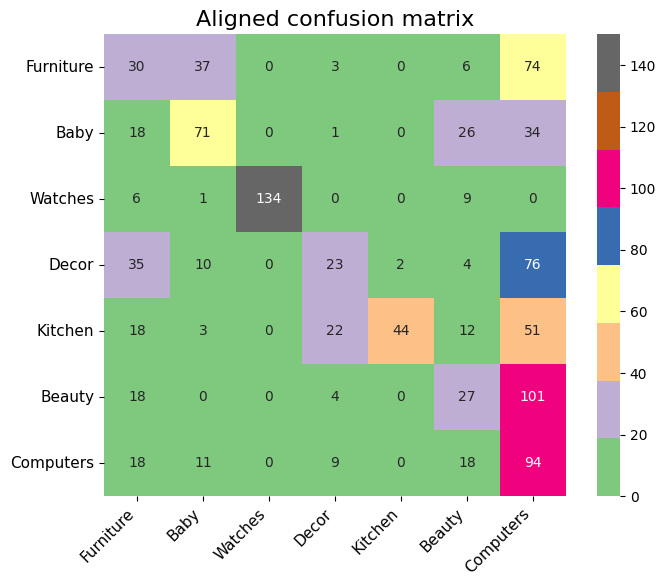

 ARI : 0.17479247629518957
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.53      0.47      0.50       150
     Watches       1.00      0.89      0.94       150
       Decor       0.28      0.39      0.33       150
     Kitchen       0.96      0.29      0.45       150
      Beauty       0.24      0.85      0.38       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.41      1050
   macro avg       0.43      0.41      0.37      1050
weighted avg       0.43      0.41      0.37      1050

Clustering on BoW + PCA (2 components, 19.28% explained variance)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create full PCA model to calculate explained variance
pca_full = PCA(random_state=42)
pca_full.fit(count_vector_prod)

# Calculate cumulative variance explained by the first 2 components
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
variance_2_components = cumulative_variance[1] * 100

# Apply PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
bow_pca = pca.fit_transform(count_vector_prod)

# K-Means clustering on reduced data
kmeans2 = KMeans(n_clusters=len(dico), random_state=42, n_init=30).fit(bow_pca)
labels = kmeans2.labels_

# Title including explained variance
title = f'BoW + PCA (2 components, {variance_2_components:.2f}% explained variance)'

# Evaluate and store metrics results
append_dict(results_1, {
    'title': title,
    'metrics': clustering_evaluate(labels, data.cat_code, cat['category'])
})

# Display clustering results
print(f'Clustering on {title}')


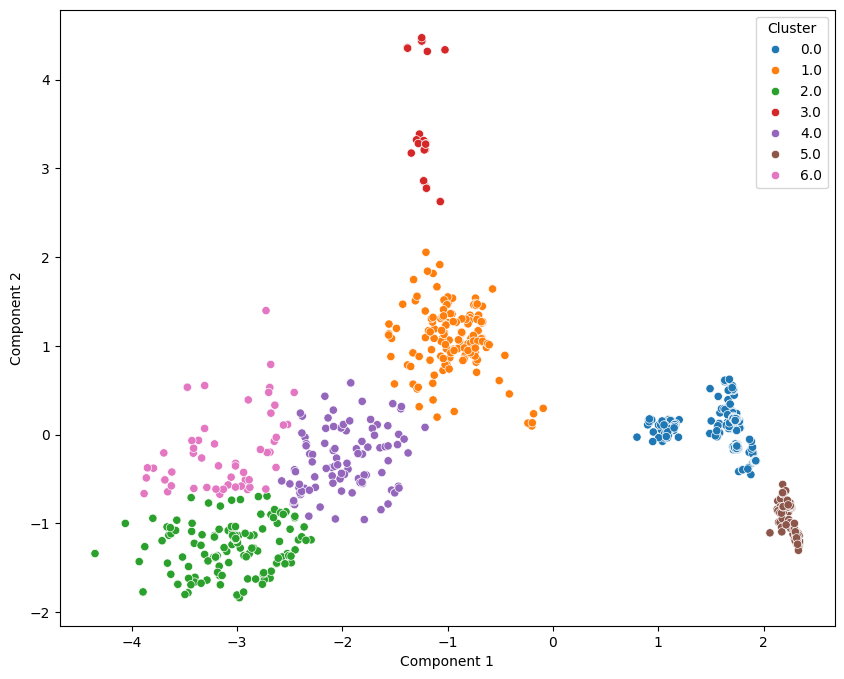

<Figure size 1000x800 with 0 Axes>

In [ ]:
# 2D scatterplot
def plot_clusters(reduced,labels):
    data=pd.DataFrame(np.c_[reduced,labels],columns=['Component 1','Component 2','Cluster'])

    plt.figure(figsize=(10,8))
    sns.scatterplot(data=data,
                    x='Component 1',
                    y='Component 2',
                    hue='Cluster',
                    palette=sns.color_palette('tab10', n_colors=7))
    plt.title(f'')
    plt.figure(figsize=(10,8))


plot_clusters(bow_pca,labels)

#### countvectorizer + tfidf + PCA

cluster  effectives
Category                      
Furniture        3         252
Baby             4         211
Watches          2          88
Decor            0         179
Kitchen          1         263
Beauty           5          12
Computers        6          45

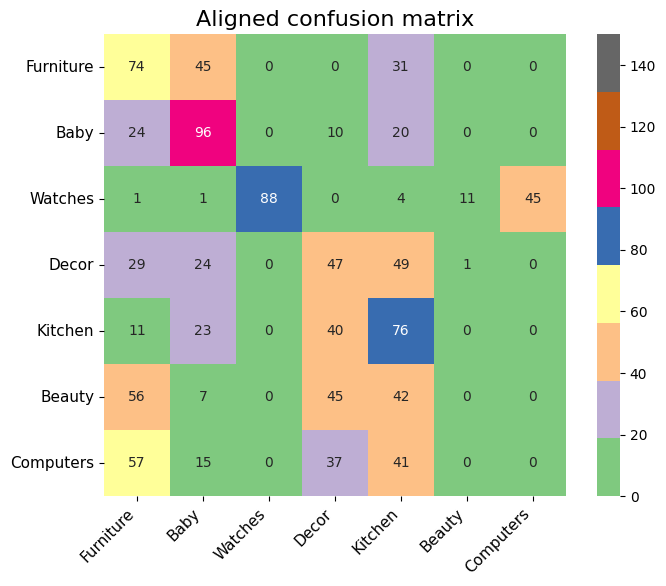

 ARI : 0.15474133741461255
              precision    recall  f1-score   support

   Furniture       0.29      0.49      0.37       150
        Baby       0.45      0.64      0.53       150
     Watches       0.99      0.96      0.98       150
       Decor       0.26      0.31      0.29       150
     Kitchen       0.29      0.51      0.37       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.42      1050
   macro avg       0.33      0.42      0.36      1050
weighted avg       0.33      0.42      0.36      1050

Clustering on BoW + TFiDF + PCA (2 components, 8.92% explained variance)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create full PCA model to calculate explained variance
pca_full = PCA(random_state=42)
pca_full.fit(tok)

# Calculate cumulative variance explained by the first 2 components
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
variance_2_components = cumulative_variance[1] * 100

# Apply PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
tok_pca = pca.fit_transform(tok)

# K-Means clustering on reduced data
kmeans2 = KMeans(n_clusters=len(dico), random_state=42, n_init=30).fit(tok_pca)
labels = kmeans2.labels_

# Title including explained variance
title = f'BoW + TFiDF + PCA (2 components, {variance_2_components:.2f}% explained variance)'

# Evaluate and store metrics results
append_dict(results_1, {
    'title': title,
    'metrics': clustering_evaluate(labels, data.cat_code, cat['category'])
})

# Display clustering results
print(f'Clustering on {title}')


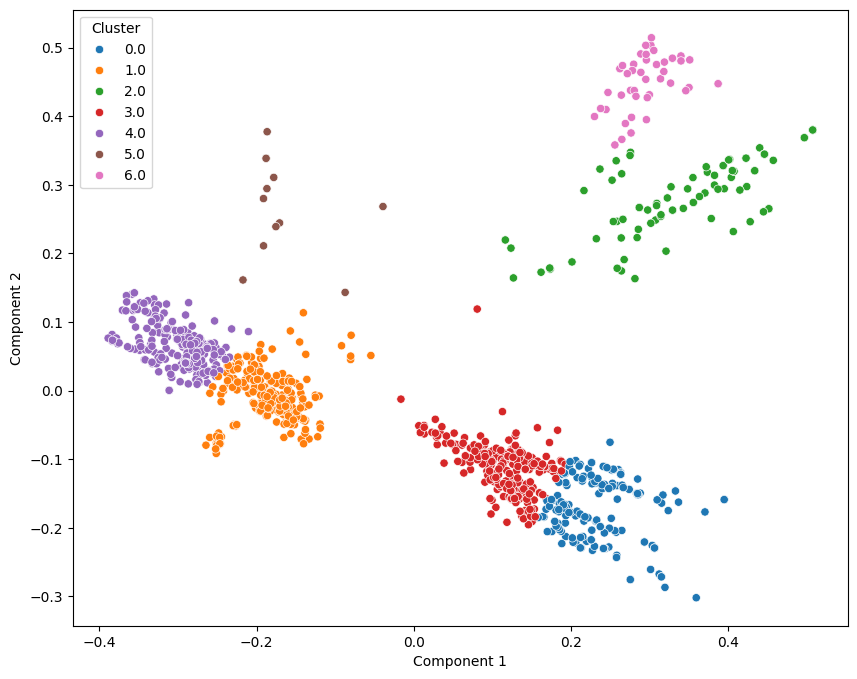

<Figure size 1000x800 with 0 Axes>

In [ ]:
plot_clusters(tok_pca,labels)

#### countvectorizer + LDA + PCA

cluster  effectives
Category                      
Furniture        2          88
Baby             0         491
Watches          3         135
Decor            1         137
Kitchen          5          53
Beauty           6          28
Computers        4         118

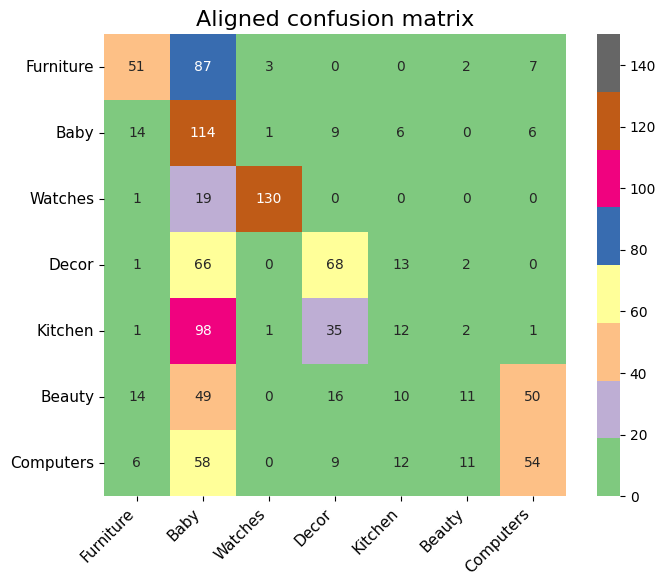

 ARI : 0.15675097142700645
              precision    recall  f1-score   support

   Furniture       0.58      0.34      0.43       150
        Baby       0.23      0.76      0.36       150
     Watches       0.96      0.87      0.91       150
       Decor       0.43      0.54      0.48       150
     Kitchen       0.00      0.00      0.00       150
      Beauty       0.39      0.07      0.12       150
   Computers       0.46      0.36      0.40       150

    accuracy                           0.42      1050
   macro avg       0.44      0.42      0.39      1050
weighted avg       0.44      0.42      0.39      1050

Clustering on BoW + LDA + PCA (2 components, 36.23% explained variance)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create full PCA model to calculate explained variance
pca_full = PCA(random_state=42)
pca_full.fit(tok_lda)

# Calculate cumulative variance explained by the first 2 components
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
variance_2_components = cumulative_variance[1] * 100

# Apply PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
tok_pca = pca.fit_transform(tok_lda)

# K-Means clustering on reduced data
kmeans2 = KMeans(n_clusters=len(dico), random_state=42, n_init=30).fit(tok_pca)
labels = kmeans2.labels_

# Title including explained variance
title = f'BoW + LDA + PCA (2 components, {variance_2_components:.2f}% explained variance)'

# Evaluate and store metrics results
append_dict(results_1, {
    'title': title,
    'metrics': clustering_evaluate(labels, data.cat_code, cat['category'])
})

# Display clustering results
print(f'Clustering on {title}')


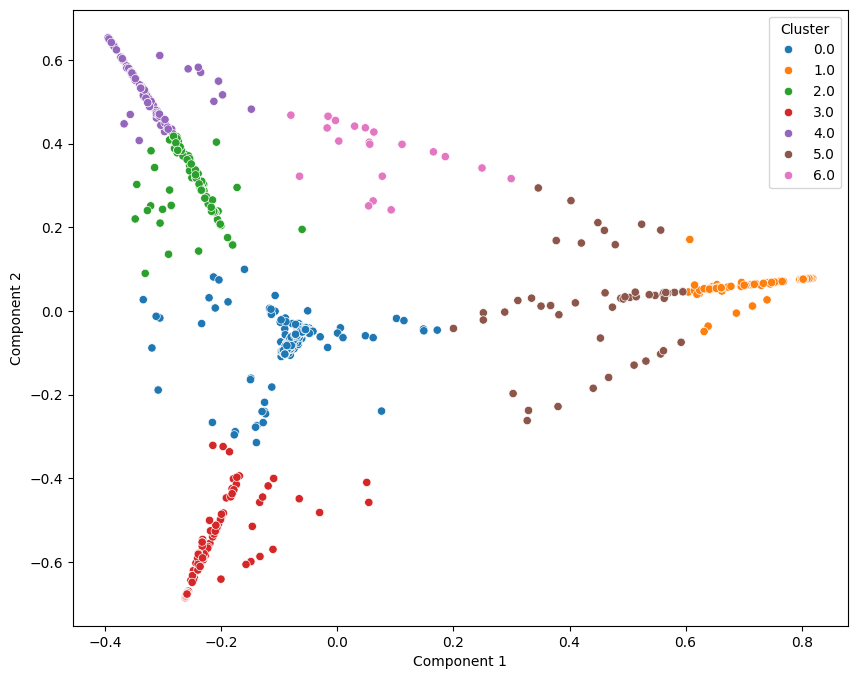

<Figure size 1000x800 with 0 Axes>

In [ ]:
plot_clusters(tok_pca,labels)

### TSNE

* **Optimized spatial reorganization**: t-SNE transforms the vector space by preserving local similarities while amplifying differences between distinct groups
* **Curse of dimensionality mitigation**: Addresses the "curse of dimensionality" problem that affects high-dimensional TF-IDF vectors, where distance metrics become less meaningful
* **Adaptation to textual complexity**: Unlike linear methods, t-SNE adapts to complex and non-linear structures present in textual data
* **Dimensional noise elimination**: Reduction to 2D eliminates non-relevant dimensions that hindered K-means performance in the original sparse vector space
* **Enhancement of natural boundaries**: The transformation accentuates natural separations between categories, considerably facilitating the clustering algorithm's task

It is interesting to see that using TSNE projection helps having a better ARI for all strategies. The one that benefits the most from t-SNE is Bow + TFiDF

#### countvectorizer + TSNE

cluster  effectives
Category                      
Furniture        5         223
Baby             1         106
Watches          2         134
Decor            0         187
Kitchen          6          62
Beauty           3         177
Computers        4         161

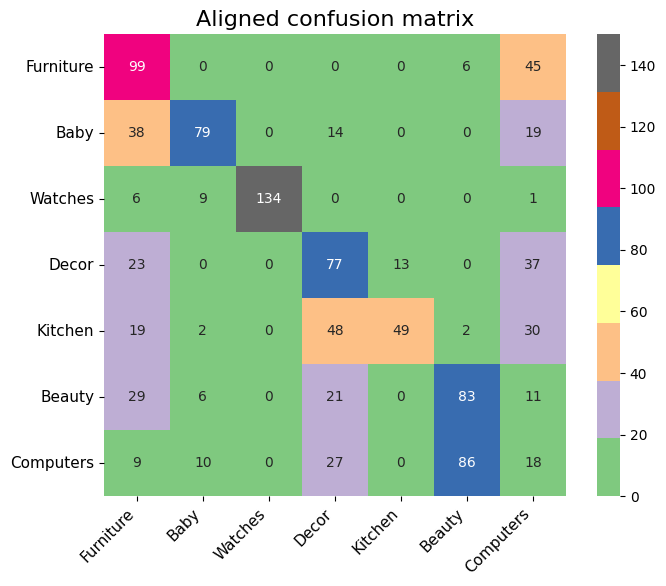

 ARI : 0.30857368070278396
              precision    recall  f1-score   support

   Furniture       0.38      0.96      0.54       150
        Baby       0.75      0.53      0.62       150
     Watches       1.00      0.89      0.94       150
       Decor       0.41      0.51      0.46       150
     Kitchen       0.79      0.33      0.46       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.49      0.57      0.53       150

    accuracy                           0.54      1050
   macro avg       0.54      0.54      0.51      1050
weighted avg       0.54      0.54      0.51      1050

Clustering on BoW + T-SNE 2 components


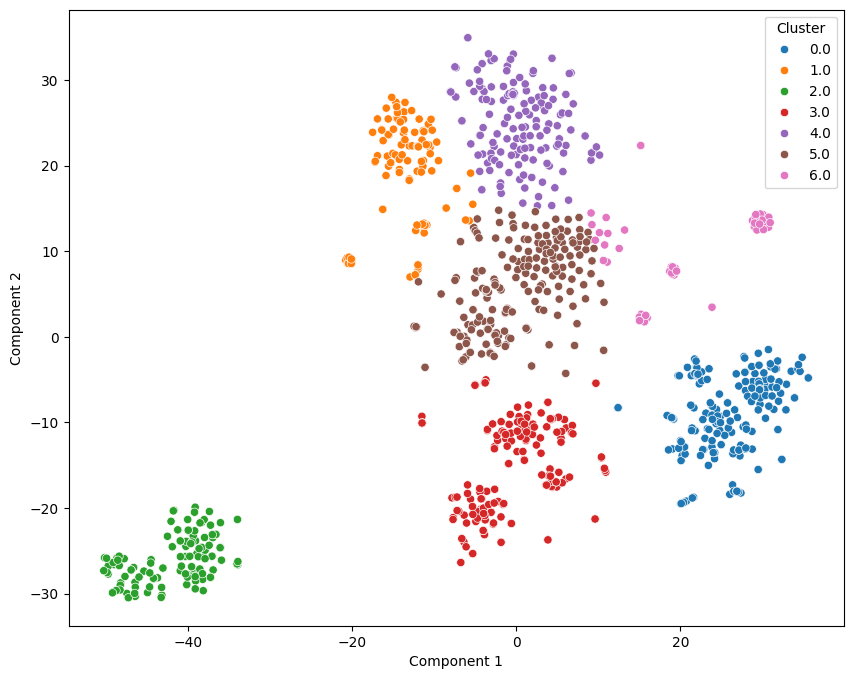

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
# tok variable comes from the countvectorizer + tfidf section
bow_tsne = TSNE(n_components=2,
                perplexity=50,
                early_exaggeration=12.0,
                learning_rate=200.0,
                max_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='random',   # pca
                verbose=0,
                random_state=42,
                method='barnes_hut',   # exact
                angle=0.2,
                n_jobs=-1
               ).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_tsne)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + T-SNE 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_tsne,labels)

#### countvectorizer + tfidf+TSNE

cluster  effectives
Category                      
Furniture        2         123
Baby             3         140
Watches          4         145
Decor            5         211
Kitchen          0          90
Beauty           1         153
Computers        6         188

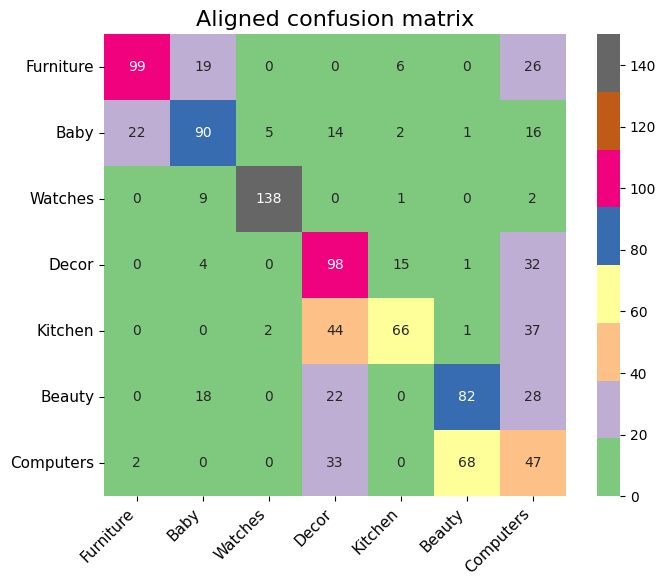

 ARI : 0.3574253411469525
              precision    recall  f1-score   support

   Furniture       0.80      0.66      0.73       150
        Baby       0.64      0.60      0.62       150
     Watches       0.95      0.92      0.94       150
       Decor       0.46      0.65      0.54       150
     Kitchen       0.73      0.44      0.55       150
      Beauty       0.54      0.55      0.54       150
   Computers       0.25      0.31      0.28       150

    accuracy                           0.59      1050
   macro avg       0.63      0.59      0.60      1050
weighted avg       0.63      0.59      0.60      1050

Clustering sur BoW + TFiDF + T-SNE 2 components


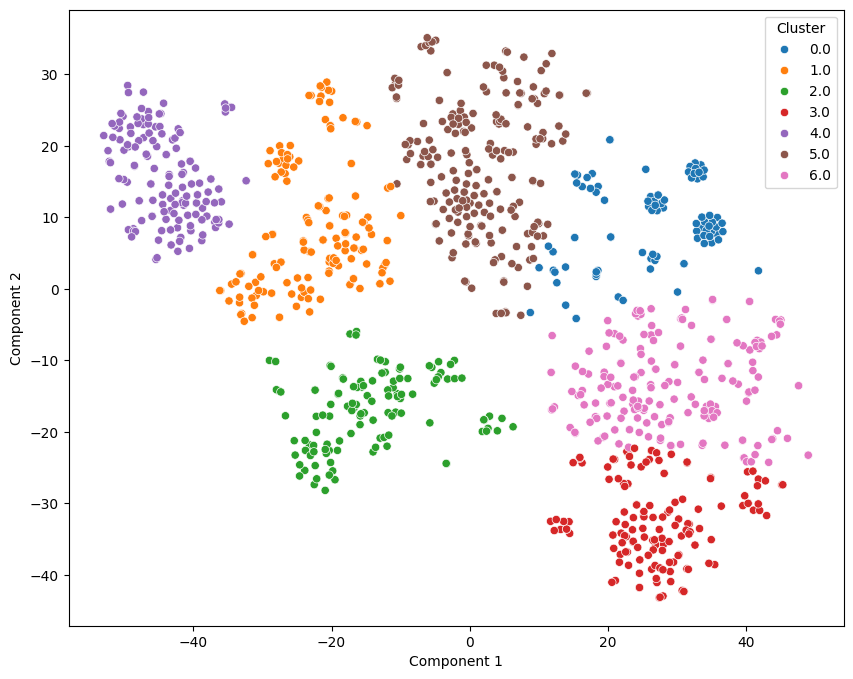

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
# tok variable comes from the countvectorizer + tfidf section
tok_tsne = TSNE(n_components=2,
                perplexity=50,
                early_exaggeration=12.0,
                learning_rate=200.0,
                max_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='random',   # pca
                verbose=0,
                random_state=42,
                method='barnes_hut',   # exact
                angle=0.2,
                n_jobs=-1
               ).fit_transform(tok)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_tsne)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + TFiDF + T-SNE 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_tsne,labels)

#### countvectorizer + LDA +TSNE

cluster  effectives
Category                      
Furniture        1         116
Baby             4         136
Watches          0         142
Decor            2         186
Kitchen          3         152
Beauty           6         166
Computers        5         152

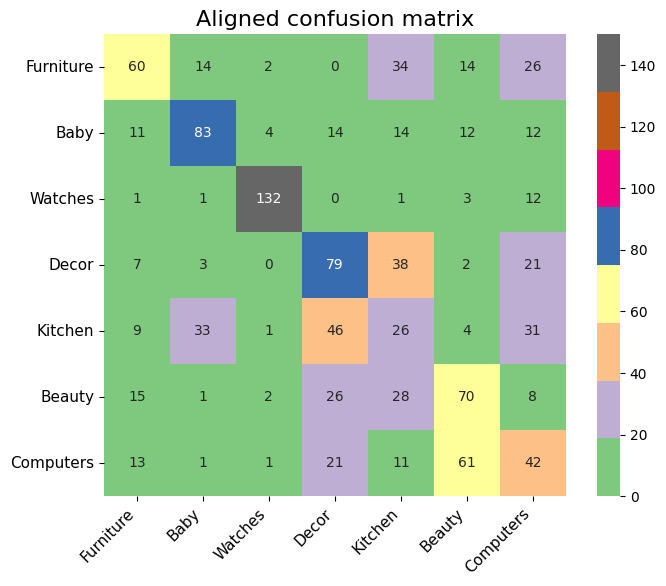

 ARI : 0.24701273557154663
              precision    recall  f1-score   support

   Furniture       0.52      0.40      0.45       150
        Baby       0.61      0.55      0.58       150
     Watches       0.93      0.88      0.90       150
       Decor       0.35      0.78      0.48       150
     Kitchen       0.00      0.00      0.00       150
      Beauty       0.42      0.47      0.44       150
   Computers       0.28      0.28      0.28       150

    accuracy                           0.48      1050
   macro avg       0.44      0.48      0.45      1050
weighted avg       0.44      0.48      0.45      1050

Clustering sur BoW + LDA + T-SNE 2 components


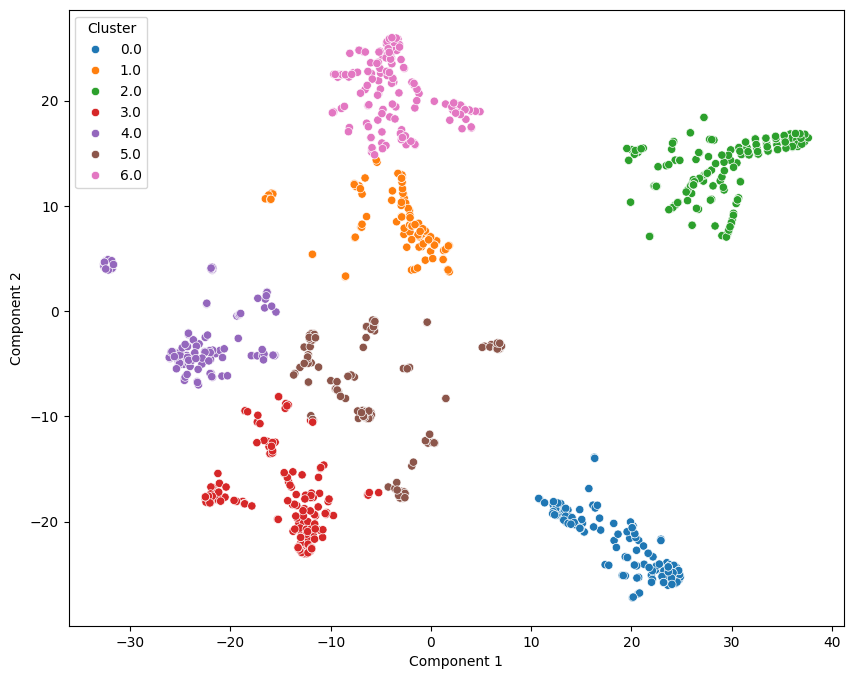

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
# tok variable comes from the countvectorizer + tfidf section
tok_tsne = TSNE(n_components=2,
                perplexity=50,
                early_exaggeration=12.0,
                learning_rate=200.0,
                max_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='random',   # pca
                verbose=0,
                random_state=42,
                method='barnes_hut',   # exact
                angle=0.2,
                n_jobs=-1
               ).fit_transform(tok_lda)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_tsne)
    # Assign clusters
labels=kmeans2.labels_

title='BoW + LDA + T-SNE 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_tsne,labels)

### MDS

* **Distance preservation focus**: Maintains pairwise distances between documents in lower-dimensional space
* **Global relationship retention**: Preserves overall structure of document relationships
* **Similarity visualization**: Transforms abstract similarities into interpretable spatial relationships
* **Stress minimization**: Optimizes projection by minimizing distortion in distance representation
* **Metric integrity**: Provides faithful representation of original document dissimilarities
* **Euclidean interpretation**: Projected distances correspond meaningfully to original feature differences

Interesting to see that the MDS projection did not bring any improvement (worsened the ARI score for BoW + TFiDF and BoW + LDA. BoW only ARI score did not change).

#### countvectorizer + MDS

cluster  effectives
Category                      
Furniture        2         137
Baby             6         141
Watches          3         157
Decor            4         191
Kitchen          1          82
Beauty           0         251
Computers        5          91

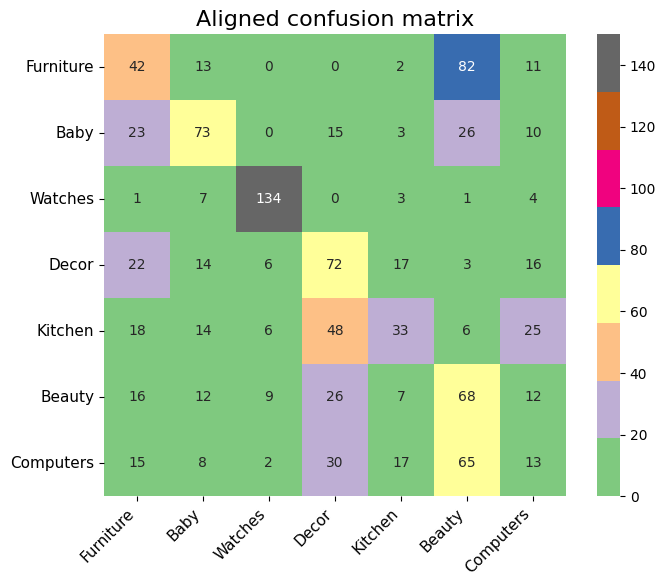

 ARI : 0.2151568193621565
              precision    recall  f1-score   support

   Furniture       0.32      0.83      0.46       150
        Baby       0.52      0.49      0.50       150
     Watches       0.85      0.89      0.87       150
       Decor       0.38      0.48      0.42       150
     Kitchen       0.34      0.39      0.36       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.44      1050
   macro avg       0.34      0.44      0.37      1050
weighted avg       0.34      0.44      0.37      1050

Clustering on BoW + MDS 2 components


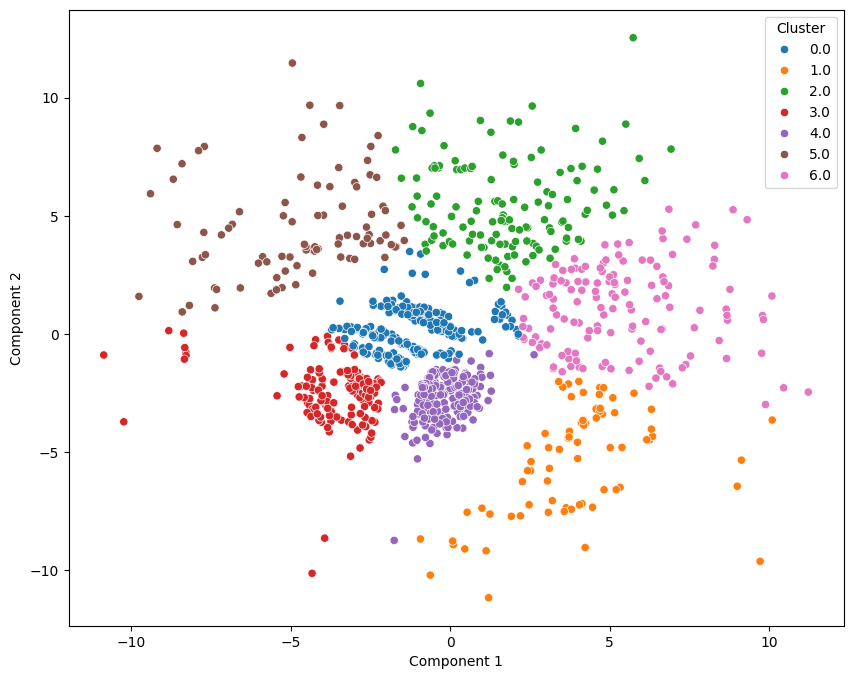

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import MDS
bow_mds = MDS(n_components=2,
              metric=True,
              n_init=4,
              max_iter=300,
              verbose=0,
              eps=0.001,
              n_jobs=-1,
              random_state=42,

             ).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans3 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_mds)
    # Assign clusters
labels=kmeans3.labels_

title='BoW + MDS 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_mds,labels)

#### countvectorizer + tfidf + MDS

cluster  effectives
Category                      
Furniture        5         155
Baby             3         169
Watches          6         169
Decor            1         153
Kitchen          4          88
Beauty           2         173
Computers        0         143

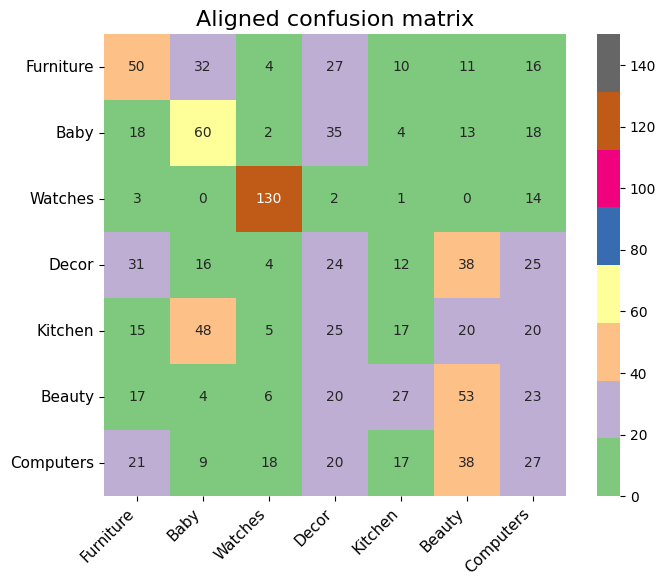

 ARI : 0.1492956405213197
              precision    recall  f1-score   support

   Furniture       0.32      0.33      0.33       150
        Baby       0.30      0.63      0.40       150
     Watches       0.77      0.87      0.82       150
       Decor       0.00      0.00      0.00       150
     Kitchen       0.00      0.00      0.00       150
      Beauty       0.31      0.53      0.39       150
   Computers       0.19      0.18      0.18       150

    accuracy                           0.36      1050
   macro avg       0.27      0.36      0.30      1050
weighted avg       0.27      0.36      0.30      1050

Clustering sur BoW + TFiDF + MDS 2 components


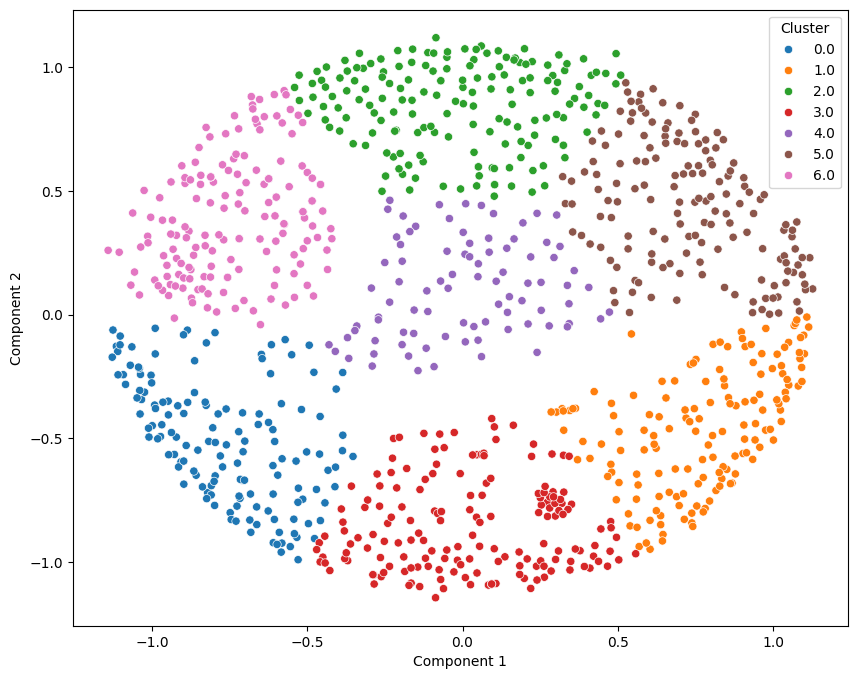

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import MDS
tok_mds = MDS(n_components=2,
              metric=True,
              n_init=4,
              max_iter=300,
              verbose=0,
              eps=0.001,
              n_jobs=-1,
              random_state=42,

             ).fit_transform(tok)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans3 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_mds)
    # Assign clusters
labels=kmeans3.labels_

title='BoW + TFiDF + MDS 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_mds,labels)

#### countvectorizer + LDA + MDS

cluster  effectives
Category                      
Furniture        6         123
Baby             2         122
Watches          3         144
Decor            0         192
Kitchen          5          93
Beauty           4         137
Computers        1         239

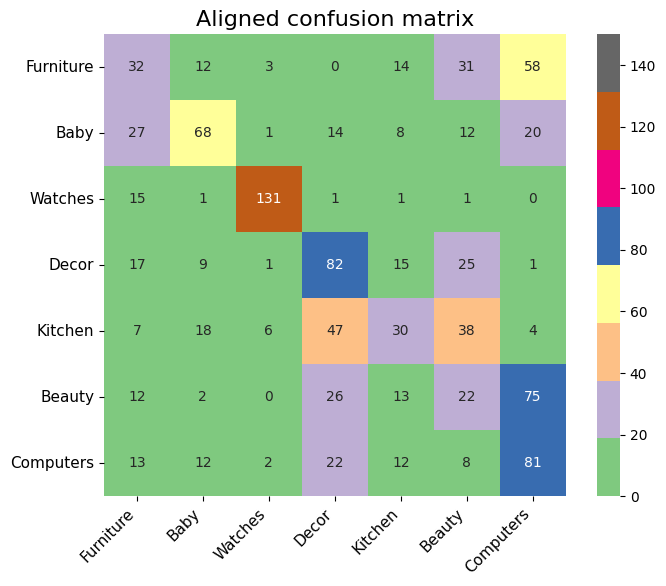

 ARI : 0.225769438809369
              precision    recall  f1-score   support

   Furniture       0.26      0.21      0.23       150
        Baby       0.56      0.45      0.50       150
     Watches       0.91      0.87      0.89       150
       Decor       0.43      0.55      0.48       150
     Kitchen       0.30      0.45      0.36       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.34      0.54      0.42       150

    accuracy                           0.44      1050
   macro avg       0.40      0.44      0.41      1050
weighted avg       0.40      0.44      0.41      1050

Clustering sur BoW + LDA + MDS 2 components


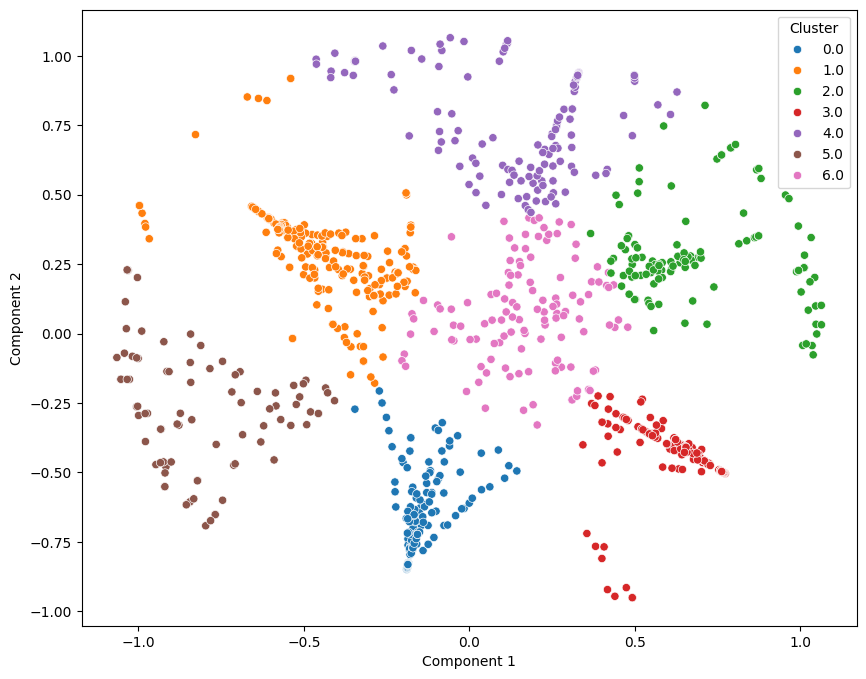

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import MDS
tok_mds = MDS(n_components=2,
              metric=True,
              n_init=4,
              max_iter=300,
              verbose=0,
              eps=0.001,
              n_jobs=-1,
              random_state=42,

             ).fit_transform(tok_lda)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans3 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_mds)
    # Assign clusters
labels=kmeans3.labels_

title='BoW + LDA + MDS 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_mds,labels)

### SpectralEmbedding

* **Graph-based approach**: Leverages connectivity patterns between documents for dimensionality reduction
* **Non-linear manifold learning**: Captures intrinsic geometric structure of the document space
* **Eigenvector foundation**: Uses the most significant eigenvectors of the graph Laplacian matrix
* **Community detection strength**: Excels at revealing natural groupings and thematic communities
* **Connectivity preservation**: Maintains connected components from the high-dimensional space
* **Local-to-global mapping**: Builds global representation from local neighborhood information

Spectral projection did not bring any improvement.

#### countvectorizer + spectral

cluster  effectives
Category                      
Furniture        5          80
Baby             1         444
Watches          0         134
Decor            2         181
Kitchen          3          67
Beauty           6          60
Computers        4          84

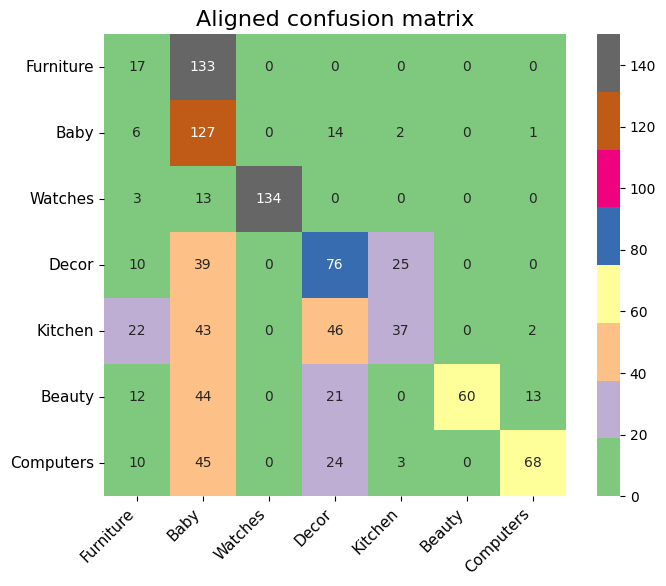

 ARI : 0.23398654671431143
              precision    recall  f1-score   support

   Furniture       0.30      0.89      0.45       150
        Baby       0.00      0.00      0.00       150
     Watches       1.00      0.89      0.94       150
       Decor       0.42      0.51      0.46       150
     Kitchen       0.40      0.39      0.40       150
      Beauty       1.00      0.40      0.57       150
   Computers       0.81      0.45      0.58       150

    accuracy                           0.50      1050
   macro avg       0.56      0.50      0.49      1050
weighted avg       0.56      0.50      0.49      1050

Clustering on BoW + Spectral 2 components


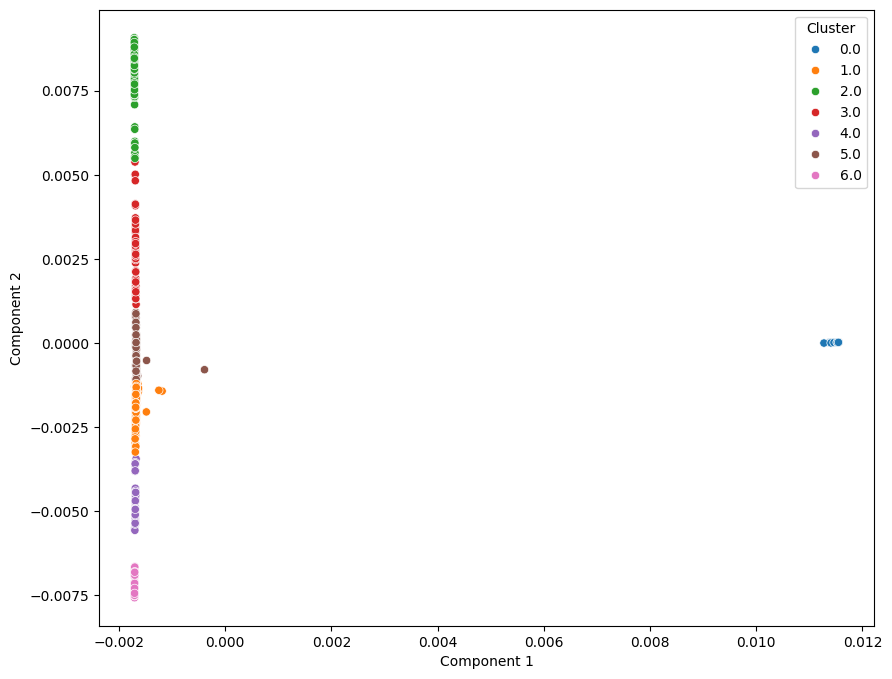

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import SpectralEmbedding
bow_spec = SpectralEmbedding(n_components=2,
                             affinity='nearest_neighbors', # rbf
                             gamma=None,
                             random_state=42,
                             eigen_solver=None, # arpack lobpcg amg
                             n_neighbors=50,
                             n_jobs=-1
                            ).fit_transform(count_vector_prod)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans4 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_spec)
    # Assign clusters
labels=kmeans4.labels_

title='BoW + Spectral 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_spec,labels)

#### countvectorizer + tfidf + spectral

cluster  effectives
Category                      
Furniture        1         226
Baby             4          80
Watches          2         150
Decor            5         260
Kitchen          3         150
Beauty           6          79
Computers        0         105

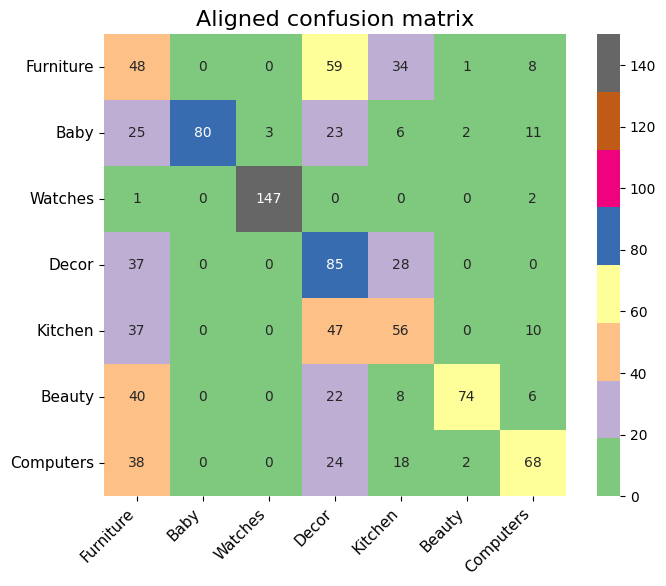

 ARI : 0.27366680066822413
              precision    recall  f1-score   support

   Furniture       0.21      0.32      0.26       150
        Baby       1.00      0.53      0.70       150
     Watches       0.98      0.98      0.98       150
       Decor       0.33      0.57      0.41       150
     Kitchen       0.37      0.37      0.37       150
      Beauty       0.94      0.49      0.65       150
   Computers       0.65      0.45      0.53       150

    accuracy                           0.53      1050
   macro avg       0.64      0.53      0.56      1050
weighted avg       0.64      0.53      0.56      1050

Clustering sur BoW + TFiDF + Spectral 2 components


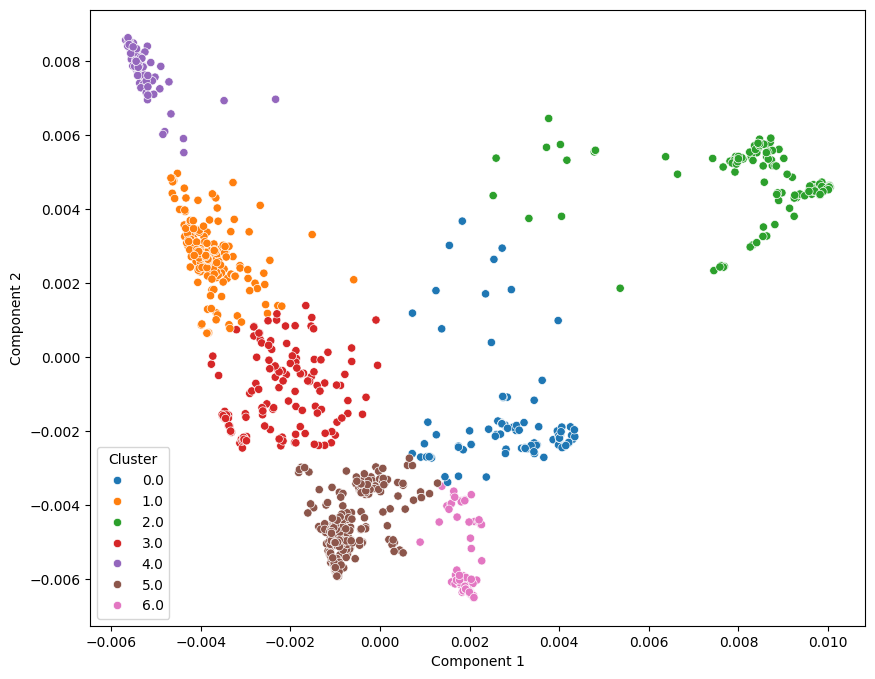

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import SpectralEmbedding
tok_spec = SpectralEmbedding(n_components=2,
                             affinity='nearest_neighbors', # rbf
                             gamma=None,
                             random_state=42,
                             eigen_solver=None, # arpack lobpcg amg
                             n_neighbors=50,
                             n_jobs=-1
                            ).fit_transform(tok)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans4 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_spec)
    # Assign clusters
labels=kmeans4.labels_

title='BoW + TFiDF + Spectral 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_spec,labels)

#### countvectorizer + LDA + spectral

cluster  effectives
Category                      
Furniture        0         410
Baby             4         313
Watches          1          87
Decor            2          79
Kitchen          5          70
Beauty           6          53
Computers        3          38

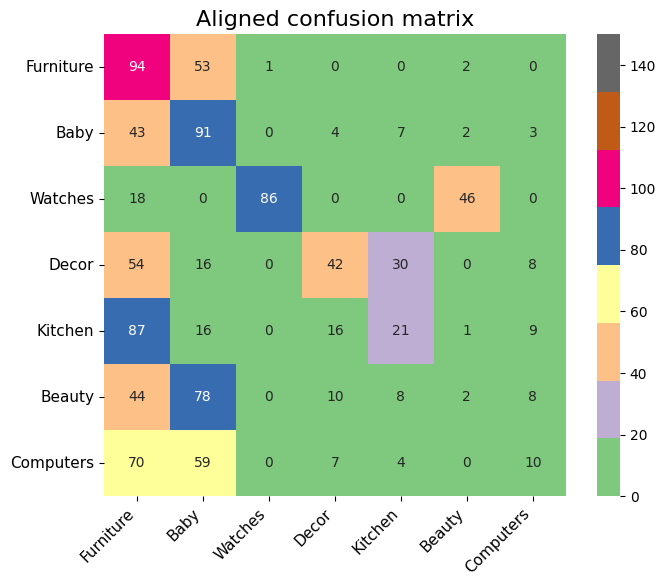

 ARI : 0.11604934478232491
              precision    recall  f1-score   support

   Furniture       0.23      0.63      0.34       150
        Baby       0.29      0.61      0.39       150
     Watches       0.94      0.88      0.91       150
       Decor       0.48      0.48      0.48       150
     Kitchen       0.00      0.00      0.00       150
      Beauty       0.00      0.00      0.00       150
   Computers       0.26      0.07      0.11       150

    accuracy                           0.38      1050
   macro avg       0.32      0.38      0.32      1050
weighted avg       0.32      0.38      0.32      1050

Clustering sur BoW + LDA + Spectral 2 components


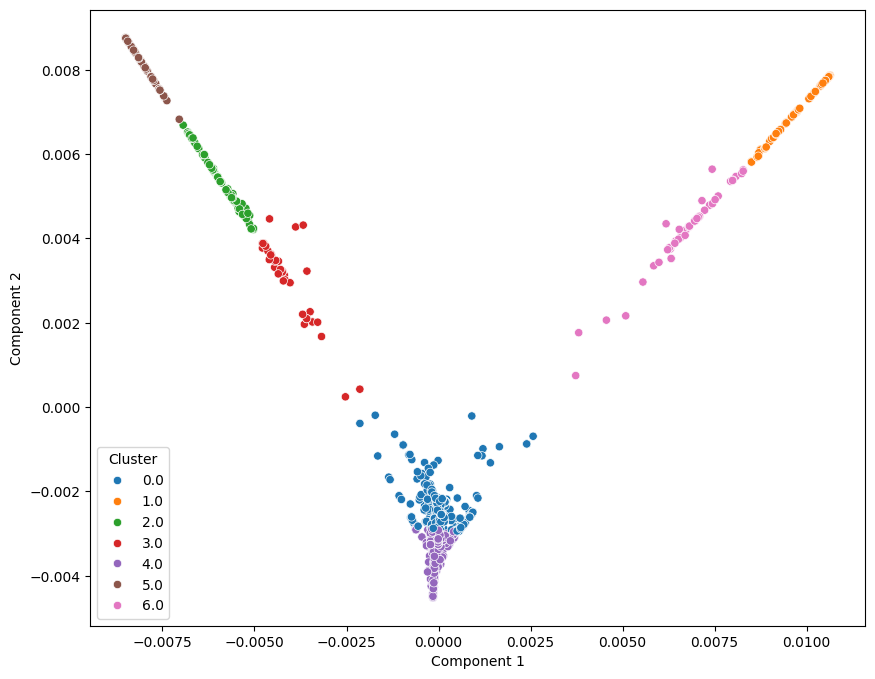

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.manifold import SpectralEmbedding
tok_spec = SpectralEmbedding(n_components=2,
                             affinity='nearest_neighbors', # rbf
                             gamma=None,
                             random_state=42,
                             eigen_solver=None, # arpack lobpcg amg
                             n_neighbors=50,
                             n_jobs=-1
                            ).fit_transform(tok_lda)

# Import KMeans clusterer
from sklearn.cluster import KMeans


kmeans4 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_spec)
    # Assign clusters
labels=kmeans4.labels_

title='BoW + LDA + Spectral 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_spec,labels)

### UMAP

* **Balanced structure preservation**: Maintains both local similarity relationships and global data patterns
* **Topological foundation**: Constructs representation based on manifold topology and fuzzy simplicial sets
* **Computational efficiency**: Delivers t-SNE-like quality with significantly better performance
* **Meaningful distance preservation**: Maintains more of the important distance relationships than t-SNE
* **Theoretical rigor**: Built on stronger mathematical foundations with clearer optimization objectives
* **Cluster separation clarity**: Produces well-defined clusters while preserving their relative positions

On UMAP projection, TFIDF gives better results than LDA. UMAP has improved BoW only and TFiDF and worsened LDA respective ARI scores.

#### countvectorizer + UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster  effectives
Category                      
Furniture        6         267
Baby             1         261
Watches          0         134
Decor            3         184
Kitchen          4          33
Beauty           2         160
Computers        5          11

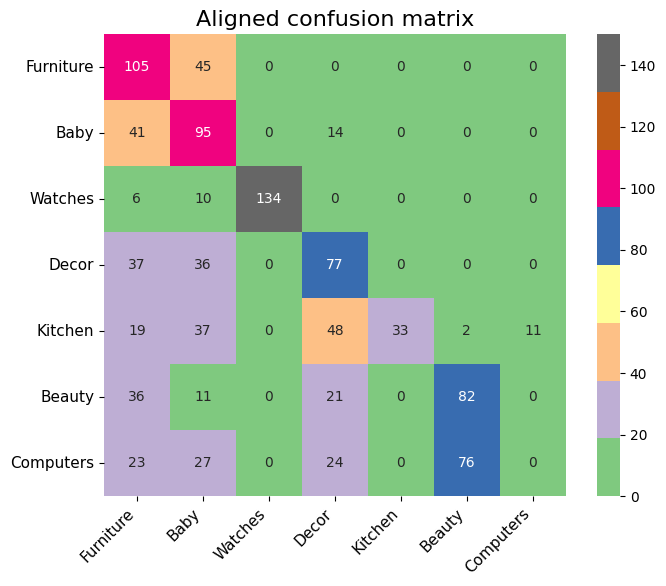

 ARI : 0.2579149072191781
              precision    recall  f1-score   support

   Furniture       0.39      0.70      0.50       150
        Baby       0.36      0.63      0.46       150
     Watches       1.00      0.89      0.94       150
       Decor       0.42      0.51      0.46       150
     Kitchen       1.00      0.29      0.45       150
      Beauty       0.51      0.55      0.53       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.51      1050
   macro avg       0.53      0.51      0.48      1050
weighted avg       0.53      0.51      0.48      1050

Clustering sur BoW + UMAP 2 components


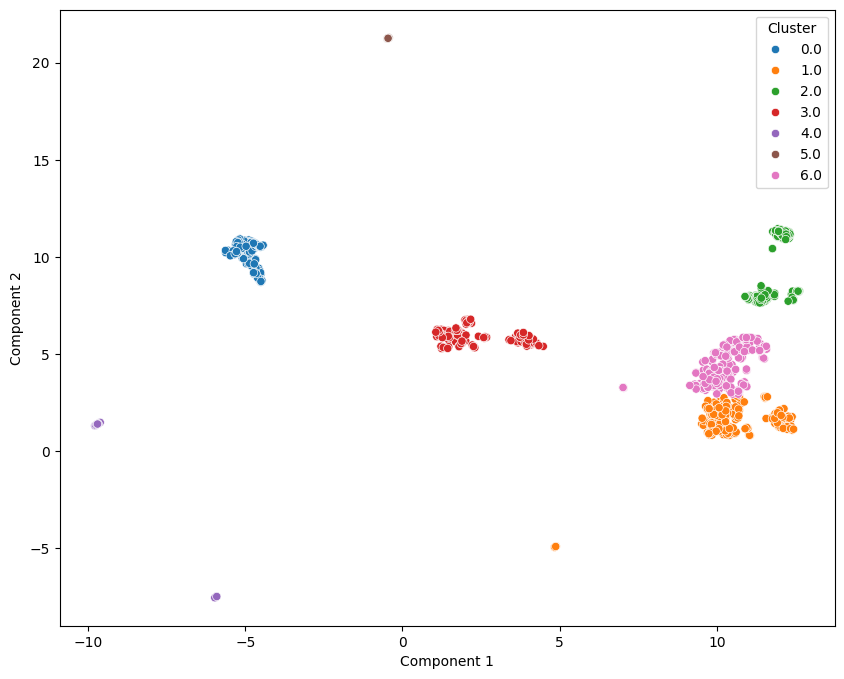

<Figure size 1000x800 with 0 Axes>

In [ ]:
import umap

Umap = umap.UMAP(
                n_neighbors=50,
                min_dist=0.1,
                n_components=2,
                metric='euclidean',
                random_state=42
    )
bow_umap = Umap.fit_transform(count_vector_prod)

kmeans5 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(bow_umap)
    # Assign clusters
labels=kmeans5.labels_

title='BoW + UMAP 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(bow_umap,labels)

#### countvectorizer + tfidf + UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster  effectives
Category                      
Furniture        3         112
Baby             1          97
Watches          6         154
Decor            2         237
Kitchen          5          53
Beauty           0         171
Computers        4         226

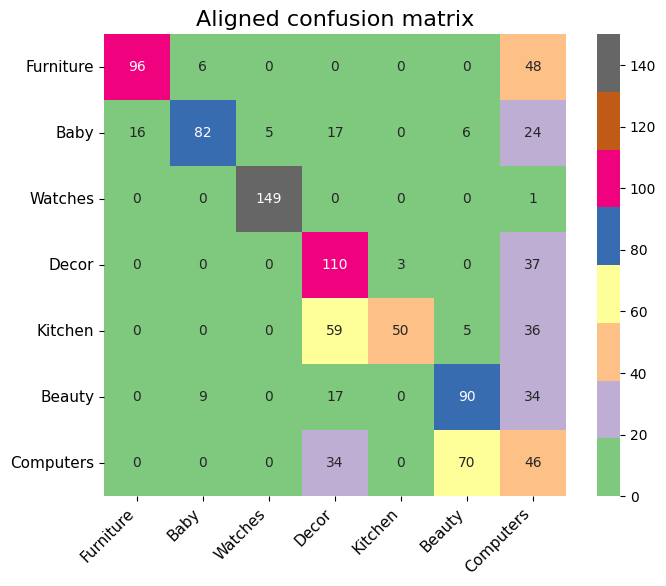

 ARI : 0.36838312263712375
              precision    recall  f1-score   support

   Furniture       0.43      0.96      0.59       150
        Baby       0.85      0.55      0.66       150
     Watches       0.97      0.99      0.98       150
       Decor       0.46      0.73      0.57       150
     Kitchen       0.94      0.33      0.49       150
      Beauty       0.53      0.60      0.56       150
   Computers       0.00      0.00      0.00       150

    accuracy                           0.60      1050
   macro avg       0.60      0.60      0.55      1050
weighted avg       0.60      0.60      0.55      1050

Clustering sur BoW + TFiDF + UMAP 2 components


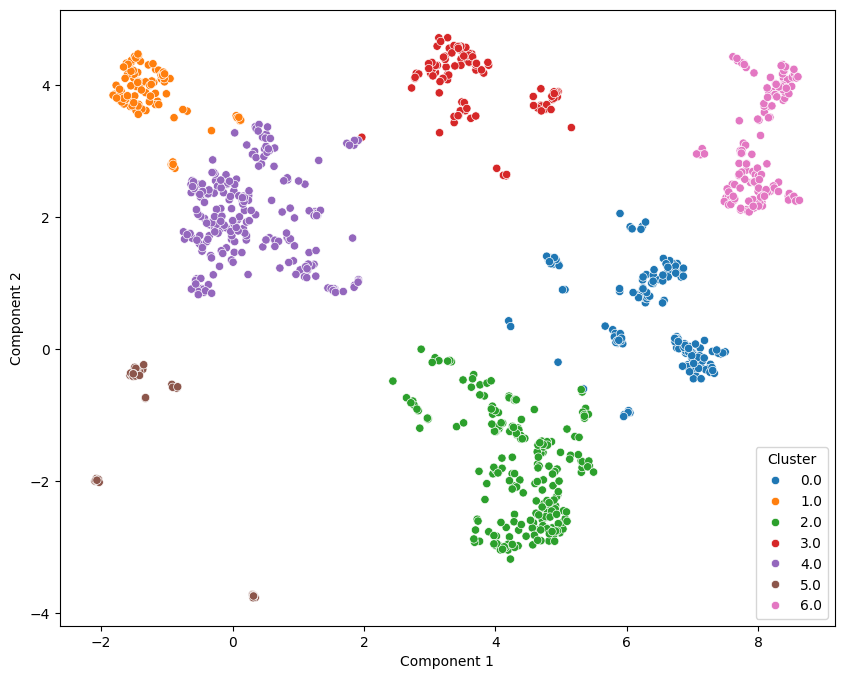

<Figure size 1000x800 with 0 Axes>

In [ ]:
import umap

Umap = umap.UMAP(
                n_neighbors=50,
                min_dist=0.1,
                n_components=2,
                metric='euclidean',
                random_state=42
    )
tok_umap = Umap.fit_transform(tok)

kmeans5 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_umap)
    # Assign clusters
labels=kmeans5.labels_

title='BoW + TFiDF + UMAP 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_umap,labels)

#### countvectorizer + LDA + UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster  effectives
Category                      
Furniture        0         206
Baby             5         200
Watches          2         137
Decor            1         215
Kitchen          4          21
Beauty           3         234
Computers        6          37

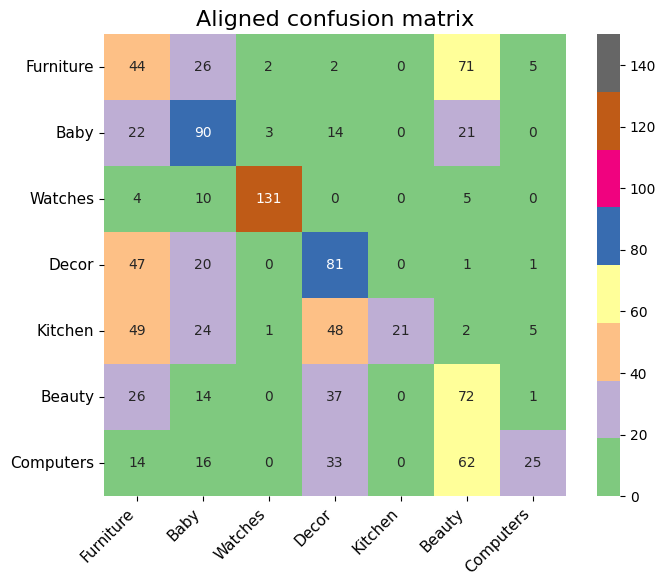

 ARI : 0.2167508987879562
              precision    recall  f1-score   support

   Furniture       0.00      0.00      0.00       150
        Baby       0.45      0.60      0.51       150
     Watches       0.96      0.87      0.91       150
       Decor       0.38      0.54      0.44       150
     Kitchen       0.31      0.47      0.37       150
      Beauty       0.31      0.48      0.38       150
   Computers       0.68      0.17      0.27       150

    accuracy                           0.45      1050
   macro avg       0.44      0.45      0.41      1050
weighted avg       0.44      0.45      0.41      1050

Clustering sur BoW + LDA + UMAP 2 components


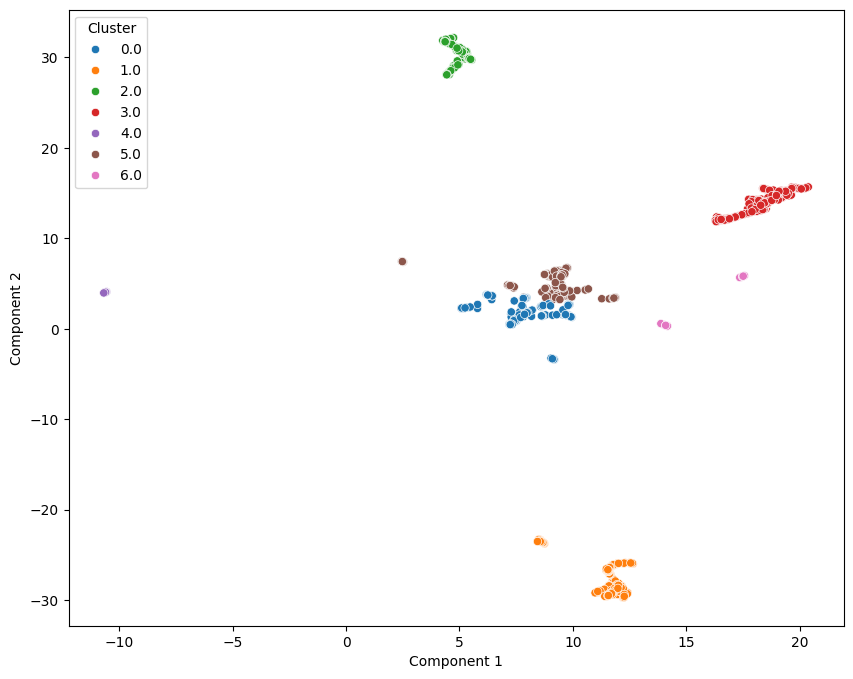

<Figure size 1000x800 with 0 Axes>

In [ ]:
import umap

Umap = umap.UMAP(
                n_neighbors=50,
                min_dist=0.1,
                n_components=2,
                metric='euclidean',
                random_state=42
    )
tok_umap = Umap.fit_transform(tok_lda)

kmeans5 = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(tok_umap)
    # Assign clusters
labels=kmeans5.labels_

title='BoW + LDA + UMAP 2 components'
# Evaluate and store metrics results)
append_dict(results_1, {'title'   : title,
                     'metrics' : clustering_evaluate(labels, data.cat_code,cat['category'])
                     }
           )
# clustering_evaluate(labels, data.cat_code,cat['index'])
print('Clustering on '+title)

plot_clusters(tok_umap,labels)

# 5) Feature engineering ('PRODUCT_NAME' and 'DESCRIPTION' concatenation)

## Feature creation

In [ ]:
data.columns

Index(['category', 'cat_code', 'product_name', 'description',
       'product_name_prep', 'description_prep'],
      dtype='object')

In [ ]:
# concatenate 'product_name' and 'description' columns into a 'complete_description' new column
data['complete_description'] = data['product_name'] + ' ' + data['description']


## Preprocess

In [ ]:
pd.set_option('display.max_colwidth', None)
data.complete_description.head(10)

0    Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Sathiyas Cotton Bath Towel Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel
2                                                                                                                                                                                            Eurospa Cotton Terry Face Towel Set Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by Â±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specific

In [ ]:
import nltk, re, pprint
from nltk import word_tokenize

tokenized=word_tokenize(data.loc[9,'complete_description'])
tokenized

['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 '-',
 'For',
 'Boys',
 ',',
 'Men',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 '-',
 'For',
 'Boys',
 ',',
 'Men',
 '-',
 'Buy',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 '1',
 'Analog',
 'Watch',
 '-',
 'For',
 'Boys',
 ',',
 'Men',
 'CAU1116.BA0858',
 'Online',
 'at',
 'Rs.107750',
 'in',
 'India',
 'Only',
 'at',
 'Flipkart.com',
 '.',
 'Swiss-made',
 ',',
 'Quartz',
 'movement',
 ',',
 'Scratch',
 'resistant',
 ',',
 'Sapphire',
 'crystal',
 'glass',
 ',',
 'Water',
 'resistant',
 'to',
 '200',
 'metres',
 ',',
 'Feature',
 'Chronograph',
 '-',
 'Great',
 'Discounts',
 ',',
 'Only',
 'Genuine',
 'Products',
 ',',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 ',',
 'Free',
 'Shipping',
 '.',
 'Cash',
 'On',
 'Delivery',
 '!']

In [ ]:
import string
print(' Punctuation list : {}'.format(string.punctuation))
no_punct=[w for w in tokenized if w not in string.punctuation+'0123456789 ']
no_punct

 Punctuation list : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'Buy',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'CAU1116.BA0858',
 'Online',
 'at',
 'Rs.107750',
 'in',
 'India',
 'Only',
 'at',
 'Flipkart.com',
 'Swiss-made',
 'Quartz',
 'movement',
 'Scratch',
 'resistant',
 'Sapphire',
 'crystal',
 'glass',
 'Water',
 'resistant',
 'to',
 '200',
 'metres',
 'Feature',
 'Chronograph',
 'Great',
 'Discounts',
 'Only',
 'Genuine',
 'Products',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 'Free',
 'Shipping',
 'Cash',
 'On',
 'Delivery']

In [ ]:
from nltk.corpus import stopwords
print(' Stop Words list : {}'.format(stopwords.words('english')))
wo_stop= [w for w in no_punct if w not in stopwords.words('english')]
wo_stop

 Stop Words list : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'sh

['TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'Buy',
 'TAG',
 'Heuer',
 'CAU1116.BA0858',
 'Formula',
 'Analog',
 'Watch',
 'For',
 'Boys',
 'Men',
 'CAU1116.BA0858',
 'Online',
 'Rs.107750',
 'India',
 'Only',
 'Flipkart.com',
 'Swiss-made',
 'Quartz',
 'movement',
 'Scratch',
 'resistant',
 'Sapphire',
 'crystal',
 'glass',
 'Water',
 'resistant',
 '200',
 'metres',
 'Feature',
 'Chronograph',
 'Great',
 'Discounts',
 'Only',
 'Genuine',
 'Products',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 'Free',
 'Shipping',
 'Cash',
 'On',
 'Delivery']

In [ ]:
from nltk.stem.porter import PorterStemmer
import nltk
import re
import pprint
from nltk import word_tokenize


import string
from nltk.corpus import stopwords

from nltk import SnowballStemmer
snowball = SnowballStemmer(language='english')

porter = PorterStemmer()


# lower + no punctuation + tokenize + no stop_words
def preprocess0(text):
    text = text.lower()
    no_punct = ''.join(
        [char for char in text if char not in string.punctuation+'0123456789'])
    tokenized = word_tokenize(no_punct)
    wo_stop = [w for w in tokenized if w not in stopwords.words('english')]
    return ' '.join(list(set(wo_stop)))


# lower + tokenize + no puctuation + no stop_words + stemming
def preprocess1(text):
    text = text.lower()
    no_punct = ''.join(
        [char for char in text if char not in string.punctuation+'0123456789'])
    tokenized = word_tokenize(no_punct)
    wo_stop = [w for w in tokenized if w not in stopwords.words('english')]
    stemmed = [snowball.stem(w) for w in wo_stop]
    return ' '.join(list(set(stemmed)))


# lower + tokenize + no stop_words + stemming + no punct
def preprocess2(text):
    text = text.lower()
    tokenized = word_tokenize(text)
    wo_stop = [word for word in tokenized if word not in stopwords.words('english')]
    stemmed = [snowball.stem(word) for word in wo_stop]
    no_punct = [''.join([char for char in word if char not in string.punctuation+'0123456789 ' ]) for word in stemmed]
    return ' '.join(list(set(no_punct)))

# Taking sample for readability of results
index_ = data.sample(1).index

display('Original ', data.complete_description.loc[index_])
display('Without stemming ', data.complete_description.apply(preprocess0).loc[index_])
display('With stemming remove puctuation BEFORE tokenization ',
        data.complete_description.apply(preprocess1).loc[index_])
display('With stemming remove puctuation AFTER tokenization ',
        data.complete_description.apply(preprocess2).loc[index_])

'Original '

80    VarEesha Wooden Key Holder Key Features of VarEesha Wooden Key Holder Hand made using wrought iron and mango wood Color - Brown Material - Sheesham wood Care instructions : Clean with a wet cloth and wipe gently.,VarEesha Wooden Key Holder (8 Hooks, Multicolor) Price: Rs. 1,199 Traditional design combined with utility, this wood and iron designed keybox is a convenient place to store all your keys. The iron design has a glass back to protect from dust and makes this box very manageable. Has 6 hooks inside for your keys which are less frequently used and 2 bigger hooks outside for car keys and other bigger keys which are used daily.,Specifications of VarEesha Wooden Key Holder (8 Hooks, Multicolor) General Brand VarEesha Model Number VSSWH001 Material Wooden Number of Hooks 8 Color Multicolor In the box Sales Package 1 KeyHanger Pack of 1 Dimensions Weight 900 g Other Dimensions L*B*H-20x10x35 cms
Name: complete_description, dtype: object

'Without stemming '

80    using dimensions keybox gentlyvareesha g wooden used key designed cms made instructions less cloth general place sheesham vareesha inside protect bigger wood box combined material hooks pack weight glass multicolor back keyhanger makes manageable iron model brand package utility hand keys features price holder sales frequently vsswh wet rs lbhxx color clean dust care convenient brown design traditional outside dailyspecifications car wipe mango wrought number store
Name: complete_description, dtype: object

'With stemming remove puctuation BEFORE tokenization '

80    keybox dailyspecif gentlyvareesha util manag g wooden tradit key insid cms made less cloth general place sheesham vareesha bigger protect wood box weight pack glass multicolor back featur model iron brand hand materi make hook outsid sale price holder dimens instruct keyhang combin vsswh wet rs lbhxx color clean dust care use brown packag design conveni wipe frequent mango car wrought number store
Name: complete_description, dtype: object

'With stemming remove puctuation AFTER tokenization '

80     keybox util manag g wooden l tradit key insid cms made less cloth general place sheesham vareesha bigger protect specif gently hxx wood box weight pack glass multicolor back featur model iron brand hand materi make hook outsid sale price holder dimens instruct keyhang combin vsswh wet rs color clean dust care b use brown daily design packag conveni wipe frequent mango car wrought number store
Name: complete_description, dtype: object

In [ ]:
display('Original ', data.description.loc[index_])
display('Without stemming ', data.description.apply(preprocess0).loc[index_])
display('With stemming remove puctuation BEFORE tokenization ',
        data.description.apply(preprocess1).loc[index_])
display('With stemming remove puctuation AFTER tokenization ',
        data.description.apply(preprocess2).loc[index_])

'Original '

80    Key Features of VarEesha Wooden Key Holder Hand made using wrought iron and mango wood Color - Brown Material - Sheesham wood Care instructions : Clean with a wet cloth and wipe gently.,VarEesha Wooden Key Holder (8 Hooks, Multicolor) Price: Rs. 1,199 Traditional design combined with utility, this wood and iron designed keybox is a convenient place to store all your keys. The iron design has a glass back to protect from dust and makes this box very manageable. Has 6 hooks inside for your keys which are less frequently used and 2 bigger hooks outside for car keys and other bigger keys which are used daily.,Specifications of VarEesha Wooden Key Holder (8 Hooks, Multicolor) General Brand VarEesha Model Number VSSWH001 Material Wooden Number of Hooks 8 Color Multicolor In the box Sales Package 1 KeyHanger Pack of 1 Dimensions Weight 900 g Other Dimensions L*B*H-20x10x35 cms
Name: description, dtype: object

'Without stemming '

80    using dimensions keybox gentlyvareesha g wooden used key designed cms made instructions less cloth general place sheesham vareesha inside protect bigger wood box combined material hooks pack weight glass multicolor back keyhanger makes manageable iron model brand package utility hand keys features price holder sales frequently vsswh wet rs lbhxx color clean dust care convenient brown design traditional outside dailyspecifications car wipe mango wrought number store
Name: description, dtype: object

'With stemming remove puctuation BEFORE tokenization '

80    keybox dailyspecif gentlyvareesha util manag g wooden tradit key insid cms made less cloth general place sheesham vareesha bigger protect wood box weight pack glass multicolor back featur model iron brand hand materi make hook outsid sale price holder dimens instruct keyhang combin vsswh wet rs lbhxx color clean dust care use brown packag design conveni wipe frequent mango car wrought number store
Name: description, dtype: object

'With stemming remove puctuation AFTER tokenization '

80     keybox util manag g wooden l tradit key insid cms made less cloth general place sheesham vareesha bigger protect specif gently hxx wood box weight pack glass multicolor back featur model iron brand hand materi make hook outsid sale price holder dimens instruct keyhang combin vsswh wet rs color clean dust care b use brown daily design packag conveni wipe frequent mango car wrought number store
Name: description, dtype: object

In [ ]:
# Applying preprocess1 to sentences
data['complete_description_prep']=data.complete_description.apply(preprocess1)

## countvectorizer (BoW)

Preprocessing has already be done so we will not apply preprocessor in the CountVectorizer method. Moreover, some features are not available in CountVectorizer preprocessing method (no stemming + nltk linguistic tokenization)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Bag of Words (BoW) feature engineering tool
  # creates a table with columns for each different word in the entire dataset
  # each row of the dataset will have a vector value for each word (which can be 0 in case of a word that is in another row)
cv_prod = CountVectorizer(
                          encoding='iso-8859-1',
                          decode_error='strict',
                          strip_accents='unicode',
                          lowercase=False, # useless since already done in preprocess1
                          preprocessor=None,
#                           tokenizer=None, # default value
                          stop_words=None,
#                           token_pattern=r'(?u)\b\w\w+\b', # default value
                          ngram_range=(1, 1),
                          analyzer='word', # better than analyzing character by character
                          max_df=1.0, # do not filter words that appear in 100% of the strings (= keep all words)
                          min_df=1, # do not filter words that appear in less than 1 string (= keep all words)
                          max_features=None,
#                           vocabulary=None,
                          binary=False,

                         )

count_vector_prod=cv_prod.fit_transform(data.complete_description_prep)
count_vector_prod=count_vector_prod.toarray()
count_vector_prod.shape

(1050, 4595)

In [ ]:
print("stop_words parameter:", cv_prod.get_params().get('stop_words'))


stop_words parameter: None


In [ ]:
print(f'Different words : {count_vector_prod.shape[1]}')

Different words : 4595


In [ ]:
# Import KMeans clusterer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# n_clusters = different categories number
kmeans = KMeans(n_clusters=len(dico), random_state=42,n_init=30).fit(count_vector_prod)
    # Assign clusters
labels=kmeans.labels_
for i in range(0,7):
    print('Cluster {} values count : {}'.format(i, np.count_nonzero(labels == i)))

adjusted_rand_score(data.cat_code,labels)

Cluster 0 values count : 335
Cluster 1 values count : 95
Cluster 2 values count : 21
Cluster 3 values count : 134
Cluster 4 values count : 11
Cluster 5 values count : 282
Cluster 6 values count : 172


0.21884203291921556

In [ ]:
adjusted_rand_score(data.cat_code,labels) == adjusted_rand_score(data.cat_code,description_labels)

True

In [ ]:
count_vector_prod.shape[1] == description_distinct_words

True

The amount of distinct words and ARI score are exactly the same for 'complete_description' and 'description'. \
In other terms, 'product_name' column does not give any new noticeable word to the 'description' fields. \
So, please refer to 'decription' variable study to have 'complete_description' performances results (which are the same).

# 6) Results

In [ ]:
# Create data frame from resluts dictionaryy


def highlight_max(s):
    '''
    highlight the maximum in a Series green.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the minmum in a Series red.
    '''
    is_max = s == s.min()
    return ['background-color: lightcoral' if v else '' for v in is_max]


# unpack tuples and create result data frame
def dict_to_df(dic):
    # dict to data frame
    results_all=pd.DataFrame(dic)
    # unpack metrics tuple
    results_all['precision']=[tup[0][0] for tup in results_all.metrics]
    results_all['recall']=[tup[0][1] for tup in results_all.metrics]
    results_all['f1_score']=[tup[0][2] for tup in results_all.metrics]
    results_all['ARI']=[tup[1] for tup in results_all.metrics]
    # drop tuples
    results_all.drop(['metrics'],axis=1,inplace=True)
    # set title as index
    results_all.set_index('title',inplace=True)
#     # columns to highligth
#     subset=['precision','recall','f1_score','ARI']
    # return dataframe
    return results_all.style.apply(highlight_max).apply(highlight_min).format('{:.2%}')


In [ ]:
results

{'title': ['BoW',
  'Text statistics',
  'BoW + TFiDF',
  'BoW + LatentDirichletAllocation',
  'BoW + PCA (2 components, 8.66% explained variance)',
  'BoW + TFiDF + PCA (2 components, 4.50% explained variance)',
  'BoW + LDA + PCA (2 components, 41.37% explained variance)',
  'BoW + T-SNE 2 components',
  'BoW + TFiDF + T-SNE 2 components',
  'BoW + LDA + T-SNE 2 components',
  'BoW + MDS 2 components',
  'BoW + TFiDF + MDS 2 components',
  'BoW + LDA + MDS 2 components',
  'BoW + Spectral 2 components',
  'BoW + TFiDF + Spectral 2 components',
  'BoW + LDA + Spectral 2 components',
  'BoW + UMAP 2 components',
  'BoW + TFiDF + UMAP 2 components',
  'BoW + LDA + UMAP 2 components'],
 'metrics': [((0.780405806768027,
    0.6238095238095239,
    0.6526955952478045,
    None),
   0.3106953248835906),
  ((0.23015026426503613, 0.24857142857142858, 0.1662982849988465, None),
   0.03645444556585251),
  ((0.8697475357744056, 0.619047619047619, 0.6454782636461021, None),
   0.2725094110833238)

In [ ]:
results_product_name = dict_to_df(results)
results_product_name

In [ ]:
results_1['title']

['BoW',
 'Text statistics',
 'BoW + TFiDF',
 'BoW + LatentDirichletAllocation',
 'BoW + PCA (2 components, 19.28% explained variance)',
 'BoW + TFiDF + PCA (2 components, 8.92% explained variance)',
 'BoW + LDA + PCA (2 components, 36.23% explained variance)',
 'BoW + T-SNE 2 components',
 'BoW + TFiDF + T-SNE 2 components',
 'BoW + LDA + T-SNE 2 components',
 'BoW + MDS 2 components',
 'BoW + TFiDF + MDS 2 components',
 'BoW + LDA + MDS 2 components',
 'BoW + Spectral 2 components',
 'BoW + TFiDF + Spectral 2 components',
 'BoW + LDA + Spectral 2 components',
 'BoW + UMAP 2 components',
 'BoW + TFiDF + UMAP 2 components',
 'BoW + LDA + UMAP 2 components']

In [ ]:
results_description = dict_to_df(results_1)
results_description

# 7) Data backup for other notebooks imports

table containing :

    * category
    
    * cat_code
    
    * product_name
    
    * description
    
    * product_name_prep  <- product_name.apply(preprocess1)
    
    * description_prep <- description.apply(preprocess1)
    
1050 products, 7 classes of 150

In [ ]:
data.head(0)

Empty DataFrame
Columns: [category, cat_code, product_name, description, product_name_prep, description_prep, complete_description, complete_description_prep]
Index: []

In [ ]:
import joblib



joblib.dump(data,'Flip_opt.data')
joblib.dump(cat,'Flip_opt.cat')


['Flip_opt.cat']

In [ ]:
print(' Executé en : ', datetime.timedelta(seconds=(time.time() - start_time)))

 Executé en :  0:09:01.003114
